In [1]:
import pandas as pd
import scanpy as sc
import h5py
import anndata
import numpy as np
import CococoNet_reader
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from itertools import permutations
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
arab_cococonet = CococoNet_reader.read_cococonet('arabidopsis')

In [3]:
john_scores = pd.read_csv('/data/hover/project/michael/michael3-arabidopsis.allxall/arabidopsis.allxall.score.tsv', sep = '\t', index_col= 0 )
john_scores

A0A068FL09  A0A076  A0A077  A0A078  A0A089VA62  A0A097NUP1  \
query                                                                    
A0A068FL09      1298.9     NaN     NaN     NaN         NaN         NaN   
A0A076             NaN  2402.5  1148.0  1258.1         NaN         NaN   
A0A077             NaN  1148.3  1750.6  1366.7         NaN         NaN   
A0A078             NaN  1258.9  1366.8  2003.0         NaN         NaN   
A0A089VA62         NaN     NaN     NaN     NaN       426.4         NaN   
...                ...     ...     ...     ...         ...         ...   
U3PL99             NaN     NaN     NaN     NaN         NaN         NaN   
W0TY53             NaN     NaN     NaN     NaN         NaN         NaN   
W8QNX9             NaN     NaN     NaN     NaN         NaN         NaN   
X5JA13             NaN     NaN     NaN     NaN         NaN         NaN   
X5JB51             NaN     NaN     NaN     NaN         NaN         NaN   

            A0A097NUQ0  A0A0A7EPL0  A0A0A8IL98  A0A0F7PX57  ...  U3N6F8  \
query                                                       ...           
A0A068FL09         NaN         NaN         NaN         NaN  ...     NaN   
A0A076             NaN         NaN         NaN         NaN  ...     NaN   
A0A077             NaN         NaN         NaN         NaN  ...     NaN   
A0A078             NaN         NaN         NaN         NaN  ...     NaN   
A0A089VA62         NaN         NaN         NaN         NaN  ...     NaN   
...                ...         ...         ...         ...  ...     ...   
U3PL99             NaN         NaN         NaN         NaN  ...     NaN   
W0TY53             NaN         NaN         NaN         NaN  ...     NaN   
W8QNX9             NaN         NaN         NaN         NaN  ...     NaN   
X5JA13             NaN         NaN         NaN         NaN  ...     NaN   
X5JB51             NaN         NaN         NaN         NaN  ...     NaN   

            U3N6G2  U3N6G9  U3N6H3  U3PIK0  U3PL99  W0TY53  W8QNX9  X5JA13  \
query                                                                        
A0A068FL09     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
A0A076         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
A0A077         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
A0A078         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
A0A089VA62     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
U3PL99         NaN     NaN     NaN   210.2   249.0     NaN     NaN     NaN   
W0TY53         NaN     NaN     NaN     NaN     NaN  2469.9     NaN     NaN   
W8QNX9         NaN     NaN     NaN     NaN     NaN     NaN  2520.1     NaN   
X5JA13         NaN     NaN     NaN     NaN     NaN     NaN     NaN  1793.7   
X5JB51         NaN     NaN     NaN     NaN     NaN     NaN     NaN  1771.8   

            X5JB51  
query               
A0A068FL09     NaN  
A0A076         NaN  
A0A077         NaN  
A0A078         NaN  
A0A089VA62     NaN  
...            ...  
U3PL99         NaN  
W0TY53         NaN  
W8QNX9         NaN  
X5JA13      1771.7  
X5JB51      1802.6  

[23753 rows x 23753 columns]

In [4]:
arabidopsis_converter = pd.read_csv('/data/CoCoCoNet/geneInfo/arabidopsis_info.csv')
arabidopsis_converter = arabidopsis_converter.dropna(subset = ['LocusTag','UniProtID'])

In [5]:
john_gene_converter = pd.DataFrame(data = john_scores.index)
john_gene_converter

query
0      A0A068FL09
1          A0A076
2          A0A077
3          A0A078
4      A0A089VA62
...           ...
23748      U3PL99
23749      W0TY53
23750      W8QNX9
23751      X5JA13
23752      X5JB51

[23753 rows x 1 columns]

In [6]:
merge_1_john_gene_converter = john_gene_converter.merge(how = 'left', right = arabidopsis_converter[['UniProtID','LocusTag']], left_on = 'query',right_on='UniProtID')
merge_1_john_gene_converter = merge_1_john_gene_converter.rename(columns = {'LocusTag':'LocusTag Uniprot 1'})
merge_1_john_gene_converter

query   UniProtID LocusTag Uniprot 1
0      A0A068FL09  A0A068FL09          AT2G46480
1          A0A076         NaN                NaN
2          A0A077         NaN                NaN
3          A0A078         NaN                NaN
4      A0A089VA62         NaN                NaN
...           ...         ...                ...
23748      U3PL99         NaN                NaN
23749      W0TY53      W0TY53          AT5G49150
23750      W8QNX9      W8QNX9          AT2G25540
23751      X5JA13      X5JA13          AT5G12370
23752      X5JB51         NaN                NaN

[23753 rows x 3 columns]

In [7]:
merge_2_john_gene_converter = merge_1_john_gene_converter.merge(how = 'left', right = arabidopsis_converter[['UniProtID2','LocusTag']], left_on= 'query', right_on= 'UniProtID2' )
merge_2_john_gene_converter = merge_2_john_gene_converter.drop_duplicates(subset = 'query', keep = False)
merge_2_john_gene_converter

query   UniProtID LocusTag Uniprot 1 UniProtID2   LocusTag
0      A0A068FL09  A0A068FL09          AT2G46480        NaN        NaN
1          A0A076         NaN                NaN        NaN        NaN
2          A0A077         NaN                NaN        NaN        NaN
3          A0A078         NaN                NaN        NaN        NaN
4      A0A089VA62         NaN                NaN        NaN        NaN
...           ...         ...                ...        ...        ...
23749      U3PL99         NaN                NaN        NaN        NaN
23750      W0TY53      W0TY53          AT5G49150        NaN        NaN
23751      W8QNX9      W8QNX9          AT2G25540        NaN        NaN
23752      X5JA13      X5JA13          AT5G12370     X5JA13  AT5G12370
23753      X5JB51         NaN                NaN        NaN        NaN

[23752 rows x 5 columns]

In [8]:
finalized_john_genes = merge_2_john_gene_converter.dropna(subset = ['LocusTag Uniprot 1','LocusTag'],how = 'all')

In [9]:
finalized_john_genes['LocusTag'] = finalized_john_genes['LocusTag'].fillna(value = finalized_john_genes['LocusTag Uniprot 1'])
finalized_john_genes

/tmp/ipykernel_658272/2941560853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalized_john_genes['LocusTag'] = finalized_john_genes['LocusTag'].fillna(value = finalized_john_genes['LocusTag Uniprot 1'])


query   UniProtID LocusTag Uniprot 1 UniProtID2   LocusTag
0      A0A068FL09  A0A068FL09          AT2G46480        NaN  AT2G46480
8      A0A0A8IL98  A0A0A8IL98          AT2G04620        NaN  AT2G04620
13     A0A178U865  A0A178U865          AT5G57300        NaN  AT5G57300
15     A0A178U9N5  A0A178U9N5          AT5G11450        NaN  AT5G11450
16     A0A178U9X0  A0A178U9X0          AT5G41910        NaN  AT5G41910
...           ...         ...                ...        ...        ...
23721      Q9ZWT1      Q9ZWT1          AT2G20860     Q9ZWT1  AT2G20860
23722      Q9ZWT3      Q9ZWT3          AT5G43340     Q9ZWT3  AT5G43340
23750      W0TY53      W0TY53          AT5G49150        NaN  AT5G49150
23751      W8QNX9      W8QNX9          AT2G25540        NaN  AT2G25540
23752      X5JA13      X5JA13          AT5G12370     X5JA13  AT5G12370

[14021 rows x 5 columns]

In [10]:
finalized_john_genes = finalized_john_genes.drop_duplicates(subset = 'LocusTag')

In [11]:
finalized_john_genes

query   UniProtID LocusTag Uniprot 1 UniProtID2   LocusTag
0      A0A068FL09  A0A068FL09          AT2G46480        NaN  AT2G46480
8      A0A0A8IL98  A0A0A8IL98          AT2G04620        NaN  AT2G04620
13     A0A178U865  A0A178U865          AT5G57300        NaN  AT5G57300
15     A0A178U9N5  A0A178U9N5          AT5G11450        NaN  AT5G11450
16     A0A178U9X0  A0A178U9X0          AT5G41910        NaN  AT5G41910
...           ...         ...                ...        ...        ...
23719      Q9ZWS7         NaN                NaN     Q9ZWS7  AT1G19050
23721      Q9ZWT1      Q9ZWT1          AT2G20860     Q9ZWT1  AT2G20860
23722      Q9ZWT3      Q9ZWT3          AT5G43340     Q9ZWT3  AT5G43340
23750      W0TY53      W0TY53          AT5G49150        NaN  AT5G49150
23752      X5JA13      X5JA13          AT5G12370     X5JA13  AT5G12370

[13534 rows x 5 columns]

In [12]:
finalized_john_genes_dictionary = dict(zip(finalized_john_genes['query'],finalized_john_genes['LocusTag']))
finalized_john_genes_dictionary

{'A0A068FL09': 'AT2G46480',
 'A0A0A8IL98': 'AT2G04620',
 'A0A178U865': 'AT5G57300',
 'A0A178U9N5': 'AT5G11450',
 'A0A178U9X0': 'AT5G41910',
 'A0A178UAN5': 'AT5G56720',
 'A0A178UBK9': 'AT5G50960',
 'A0A178UBU5': 'AT5G13790',
 'A0A178UBX1': 'AT5G23910',
 'A0A178UCI3': 'AT5G61580',
 'A0A178UDH6': 'AT5G10100',
 'A0A178UED8': 'AT5G57190',
 'A0A178UF66': 'AT5G06250',
 'A0A178UFB0': 'AT5G41315',
 'A0A178UIA0': 'AT5G65130',
 'A0A178UIB9': 'AT5G27720',
 'A0A178UL80': 'AT5G58000',
 'A0A178UNA7': 'AT5G08415',
 'A0A178UNE5': 'AT5G23990',
 'A0A178UNL2': 'AT5G54770',
 'A0A178UPC0': 'AT5G27660',
 'A0A178UPY5': 'AT5G02850',
 'A0A178UQA6': 'AT5G65400',
 'A0A178UQD3': 'AT5G02820',
 'A0A178URA5': 'AT5G62570',
 'A0A178US29': 'AT5G14210',
 'A0A178USD1': 'AT5G48870',
 'A0A178UU23': 'AT4G00910',
 'A0A178UW40': 'AT4G36830',
 'A0A178UWY3': 'AT4G33020',
 'A0A178UYE2': 'AT4G29220',
 'A0A178UZ09': 'AT4G25570',
 'A0A178V090': 'AT4G30420',
 'A0A178V113': 'AT4G09810',
 'A0A178V269': 'AT4G26270',
 'A0A178V2E9': 'AT4G

In [13]:
updated_john_scores = john_scores.rename(columns = finalized_john_genes_dictionary,index = finalized_john_genes_dictionary)

In [14]:
final_john_scores = updated_john_scores.loc[updated_john_scores.index.isin(finalized_john_genes['LocusTag'])]

In [15]:
final_john_scores = final_john_scores[finalized_john_genes['LocusTag']]
final_john_scores

AT2G46480  AT2G04620  AT5G57300  AT5G11450  AT5G41910  AT5G56720  \
query                                                                         
AT2G46480     1298.9        NaN        NaN        NaN        NaN        NaN   
AT2G04620        NaN     1806.3        NaN        NaN        NaN        NaN   
AT5G57300        NaN        NaN      634.3        NaN        NaN        NaN   
AT5G11450        NaN        NaN        NaN      691.5        NaN        NaN   
AT5G41910        NaN        NaN        NaN        NaN      391.1        NaN   
...              ...        ...        ...        ...        ...        ...   
AT1G19050        NaN        NaN        NaN        NaN        NaN        NaN   
AT2G20860        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G43340        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G49150        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G12370        NaN        NaN        NaN        NaN        NaN        NaN   

           AT5G50960  AT5G13790  AT5G23910  AT5G61580  ...  AT1G55640  \
query                                                  ...              
AT2G46480        NaN        NaN        NaN        NaN  ...        NaN   
AT2G04620        NaN        NaN        NaN        NaN  ...        NaN   
AT5G57300        NaN        NaN        NaN        NaN  ...        NaN   
AT5G11450        NaN        NaN        NaN        NaN  ...        NaN   
AT5G41910        NaN        NaN        NaN        NaN  ...        NaN   
...              ...        ...        ...        ...  ...        ...   
AT1G19050        NaN        NaN        NaN        NaN  ...        NaN   
AT2G20860        NaN        NaN        NaN        NaN  ...        NaN   
AT5G43340        NaN        NaN        NaN        NaN  ...        NaN   
AT5G49150        NaN        NaN        NaN        NaN  ...        NaN   
AT5G12370        NaN        NaN        NaN        NaN  ...        NaN   

           AT2G23310  AT1G22360  AT1G13260  AT5G62920  AT1G19050  AT2G20860  \
query                                                                         
AT2G46480        NaN        NaN        NaN        NaN        NaN        NaN   
AT2G04620        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G57300        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G11450        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G41910        NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
AT1G19050        NaN        NaN        NaN      212.1      431.2        NaN   
AT2G20860        NaN        NaN        NaN        NaN        NaN      855.6   
AT5G43340        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G49150        NaN        NaN        NaN        NaN        NaN        NaN   
AT5G12370        NaN        NaN        NaN        NaN        NaN        NaN   

           AT5G43340  AT5G49150  AT5G12370  
query                                       
AT2G46480        NaN        NaN        NaN  
AT2G04620        NaN        NaN        NaN  
AT5G57300        NaN        NaN        NaN  
AT5G11450        NaN        NaN        NaN  
AT5G41910        NaN        NaN        NaN  
...              ...        ...        ...  
AT1G19050        NaN        NaN        NaN  
AT2G20860        NaN        NaN        NaN  
AT5G43340     1149.1        NaN        NaN  
AT5G49150        NaN     2469.9        NaN  
AT5G12370        NaN        NaN     1793.7  

[13534 rows x 13534 columns]

In [17]:
final_john_scores = final_john_scores.replace(np.nan,0)
final_john_scores

AT2G46480  AT2G04620  AT5G57300  AT5G11450  AT5G41910  AT5G56720  \
query                                                                         
AT2G46480     1298.9        0.0        0.0        0.0        0.0        0.0   
AT2G04620        0.0     1806.3        0.0        0.0        0.0        0.0   
AT5G57300        0.0        0.0      634.3        0.0        0.0        0.0   
AT5G11450        0.0        0.0        0.0      691.5        0.0        0.0   
AT5G41910        0.0        0.0        0.0        0.0      391.1        0.0   
...              ...        ...        ...        ...        ...        ...   
AT1G19050        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G20860        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G43340        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G49150        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G12370        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G50960  AT5G13790  AT5G23910  AT5G61580  ...  AT1G55640  \
query                                                  ...              
AT2G46480        0.0        0.0        0.0        0.0  ...        0.0   
AT2G04620        0.0        0.0        0.0        0.0  ...        0.0   
AT5G57300        0.0        0.0        0.0        0.0  ...        0.0   
AT5G11450        0.0        0.0        0.0        0.0  ...        0.0   
AT5G41910        0.0        0.0        0.0        0.0  ...        0.0   
...              ...        ...        ...        ...  ...        ...   
AT1G19050        0.0        0.0        0.0        0.0  ...        0.0   
AT2G20860        0.0        0.0        0.0        0.0  ...        0.0   
AT5G43340        0.0        0.0        0.0        0.0  ...        0.0   
AT5G49150        0.0        0.0        0.0        0.0  ...        0.0   
AT5G12370        0.0        0.0        0.0        0.0  ...        0.0   

           AT2G23310  AT1G22360  AT1G13260  AT5G62920  AT1G19050  AT2G20860  \
query                                                                         
AT2G46480        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G04620        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G57300        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G11450        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G41910        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
AT1G19050        0.0        0.0        0.0      212.1      431.2        0.0   
AT2G20860        0.0        0.0        0.0        0.0        0.0      855.6   
AT5G43340        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G49150        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G12370        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G43340  AT5G49150  AT5G12370  
query                                       
AT2G46480        0.0        0.0        0.0  
AT2G04620        0.0        0.0        0.0  
AT5G57300        0.0        0.0        0.0  
AT5G11450        0.0        0.0        0.0  
AT5G41910        0.0        0.0        0.0  
...              ...        ...        ...  
AT1G19050        0.0        0.0        0.0  
AT2G20860        0.0        0.0        0.0  
AT5G43340     1149.1        0.0        0.0  
AT5G49150        0.0     2469.9        0.0  
AT5G12370        0.0        0.0     1793.7  

[13534 rows x 13534 columns]

In [18]:
arab_cococonet_1_set_to_zero = arab_cococonet.replace(1,0)
arab_cococonet_1_set_to_zero

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020   0.000000   0.676041   0.885107   0.916603   0.167027   0.625596   
AT1G01030   0.676041   0.000000   0.707718   0.515532   0.420354   0.292083   
AT1G01040   0.885107   0.707718   0.000000   0.836387   0.545101   0.701558   
AT1G01050   0.916603   0.515532   0.836387   0.000000   0.562112   0.726964   
AT1G01060   0.167027   0.420354   0.545101   0.562112   0.000000   0.327202   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.287853   0.270118   0.186425   0.213062   0.125488   0.083681   
ATCG01130   0.559907   0.463394   0.219380   0.412583   0.212731   0.077222   
ATCG01180   0.017205   0.083490   0.032348   0.046082   0.061676   0.022381   
ATCG01210   0.011806   0.059014   0.018332   0.029016   0.057518   0.026014   
ATCG01310   0.091015   0.108780   0.057761   0.086736   0.044208   0.028005   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020   0.801175   0.866369   0.954286   0.715750  ...   0.111731   
AT1G01030   0.687003   0.626281   0.483536   0.570675  ...   0.245167   
AT1G01040   0.656258   0.857046   0.657204   0.650843  ...   0.155183   
AT1G01050   0.837948   0.928252   0.952045   0.640223  ...   0.089440   
AT1G01060   0.242215   0.304953   0.217415   0.077569  ...   0.082518   
...              ...        ...        ...        ...  ...        ...   
ATCG01120   0.364707   0.333718   0.237716   0.149145  ...   0.858389   
ATCG01130   0.625678   0.496059   0.428496   0.226147  ...   0.881835   
ATCG01180   0.090228   0.069825   0.028903   0.015799  ...   0.751869   
ATCG01210   0.062831   0.043944   0.015468   0.018706  ...   0.687306   
ATCG01310   0.205339   0.176358   0.066842   0.050985  ...   0.410096   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020   0.193853   0.261697   0.299060   0.321617   0.287853   0.559907   
AT1G01030   0.215414   0.255414   0.306986   0.308402   0.270118   0.463394   
AT1G01040   0.230038   0.149740   0.334558   0.287951   0.186425   0.219380   
AT1G01050   0.177388   0.164935   0.236661   0.251851   0.213062   0.412583   
AT1G01060   0.125455   0.103488   0.187982   0.195059   0.125488   0.212731   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.905572   0.926062   0.941864   0.954421   0.000000   0.969018   
ATCG01130   0.936241   0.946935   0.958553   0.960399   0.969018   0.000000   
ATCG01180   0.781811   0.740045   0.745181   0.676666   0.450607   0.467233   
ATCG01210   0.710940   0.676507   0.687223   0.567304   0.357960   0.412343   
ATCG01310   0.466130   0.465530   0.496910   0.453522   0.410586   0.483002   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020   0.017205   0.011806   0.091015  
AT1G01030   0.083490   0.059014   0.108780  
AT1G01040   0.032348   0.018332   0.057761  
AT1G01050   0.046082   0.029016   0.086736  
AT1G01060   0.061676   0.057518   0.044208  
...              ...        ...        ...  
ATCG01120   0.450607   0.357960   0.410586  
ATCG01130   0.467233   0.412343   0.483002  
ATCG01180   0.000000   0.999090   0.579657  
ATCG01210   0.999090   0.000000   0.511263  
ATCG01310   0.579657   0.511263   0.000000  

[20879 rows x 20879 columns]

In [19]:
top_10_arab_genes = np.array(
    [arab_cococonet_1_set_to_zero[c].nlargest(10).index.values for c in arab_cococonet_1_set_to_zero]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_arab_genes_dataframe = pd.DataFrame(
    data=top_10_arab_genes,
    index=arab_cococonet_1_set_to_zero.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_arab_genes_dataframe

One        Two      Three       Four             Five  \
AT1G01020  AT1G30590  AT3G15010  AT3G54480  AT2G48100        AT5G02770   
AT1G01030  AT1G31650  AT3G11170  AT5G50860  AT2G46810        AT5G67260   
AT1G01040  AT4G00060  AT3G54230  AT5G35210  AT1G55325        AT1G73960   
AT1G01050  AT2G42210  AT2G17390  AT5G36230  AT4G02580        AT3G14290   
AT1G01060  AT3G09600  AT2G46830  AT5G64940  AT4G38960        AT3G12320   
...              ...        ...        ...        ...              ...   
ATCG01120  ATCG01130  ATCG01110  ATCG00800  ATCG00740        ATCG01100   
ATCG01130  ATCG00800  ATCG00790  ATCG00740  ATCG00810        ATCG00650   
ATCG01180  ATCG00950  ATCG01210  ATCG00920  ATCG00020        ATCG00490   
ATCG01210  ATCG01180  ATCG00950  ATCG00920  ATCG00490  ENSRNA049495549   
ATCG01310  ATCG00830  ATCG00480  ATCG00950  ATCG00470        ATCG00810   

                 Six            Seven      Eight       Nine        Ten  
AT1G01020  AT3G26920        AT5G66240  AT5G59460  AT5G67610  AT2G45640  
AT1G01030  AT2G13440        AT2G43950  AT2G28540  AT2G45950  AT3G09670  
AT1G01040  AT2G29210        AT4G16310  AT5G22760  AT2G27980  AT1G79350  
AT1G01050  AT5G40810        AT1G09150  AT5G10460  AT5G66510  AT4G06599  
AT1G01060  AT3G54500        AT4G15430  AT2G31380  AT5G15950  AT3G01060  
...              ...              ...        ...        ...        ...  
ATCG01120  ATCG00770        ATCG00650  ATCG01010  ATCG00660  ATCG01090  
ATCG01130  ATCG00780        ATCG00150  ATCG00770  ATCG00040  ATCG00530  
ATCG01180  ATCG00680  ENSRNA049495549  ATCG00350  ATCG00720  ATCG00340  
ATCG01210  ATCG00020        ATCG00680  ATCG00350  ATCG00280  ATCG00340  
ATCG01310  ATCG00780        ATCG01180  ATCG00820  ATCG00790  ATCG00750  

[20879 rows x 10 columns]

In [20]:
tidy_top_10 = top_10_arab_genes_dataframe.melt(ignore_index= False)
tidy_top_10
zipped_pairs = zip(tuple(tidy_top_10.index.to_list()),tuple(tidy_top_10['value'].to_list()))

In [21]:
binary_masked_cococonet = pd.DataFrame(data = 0, columns = arab_cococonet.columns, index = arab_cococonet.index)
#binary_masked_cococonet.loc[zip(tuple(tidy_top_10.index.to_list()),tuple(tidy_top_10['value'].to_list()))] = 1
#binary_masked_cococonet.sum(axis =0)
for row,column in zipped_pairs:
    binary_masked_cococonet.at[row,column] = 1
binary_masked_cococonet

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020          0          0          0          0          0          0   
AT1G01030          0          0          0          0          0          0   
AT1G01040          0          0          0          0          0          0   
AT1G01050          0          0          0          0          0          0   
AT1G01060          0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
ATCG01120          0          0          0          0          0          0   
ATCG01130          0          0          0          0          0          0   
ATCG01180          0          0          0          0          0          0   
ATCG01210          0          0          0          0          0          0   
ATCG01310          0          0          0          0          0          0   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020          0          0          0          0  ...          0   
AT1G01030          0          0          0          0  ...          0   
AT1G01040          0          0          0          0  ...          0   
AT1G01050          0          0          0          0  ...          0   
AT1G01060          0          0          0          0  ...          0   
...              ...        ...        ...        ...  ...        ...   
ATCG01120          0          0          0          0  ...          0   
ATCG01130          0          0          0          0  ...          0   
ATCG01180          0          0          0          0  ...          0   
ATCG01210          0          0          0          0  ...          0   
ATCG01310          0          0          0          0  ...          0   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020          0          0          0          0          0          0   
AT1G01030          0          0          0          0          0          0   
AT1G01040          0          0          0          0          0          0   
AT1G01050          0          0          0          0          0          0   
AT1G01060          0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
ATCG01120          0          1          1          1          0          1   
ATCG01130          0          0          0          0          0          0   
ATCG01180          0          0          0          0          0          0   
ATCG01210          0          0          0          0          0          0   
ATCG01310          0          0          0          0          0          0   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020          0          0          0  
AT1G01030          0          0          0  
AT1G01040          0          0          0  
AT1G01050          0          0          0  
AT1G01060          0          0          0  
...              ...        ...        ...  
ATCG01120          0          0          0  
ATCG01130          0          0          0  
ATCG01180          0          1          0  
ATCG01210          1          0          0  
ATCG01310          1          0          0  

[20879 rows x 20879 columns]

In [22]:
ranked_columns_cococonet = arab_cococonet_1_set_to_zero.rank()
ranked_columns_cococonet

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020        1.0    19613.0    16301.0    16662.0    10398.0    16067.0   
AT1G01030     8761.0        1.0    10054.0     4915.0    18912.0     5101.0   
AT1G01040    15837.0    20260.0        1.0    12516.0    20006.0    18717.0   
AT1G01050    17513.0    13479.0    14421.0        1.0    20113.0    19475.0   
AT1G01060     1061.0     9642.0     6470.0     5598.0        1.0     6060.0   
...              ...        ...        ...        ...        ...        ...   
ATCG01120     2524.0     5414.0     1374.0     1136.0     8078.0      819.0   
ATCG01130     6537.0    11291.0     1801.0     3401.0    12757.0      719.0   
ATCG01180       40.0     1338.0       42.0       61.0     4293.0      109.0   
ATCG01210       26.0      769.0       18.0       22.0     4019.0      139.0   
ATCG01310      427.0     1866.0      137.0      260.0     3185.0      161.0   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020    16385.0    15559.0    19078.0    17115.0  ...    15836.0   
AT1G01030    13059.0     8258.0     6841.0    11922.0  ...    20305.0   
AT1G01040    12209.0    15125.0    10507.0    14760.0  ...    18311.0   
AT1G01050    17388.0    18521.0    19016.0    14385.0  ...    13704.0   
AT1G01060     4102.0     3500.0     2546.0     1273.0  ...    12914.0   
...              ...        ...        ...        ...  ...        ...   
ATCG01120     5904.0     3898.0     2833.0     2326.0  ...    20816.0   
ATCG01130    11419.0     6108.0     5855.0     3634.0  ...    20830.0   
ATCG01180     1959.0      739.0      206.0      374.0  ...    20797.0   
ATCG01210     1483.0      496.0       96.0      415.0  ...    20792.0   
ATCG01310     3616.0     1929.0      590.0      894.0  ...    20759.0   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020    17411.0    19327.0    18170.0    19393.0    19923.0    20465.0   
AT1G01030    18191.0    19221.0    18392.0    19070.0    19477.0    19410.0   
AT1G01040    18627.0    14960.0    19026.0    18501.0    15271.0    10720.0   
AT1G01050    16605.0    16019.0    15844.0    17125.0    16993.0    18302.0   
AT1G01060    12780.0    10325.0    13022.0    14097.0    10186.0    10366.0   
...              ...        ...        ...        ...        ...        ...   
ATCG01120    20814.0    20832.0    20822.0    20850.0        1.0    20866.0   
ATCG01130    20833.0    20846.0    20834.0    20858.0    20879.0        1.0   
ATCG01180    20797.0    20795.0    20790.0    20792.0    20782.0    19472.0   
ATCG01210    20788.0    20787.0    20779.0    20778.0    20671.0    18293.0   
ATCG01310    20756.0    20759.0    20655.0    20717.0    20769.0    19744.0   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020     9647.0     8750.0    16876.0  
AT1G01030    18431.0    18227.0    17986.0  
AT1G01040    14046.0    12006.0    12286.0  
AT1G01050    15978.0    14939.0    16522.0  
AT1G01060    17280.0    18107.0     9080.0  
...              ...        ...        ...  
ATCG01120    20771.0    20768.0    20809.0  
ATCG01130    20775.0    20778.0    20844.0  
ATCG01180        1.0    20879.0    20873.0  
ATCG01210    20878.0        1.0    20860.0  
ATCG01310    20799.0    20799.0        1.0  

[20879 rows x 20879 columns]

In [23]:
ranked_columns_cococonet.sum(axis = 1)

AT1G01020    311475415.0
AT1G01030    157556588.0
AT1G01040    304261660.0
AT1G01050    337602461.0
AT1G01060     72540424.0
                ...     
ATCG01120     45841333.0
ATCG01130     80126213.0
ATCG01180     19750802.0
ATCG01210     16992829.0
ATCG01310     25047972.0
Length: 20879, dtype: float64

In [24]:
dot_product_cococonet = binary_masked_cococonet.dot(ranked_columns_cococonet)

In [25]:
subtract_minimum = dot_product_cococonet-65 # This is 11+10+9+8+7+6+5+4+3+2
subtract_minimum

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020   208680.0   176180.0   185739.0   187173.0   125884.0   170923.0   
AT1G01030   148953.0   208680.0   152892.0   155316.0   194126.0    93495.0   
AT1G01040   175725.0   194100.0   208680.0   156815.0   185277.0   176800.0   
AT1G01050   197210.0   145452.0   157486.0   208680.0   156471.0   169853.0   
AT1G01060    34409.0   135159.0    73268.0    66212.0   208680.0    88455.0   
...              ...        ...        ...        ...        ...        ...   
ATCG01120    40037.0    91874.0    28435.0    22250.0   114654.0     7195.0   
ATCG01130    51648.0   124061.0    37468.0    31752.0   124584.0     8210.0   
ATCG01180     4747.0    28961.0     7426.0     4052.0    62440.0     2482.0   
ATCG01210     4482.0    27980.0     7337.0     3789.0    61702.0     2181.0   
ATCG01310    34422.0    85878.0    28190.0    25705.0   102099.0     6796.0   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020   155527.0   166523.0   187956.0   182540.0  ...   116094.0   
AT1G01030   190789.0   176558.0   142823.0   125016.0  ...   196527.0   
AT1G01040   136356.0   176026.0   118214.0   166584.0  ...   178412.0   
AT1G01050   179658.0   196644.0   198576.0   163158.0  ...    96257.0   
AT1G01060    76307.0    58290.0    37856.0    22635.0  ...   139426.0   
...              ...        ...        ...        ...  ...        ...   
ATCG01120    91406.0    57002.0    26816.0    32147.0  ...   208461.0   
ATCG01130   124369.0    73139.0    41105.0    43143.0  ...   208316.0   
ATCG01180    40623.0    20543.0     2782.0     7432.0  ...   208279.0   
ATCG01210    41393.0    21308.0     3078.0     8139.0  ...   208268.0   
ATCG01310    95875.0    58818.0    32623.0    34584.0  ...   207994.0   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020   140149.0   148434.0   149027.0   155250.0   166779.0   171395.0   
AT1G01030   198465.0   200808.0   201173.0   202585.0   197346.0   198597.0   
AT1G01040   179377.0   161152.0   187786.0   187269.0   147635.0   124187.0   
AT1G01050   126125.0   137239.0   138213.0   149667.0   171806.0   179039.0   
AT1G01060   131295.0   122000.0   135071.0   135086.0   117037.0   114126.0   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   208481.0   187681.0   187633.0   187748.0   208680.0   187742.0   
ATCG01130   208351.0   208444.0   208438.0   208513.0   208609.0   208680.0   
ATCG01180   208228.0   208189.0   208198.0   208029.0   206923.0   197675.0   
ATCG01210   208222.0   208185.0   208194.0   208021.0   207018.0   198838.0   
ATCG01310   208035.0   208094.0   207907.0   208183.0   208239.0   204744.0   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020    85583.0    73048.0   122589.0  
AT1G01030   175512.0   164357.0   188518.0  
AT1G01040   123266.0    96951.0   124388.0  
AT1G01050   107787.0    96482.0   149529.0  
AT1G01060   162089.0   167106.0   126119.0  
...              ...        ...        ...  
ATCG01120   208005.0   207977.0   208360.0  
ATCG01130   207926.0   207901.0   208468.0  
ATCG01180   208680.0   187799.0   208204.0  
ATCG01210   187801.0   208680.0   208257.0  
ATCG01310   187176.0   208031.0   208680.0  

[20879 rows x 20879 columns]

In [26]:
function_conservations_scores = subtract_minimum/(subtract_minimum.max().max() - subtract_minimum.min().min())
function_conservations_scores

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020   1.000000   0.844259   0.890066   0.896938   0.603239   0.819067   
AT1G01030   0.713787   1.000000   0.732662   0.744278   0.930257   0.448030   
AT1G01040   0.842079   0.930132   1.000000   0.751462   0.887852   0.847230   
AT1G01050   0.945035   0.697010   0.754677   1.000000   0.749813   0.813940   
AT1G01060   0.164889   0.647685   0.351102   0.317290   1.000000   0.423879   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.191858   0.440263   0.136261   0.106623   0.549425   0.034479   
ATCG01130   0.247499   0.594504   0.179548   0.152156   0.597010   0.039343   
ATCG01180   0.022748   0.138782   0.035586   0.019417   0.299214   0.011894   
ATCG01210   0.021478   0.134081   0.035159   0.018157   0.295678   0.010451   
ATCG01310   0.164951   0.411530   0.135087   0.123179   0.489261   0.032567   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020   0.745289   0.797983   0.900690   0.874736  ...   0.556325   
AT1G01030   0.914266   0.846071   0.684412   0.599080  ...   0.941763   
AT1G01040   0.653422   0.843521   0.566485   0.798275  ...   0.854955   
AT1G01050   0.860926   0.942323   0.951581   0.781857  ...   0.461266   
AT1G01060   0.365665   0.279327   0.181407   0.108468  ...   0.668133   
...              ...        ...        ...        ...  ...        ...   
ATCG01120   0.438020   0.273155   0.128503   0.154049  ...   0.998951   
ATCG01130   0.595979   0.350484   0.196976   0.206742  ...   0.998256   
ATCG01180   0.194666   0.098443   0.013331   0.035614  ...   0.998078   
ATCG01210   0.198356   0.102108   0.014750   0.039002  ...   0.998026   
ATCG01310   0.459435   0.281857   0.156330   0.165727  ...   0.996713   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020   0.671598   0.711300   0.714141   0.743962   0.799209   0.821329   
AT1G01030   0.951049   0.962277   0.964026   0.970793   0.945687   0.951682   
AT1G01040   0.859579   0.772245   0.899875   0.897398   0.707471   0.595107   
AT1G01050   0.604394   0.657653   0.662320   0.717208   0.823299   0.857960   
AT1G01060   0.629169   0.584627   0.647264   0.647336   0.560844   0.546895   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.999046   0.899372   0.899142   0.899693   1.000000   0.899665   
ATCG01130   0.998423   0.998869   0.998840   0.999200   0.999660   1.000000   
ATCG01180   0.997834   0.997647   0.997690   0.996880   0.991580   0.947264   
ATCG01210   0.997805   0.997628   0.997671   0.996842   0.992036   0.952837   
ATCG01310   0.996909   0.997192   0.996296   0.997618   0.997887   0.981139   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020   0.410116   0.350048   0.587450  
AT1G01030   0.841058   0.787603   0.903383  
AT1G01040   0.590694   0.464592   0.596071  
AT1G01050   0.516518   0.462344   0.716547  
AT1G01060   0.776735   0.800776   0.604366  
...              ...        ...        ...  
ATCG01120   0.996765   0.996631   0.998467  
ATCG01130   0.996387   0.996267   0.998984  
ATCG01180   1.000000   0.899938   0.997719  
ATCG01210   0.899947   1.000000   0.997973  
ATCG01310   0.896952   0.996890   1.000000  

[20879 rows x 20879 columns]

In [27]:
averaged_scores = (function_conservations_scores.T+function_conservations_scores)/2
averaged_scores

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020   1.000000   0.779023   0.866072   0.920987   0.384064   0.555647   
AT1G01030   0.779023   1.000000   0.831397   0.720644   0.788971   0.344832   
AT1G01040   0.866072   0.831397   1.000000   0.753069   0.619477   0.641072   
AT1G01050   0.920987   0.720644   0.753069   1.000000   0.533551   0.578194   
AT1G01060   0.384064   0.788971   0.619477   0.533551   1.000000   0.521313   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.495534   0.692975   0.421866   0.464961   0.555135   0.117879   
ATCG01130   0.534414   0.773093   0.387327   0.505058   0.571952   0.094350   
ATCG01180   0.216432   0.489920   0.313140   0.267968   0.537974   0.154301   
ATCG01210   0.185763   0.460842   0.249875   0.240251   0.548227   0.215680   
ATCG01310   0.376200   0.657456   0.365579   0.419863   0.546813   0.148910   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020   0.658987   0.768219   0.909019   0.721250  ...   0.317798   
AT1G01030   0.922408   0.842141   0.632780   0.626962  ...   0.618730   
AT1G01040   0.520615   0.745891   0.496193   0.733379  ...   0.470611   
AT1G01050   0.766741   0.875403   0.924959   0.679797  ...   0.253249   
AT1G01060   0.547798   0.383199   0.401438   0.293097  ...   0.535094   
...              ...        ...        ...        ...  ...        ...   
ATCG01120   0.705271   0.606009   0.489649   0.393461  ...   0.998862   
ATCG01130   0.793195   0.605940   0.544741   0.404466  ...   0.998306   
ATCG01180   0.565009   0.408755   0.226833   0.240387  ...   0.998579   
ATCG01210   0.560653   0.335586   0.199293   0.212950  ...   0.998550   
ATCG01310   0.719218   0.587584   0.349899   0.369336  ...   0.997410   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020   0.367486   0.405614   0.403124   0.444976   0.495534   0.534414   
AT1G01030   0.622372   0.636429   0.630274   0.670687   0.692975   0.773093   
AT1G01040   0.474466   0.434292   0.502624   0.511242   0.421866   0.387327   
AT1G01050   0.324384   0.356333   0.358319   0.396933   0.464961   0.505058   
AT1G01060   0.506026   0.516607   0.534649   0.561750   0.555135   0.571952   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.998780   0.949236   0.949063   0.949691   1.000000   0.949662   
ATCG01130   0.998246   0.998814   0.998675   0.999341   0.949662   1.000000   
ATCG01180   0.998524   0.998181   0.998124   0.997340   0.994173   0.971825   
ATCG01210   0.998517   0.998155   0.998083   0.997266   0.994333   0.974552   
ATCG01310   0.997352   0.997685   0.997285   0.998028   0.998177   0.990061   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020   0.216432   0.185763   0.376200  
AT1G01030   0.489920   0.460842   0.657456  
AT1G01040   0.313140   0.249875   0.365579  
AT1G01050   0.267968   0.240251   0.419863  
AT1G01060   0.537974   0.548227   0.546813  
...              ...        ...        ...  
ATCG01120   0.994173   0.994333   0.998177  
ATCG01130   0.971825   0.974552   0.990061  
ATCG01180   1.000000   0.899942   0.947336  
ATCG01210   0.899942   1.000000   0.997431  
ATCG01310   0.947336   0.997431   1.000000  

[20879 rows x 20879 columns]

In [28]:
arabidopsis_gene_info_table = pd.read_csv('/data/CoCoCoNet/geneInfo/arabidopsis_info.csv')
arabidopsis_gene_info_table = arabidopsis_gene_info_table[['LocusTag','OrthoID']]
arabidopsis_gene_info_table.dropna(inplace= True)
arabidopsis_gene_info_table

LocusTag        OrthoID
0      AT1G01010  3702_0:00165b
1      AT1G01020  3702_0:0014ef
3      AT1G01030  3702_0:0002ad
4      AT1G01040  3702_0:001310
7      AT1G01050  3702_0:0014c8
...          ...            ...
32539  AT4G40060  3702_0:00497b
32541  AT4G40063  3702_0:004e71
32542  AT4G40070  3702_0:0046a3
32544  AT4G40080  3702_0:004d7f
32545  AT4G40090  3702_0:004ebf

[26781 rows x 2 columns]

In [29]:
arabidopsis_ortho_to_locus_dict = dict(zip(arabidopsis_gene_info_table['OrthoID'],arabidopsis_gene_info_table['LocusTag']))
arabidopsis_ortho_to_locus_dict

{'3702_0:00165b': 'AT1G01010',
 '3702_0:0014ef': 'AT1G01020',
 '3702_0:0002ad': 'AT1G01030',
 '3702_0:001310': 'AT1G01040',
 '3702_0:0014c8': 'AT1G01050',
 '3702_0:000761': 'AT1G01060',
 '3702_0:000679': 'AT1G01070',
 '3702_0:000e2d': 'AT1G01080',
 '3702_0:0005b5': 'AT1G01090',
 '3702_0:00110b': 'AT1G01100',
 '3702_0:000f90': 'AT1G01110',
 '3702_0:000d53': 'AT1G01120',
 '3702_0:000982': 'AT1G01130',
 '3702_0:00132f': 'AT1G01140',
 '3702_0:0007d1': 'AT1G01150',
 '3702_0:00100c': 'AT1G01160',
 '3702_0:0001de': 'AT1G01170',
 '3702_0:00022b': 'AT1G01180',
 '3702_0:0005c0': 'AT1G01190',
 '3702_0:000369': 'AT1G01200',
 '3702_0:000bac': 'AT1G01210',
 '3702_0:0008c5': 'AT1G01220',
 '3702_0:00057c': 'AT1G01225',
 '3702_0:00017e': 'AT1G01230',
 '3702_0:000942': 'AT1G01240',
 '3702_0:0003fa': 'AT1G01250',
 '3702_0:00054e': 'AT1G01260',
 '3702_0:0016b0': 'AT1G01280',
 '3702_0:0017e7': 'AT1G01290',
 '3702_0:000e48': 'AT1G01300',
 '3702_0:000fb9': 'AT1G01305',
 '3702_0:0005da': 'AT1G01310',
 '3702_0

In [30]:
arabidopsis_paralog_map = pd.read_csv('/home/passala/git/Coexpressalog_Method_Development/arabidopsis_paralogMap.csv')
#arabidopsis_paralog_map = arabidopsis_paralog_map.replace(arabidopsis_ortho_to_locus_dict, regex = True)

/tmp/ipykernel_658272/2573697246.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297

In [31]:
arabidopsis_gene_info_table.drop_duplicates(subset= ['OrthoID'])

LocusTag        OrthoID
0      AT1G01010  3702_0:00165b
1      AT1G01020  3702_0:0014ef
3      AT1G01030  3702_0:0002ad
4      AT1G01040  3702_0:001310
7      AT1G01050  3702_0:0014c8
...          ...            ...
32539  AT4G40060  3702_0:00497b
32541  AT4G40063  3702_0:004e71
32542  AT4G40070  3702_0:0046a3
32544  AT4G40080  3702_0:004d7f
32545  AT4G40090  3702_0:004ebf

[26781 rows x 2 columns]

In [32]:
arabidopsis_ortho_to_locus_dict['3702_0:002905']

'AT2G41790'

In [33]:
arabidopsis_paralog_map = arabidopsis_paralog_map.drop(columns = ['orthogroupID'])
arabidopsis_paralog_map

Group 1         Group 2         Group 3         Group 4 Group 5  \
0      3702_0:00365e             NaN             NaN             NaN     NaN   
1      3702_0:0069ac             NaN             NaN             NaN     NaN   
2      3702_0:005b5f             NaN             NaN             NaN     NaN   
3      3702_0:000da9   3702_0:001dda   3702_0:002cfd             NaN     NaN   
4      3702_0:006b08   3702_0:006b22             NaN             NaN     NaN   
...              ...             ...             ...             ...     ...   
11169  3702_0:00031b   3702_0:000a91   3702_0:001bb5             NaN     NaN   
11170  3702_0:0033f8   3702_0:003cea   3702_0:0040df             NaN     NaN   
11171  3702_0:004931   3702_0:0049d0   3702_0:004d09   3702_0:004db9     NaN   
11172  3702_0:0031a9   3702_0:004148   3702_0:00557b             NaN     NaN   
11173  3702_0:003b48   3702_0:00619d             NaN             NaN     NaN   

      Group 6 Group 7 Group 8 Group 9 Group 10  ... Group 439 Group 440  \
0         NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
1         NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
2         NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
3         NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
4         NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
...       ...     ...     ...     ...      ...  ...       ...       ...   
11169     NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
11170     NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
11171     NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
11172     NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   
11173     NaN     NaN     NaN     NaN      NaN  ...       NaN       NaN   

      Group 441 Group 442 Group 443 Group 444 Group 445 Group 446 Group 447  \
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
11169       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11170       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11171       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11172       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11173       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

      Group 448  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
11169       NaN  
11170       NaN  
11171       NaN  
11172       NaN  
11173       NaN  

[11174 rows x 448 columns]

In [34]:
every_group_pairing_possible = []
for ortho_group in arabidopsis_paralog_map.iterrows():
    current_group = ortho_group[1].dropna().values.tolist()
    if len(current_group) == 1:
        continue
    all_combinations = list(permutations(current_group,2))
    every_group_pairing_possible.extend(all_combinations)


In [35]:
pd_of_all_group_pairs_with_group_id = pd.DataFrame(data = every_group_pairing_possible, columns= ['Alpha Gene','Beta Gene'])
pd_of_all_group_pairs_with_group_id['Group ID'] = 'Unassigned'
pd_of_all_group_pairs_with_group_id

Alpha Gene       Beta Gene    Group ID
0        3702_0:000da9   3702_0:001dda  Unassigned
1        3702_0:000da9   3702_0:002cfd  Unassigned
2        3702_0:001dda   3702_0:000da9  Unassigned
3        3702_0:001dda   3702_0:002cfd  Unassigned
4        3702_0:002cfd   3702_0:000da9  Unassigned
...                ...             ...         ...
570259   3702_0:004148   3702_0:00557b  Unassigned
570260   3702_0:00557b   3702_0:0031a9  Unassigned
570261   3702_0:00557b   3702_0:004148  Unassigned
570262   3702_0:003b48   3702_0:00619d  Unassigned
570263   3702_0:00619d   3702_0:003b48  Unassigned

[570264 rows x 3 columns]

In [36]:
arab_cococonet

AT1G01020  AT1G01030  AT1G01040  AT1G01050  AT1G01060  AT1G01070  \
AT1G01020   1.000000   0.676041   0.885107   0.916603   0.167027   0.625596   
AT1G01030   0.676041   1.000000   0.707718   0.515532   0.420354   0.292083   
AT1G01040   0.885107   0.707718   1.000000   0.836387   0.545101   0.701558   
AT1G01050   0.916603   0.515532   0.836387   1.000000   0.562112   0.726964   
AT1G01060   0.167027   0.420354   0.545101   0.562112   1.000000   0.327202   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.287853   0.270118   0.186425   0.213062   0.125488   0.083681   
ATCG01130   0.559907   0.463394   0.219380   0.412583   0.212731   0.077222   
ATCG01180   0.017205   0.083490   0.032348   0.046082   0.061676   0.022381   
ATCG01210   0.011806   0.059014   0.018332   0.029016   0.057518   0.026014   
ATCG01310   0.091015   0.108780   0.057761   0.086736   0.044208   0.028005   

           AT1G01080  AT1G01090  AT1G01100  AT1G01110  ...  ATCG01070  \
AT1G01020   0.801175   0.866369   0.954286   0.715750  ...   0.111731   
AT1G01030   0.687003   0.626281   0.483536   0.570675  ...   0.245167   
AT1G01040   0.656258   0.857046   0.657204   0.650843  ...   0.155183   
AT1G01050   0.837948   0.928252   0.952045   0.640223  ...   0.089440   
AT1G01060   0.242215   0.304953   0.217415   0.077569  ...   0.082518   
...              ...        ...        ...        ...  ...        ...   
ATCG01120   0.364707   0.333718   0.237716   0.149145  ...   0.858389   
ATCG01130   0.625678   0.496059   0.428496   0.226147  ...   0.881835   
ATCG01180   0.090228   0.069825   0.028903   0.015799  ...   0.751869   
ATCG01210   0.062831   0.043944   0.015468   0.018706  ...   0.687306   
ATCG01310   0.205339   0.176358   0.066842   0.050985  ...   0.410096   

           ATCG01080  ATCG01090  ATCG01100  ATCG01110  ATCG01120  ATCG01130  \
AT1G01020   0.193853   0.261697   0.299060   0.321617   0.287853   0.559907   
AT1G01030   0.215414   0.255414   0.306986   0.308402   0.270118   0.463394   
AT1G01040   0.230038   0.149740   0.334558   0.287951   0.186425   0.219380   
AT1G01050   0.177388   0.164935   0.236661   0.251851   0.213062   0.412583   
AT1G01060   0.125455   0.103488   0.187982   0.195059   0.125488   0.212731   
...              ...        ...        ...        ...        ...        ...   
ATCG01120   0.905572   0.926062   0.941864   0.954421   1.000000   0.969018   
ATCG01130   0.936241   0.946935   0.958553   0.960399   0.969018   1.000000   
ATCG01180   0.781811   0.740045   0.745181   0.676666   0.450607   0.467233   
ATCG01210   0.710940   0.676507   0.687223   0.567304   0.357960   0.412343   
ATCG01310   0.466130   0.465530   0.496910   0.453522   0.410586   0.483002   

           ATCG01180  ATCG01210  ATCG01310  
AT1G01020   0.017205   0.011806   0.091015  
AT1G01030   0.083490   0.059014   0.108780  
AT1G01040   0.032348   0.018332   0.057761  
AT1G01050   0.046082   0.029016   0.086736  
AT1G01060   0.061676   0.057518   0.044208  
...              ...        ...        ...  
ATCG01120   0.450607   0.357960   0.410586  
ATCG01130   0.467233   0.412343   0.483002  
ATCG01180   1.000000   0.999090   0.579657  
ATCG01210   0.999090   1.000000   0.511263  
ATCG01310   0.579657   0.511263   1.000000  

[20879 rows x 20879 columns]

In [37]:
single_cell_h5py = h5py.File('/data/passala/Data_from_CoCoCoNet/single_cell_data/Ara_data.hdf5','r')
list(single_cell_h5py.keys())

['coldata', 'embedding', 'normalized_counts', 'rowdata']

In [38]:
col_data = single_cell_h5py['coldata']
row_data = single_cell_h5py['rowdata']
embedding_data = single_cell_h5py['embedding']
normalized_counts = single_cell_h5py['normalized_counts']

In [39]:

row_data_decoded = []

for gene_name in row_data:
    row_data_decoded.append(gene_name[0].decode())

cell_type_number =[]
study_number = []
study_id = []
batch_cluster = []
meta_cluster = []
umap_coordinates = []

for cell_identity in col_data:
    cell_type_number.append(cell_identity[0])  
    study_number.append(cell_identity[1])
    study_id.append(cell_identity[2])
    batch_cluster.append(cell_identity[3])
    meta_cluster.append(cell_identity[4])

barcode_for_each_cell = [] 
for barcode in embedding_data:
    barcode_for_each_cell.append(barcode[2])
    current_umap_coordinates =[barcode[1],barcode[0]]
    umap_coordinates.append(current_umap_coordinates)

In [40]:
umap_coordinates = np.array(umap_coordinates)
umap_coordinates

array([[  2.38557958,  14.42939874],
       [ -5.69063256,   0.97071371],
       [ -0.16809239, -11.2200489 ],
       ...,
       [  1.42048877,  10.66337922],
       [  0.05778763, -10.31737532],
       [  2.55937361, -14.17674004]])

In [41]:
obs_arabidop = pd.DataFrame(index = barcode_for_each_cell, data = list(zip(cell_type_number,study_number,batch_cluster, meta_cluster)), columns = ['Cell Type','Study Number','Batch Cluster','Meta Cluster'] )

vars_arabidop = pd.DataFrame(index = row_data_decoded)

In [42]:
single_cell_arabidopsis_root_4_datasets = anndata.AnnData(X = normalized_counts[:],obs = obs_arabidop, var = vars_arabidop)
single_cell_arabidopsis_root_4_datasets.obsm['X_umap'] = umap_coordinates

/tmp/ipykernel_658272/4136907449.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  single_cell_arabidopsis_root_4_datasets = anndata.AnnData(X = normalized_counts[:],obs = obs_arabidop, var = vars_arabidop)


In [43]:
# single_cell_arabidopsis_root_4_datasets = single_cell_arabidopsis_root_4_datasets[:,arab_cococonet.index.to_list()]
# single_cell_arabidopsis_root_4_datasets

In [44]:
umap_df = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets.obsm['X_umap'], columns = ['Axis 1','Axis 2'], index = barcode_for_each_cell)

In [45]:
16641/2

8320.5

In [46]:
bad_values = umap_df.sort_values(by = 'Axis 1', ascending = False).head(6).index
single_cell_arabidopsis_root_4_datasets.obs.loc[bad_values]
good_obs = single_cell_arabidopsis_root_4_datasets.obs.loc[~single_cell_arabidopsis_root_4_datasets.obs.index.isin(bad_values)]

In [47]:
single_cell_arabidopsis_root_4_datasets  = single_cell_arabidopsis_root_4_datasets[good_obs.index,:]
single_cell_arabidopsis_root_4_datasets

View of AnnData object with n_obs × n_vars = 16635 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'
    obsm: 'X_umap'

In [48]:
alpha_half_of_cells = single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs.index.isin(single_cell_arabidopsis_root_4_datasets.obs.sample(frac =.5, random_state = 420).index),:]
alpha_half_of_cells.obs


Cell Type  Study Number  Batch Cluster  \
b'AAACCTGAGAGTGACC-1'               14             1             23   
b'AAACCTGAGCGATTCT-1'               15             1             25   
b'AAACCTGAGGCTCATT-1'               15             1             25   
b'AAACCTGCAAGTAGTA-1'                3             1              4   
b'AAACCTGGTTATTCTC-1'               14             1             23   
...                                ...           ...            ...   
b'WT3_WT3_TTTGTCAGTCTGCGGT'          8             3             43   
b'WT3_WT3_TTTGTCAGTTCCACTC'         12             3             47   
b'WT3_WT3_TTTGTCATCCTCCTAG'          1             3             41   
b'WT3_WT3_TTTGTCATCTCGATGA'         10             3             45   
b'WT3_WT3_TTTGTCATCTTGCCGT'         10             3             45   

                             Meta Cluster  
b'AAACCTGAGAGTGACC-1'                   1  
b'AAACCTGAGCGATTCT-1'                   2  
b'AAACCTGAGGCTCATT-1'                   2  
b'AAACCTGCAAGTAGTA-1'                   5  
b'AAACCTGGTTATTCTC-1'                   1  
...                                   ...  
b'WT3_WT3_TTTGTCAGTCTGCGGT'             7  
b'WT3_WT3_TTTGTCAGTTCCACTC'             5  
b'WT3_WT3_TTTGTCATCCTCCTAG'             4  
b'WT3_WT3_TTTGTCATCTCGATGA'             2  
b'WT3_WT3_TTTGTCATCTTGCCGT'             2  

[8318 rows x 4 columns]

In [49]:
beta_half_of_cells = single_cell_arabidopsis_root_4_datasets[~single_cell_arabidopsis_root_4_datasets.obs.index.isin(single_cell_arabidopsis_root_4_datasets.obs.sample(frac =.5, random_state = 420).index),:]

In [50]:
beta_half_of_cells.obs

Cell Type  Study Number  Batch Cluster  \
b'AAACCTGAGAAGGTTT-1'               10             1             15   
b'AAACCTGAGGGTGTTG-1'               15             1             25   
b'AAACCTGCAATAGCGG-1'               14             1             23   
b'AAACCTGGTCTGCAAT-1'               15             1             25   
b'AAACCTGGTGTTGAGG-1'                8             1             11   
...                                ...           ...            ...   
b'WT3_WT3_TTTCCTCTCTGGTATG'          8             3             43   
b'WT3_WT3_TTTGCGCAGTGTTTGC'         10             3             45   
b'WT3_WT3_TTTGGTTAGAACTGTA'          1             3             41   
b'WT3_WT3_TTTGGTTCACGCATCG'          1             3             41   
b'WT3_WT3_TTTGTCACACCGAAAG'          8             3             43   

                             Meta Cluster  
b'AAACCTGAGAAGGTTT-1'                   8  
b'AAACCTGAGGGTGTTG-1'                   2  
b'AAACCTGCAATAGCGG-1'                   1  
b'AAACCTGGTCTGCAAT-1'                   2  
b'AAACCTGGTGTTGAGG-1'                   7  
...                                   ...  
b'WT3_WT3_TTTCCTCTCTGGTATG'             7  
b'WT3_WT3_TTTGCGCAGTGTTTGC'             2  
b'WT3_WT3_TTTGGTTAGAACTGTA'             4  
b'WT3_WT3_TTTGGTTCACGCATCG'             4  
b'WT3_WT3_TTTGTCACACCGAAAG'             7  

[8317 rows x 4 columns]

In [51]:
alpha_half_of_genes =single_cell_arabidopsis_root_4_datasets.var.sample(frac = .5, random_state= 70).index.to_list()
beta_half_of_genes = list(set(single_cell_arabidopsis_root_4_datasets.var_names)-set(alpha_half_of_genes))

In [52]:
len(beta_half_of_genes)

11135

In [61]:
arabidopsis_locus_to_ortho_dict = dict(zip(arabidopsis_gene_info_table['LocusTag'],arabidopsis_gene_info_table['OrthoID']))
alpha_and_beta_genes_for_conversion = pd.DataFrame.from_dict({'Alpha': alpha_half_of_genes,'Beta':beta_half_of_genes},orient = 'index').T
alpha_and_beta_genes_for_conversion = alpha_and_beta_genes_for_conversion.replace(arabidopsis_locus_to_ortho_dict)


In [62]:
alpha_and_beta_genes_for_conversion.tail(30)

Alpha           Beta
11106  3702_0:00596f  3702_0:000381
11107  3702_0:002621  3702_0:002f1f
11108  3702_0:005f93  3702_0:00036e
11109  3702_0:005ace  3702_0:001bab
11110  3702_0:006511  3702_0:00472b
11111  3702_0:0068de  3702_0:0018d7
11112  3702_0:00603f  3702_0:0052e7
11113  3702_0:005497  3702_0:00673f
11114  3702_0:001f96  3702_0:00558f
11115  3702_0:000ed2  3702_0:000951
11116  3702_0:005cf9  3702_0:0032df
11117  3702_0:005524  3702_0:006370
11118  3702_0:0039d8  3702_0:001714
11119  3702_0:0047a4  3702_0:00433c
11120  3702_0:00145d  3702_0:00341f
11121  3702_0:0054bb  3702_0:0068e1
11122  3702_0:0018a9  3702_0:00259d
11123  3702_0:00365f  3702_0:004ebb
11124      AT5G20970  3702_0:000f4a
11125  3702_0:005101  3702_0:000b1f
11126  3702_0:000e7b  3702_0:0068f7
11127  3702_0:005976  3702_0:00029d
11128  3702_0:003615  3702_0:005304
11129  3702_0:005b19  3702_0:00001d
11130  3702_0:004ea0  3702_0:0028a9
11131  3702_0:00467c  3702_0:000569
11132  3702_0:000900  3702_0:006626
11133  3702_0:00383b  3702_0:0023ad
11134  3702_0:004dbf  3702_0:002e66
11135  3702_0:00657a           None

In [63]:
len(arabidopsis_locus_to_ortho_dict)

26781

In [64]:
arabidopsis_gene_info_table

LocusTag        OrthoID
0      AT1G01010  3702_0:00165b
1      AT1G01020  3702_0:0014ef
3      AT1G01030  3702_0:0002ad
4      AT1G01040  3702_0:001310
7      AT1G01050  3702_0:0014c8
...          ...            ...
32539  AT4G40060  3702_0:00497b
32541  AT4G40063  3702_0:004e71
32542  AT4G40070  3702_0:0046a3
32544  AT4G40080  3702_0:004d7f
32545  AT4G40090  3702_0:004ebf

[26781 rows x 2 columns]

In [65]:
arabidopsis_gene_info_table.loc[arabidopsis_gene_info_table['LocusTag'] == 'AT5G20970']

Empty DataFrame
Columns: [LocusTag, OrthoID]
Index: []

In [66]:
pd_of_all_group_pairs_with_group_id_only_alpha_in_list = pd_of_all_group_pairs_with_group_id.loc[pd_of_all_group_pairs_with_group_id['Alpha Gene'].isin(alpha_and_beta_genes_for_conversion['Alpha'].to_list())]
pd_of_half_genome_groups = pd_of_all_group_pairs_with_group_id_only_alpha_in_list.loc[pd_of_all_group_pairs_with_group_id_only_alpha_in_list['Beta Gene'].isin(alpha_and_beta_genes_for_conversion['Beta'].to_list())]
pd_of_half_genome_groups

Empty DataFrame
Columns: [Alpha Gene, Beta Gene, Group ID]
Index: []

In [67]:
alpha_and_beta_genes_for_conversion

Alpha           Beta
0      3702_0:004918  3702_0:0051eb
1      3702_0:00598e  3702_0:005081
2      3702_0:0067eb  3702_0:0006e6
3      3702_0:00450e  3702_0:0032b6
4      3702_0:003899  3702_0:004a44
...              ...            ...
11131  3702_0:00467c  3702_0:000569
11132  3702_0:000900  3702_0:006626
11133  3702_0:00383b  3702_0:0023ad
11134  3702_0:004dbf  3702_0:002e66
11135  3702_0:00657a           None

[11136 rows x 2 columns]

In [68]:
pd_of_all_group_pairs_with_group_id.loc[pd_of_all_group_pairs_with_group_id['Beta Gene'].isin(alpha_and_beta_genes_for_conversion['Beta'].to_list())]


Alpha Gene      Beta Gene    Group ID
11       3702_0:003454  3702_0:0033f1  Unassigned
14       3702_0:00371b  3702_0:0033f1  Unassigned
17       3702_0:005e16  3702_0:0033f1  Unassigned
27       3702_0:002672  3702_0:001509  Unassigned
30       3702_0:0030e9  3702_0:001509  Unassigned
...                ...            ...         ...
570228   3702_0:001a81  3702_0:000c6f  Unassigned
570230   3702_0:0032d4  3702_0:000c6f  Unassigned
570247   3702_0:0049d0  3702_0:004931  Unassigned
570250   3702_0:004d09  3702_0:004931  Unassigned
570253   3702_0:004db9  3702_0:004931  Unassigned

[6379 rows x 3 columns]

In [46]:
len(alpha_and_beta_genes_for_conversion['Alpha'].to_list())

11136

In [47]:
# converted_to_locus_tags_all_group_pairs_possible = pd_of_all_group_pairs_with_group_id.replace(arabidopsis_ortho_to_locus_dict)
# converted_to_locus_tags_all_group_pairs_possible

In [72]:
final_john_scores.head(10)

AT2G46480  AT2G04620  AT5G57300  AT5G11450  AT5G41910  AT5G56720  \
query                                                                         
AT2G46480     1298.9        0.0        0.0        0.0        0.0        0.0   
AT2G04620        0.0     1806.3        0.0        0.0        0.0        0.0   
AT5G57300        0.0        0.0      634.3        0.0        0.0        0.0   
AT5G11450        0.0        0.0        0.0      691.5        0.0        0.0   
AT5G41910        0.0        0.0        0.0        0.0      391.1        0.0   
AT5G56720        0.0        0.0        0.0        0.0        0.0      837.7   
AT5G50960        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G13790        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G23910        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G61580        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G50960  AT5G13790  AT5G23910  AT5G61580  ...  AT1G55640  \
query                                                  ...              
AT2G46480        0.0        0.0        0.0        0.0  ...        0.0   
AT2G04620        0.0        0.0        0.0        0.0  ...        0.0   
AT5G57300        0.0        0.0        0.0        0.0  ...        0.0   
AT5G11450        0.0        0.0        0.0        0.0  ...        0.0   
AT5G41910        0.0        0.0        0.0        0.0  ...        0.0   
AT5G56720        0.0        0.0        0.0        0.0  ...        0.0   
AT5G50960      790.8        0.0        0.0        0.0  ...        0.0   
AT5G13790        0.0      576.0        0.0        0.0  ...        0.0   
AT5G23910        0.0        0.0     1523.8        0.0  ...        0.0   
AT5G61580        0.0        0.0        0.0     1199.4  ...        0.0   

           AT2G23310  AT1G22360  AT1G13260  AT5G62920  AT1G19050  AT2G20860  \
query                                                                         
AT2G46480        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G04620        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G57300        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G11450        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G41910        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G56720        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G50960        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G13790        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G23910        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G61580        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G43340  AT5G49150  AT5G12370  
query                                       
AT2G46480        0.0        0.0        0.0  
AT2G04620        0.0        0.0        0.0  
AT5G57300        0.0        0.0        0.0  
AT5G11450        0.0        0.0        0.0  
AT5G41910        0.0        0.0        0.0  
AT5G56720        0.0        0.0        0.0  
AT5G50960        0.0        0.0        0.0  
AT5G13790        0.0        0.0        0.0  
AT5G23910        0.0        0.0        0.0  
AT5G61580        0.0        0.0        0.0  

[10 rows x 13534 columns]

In [70]:
arab_cococonet_alpha_half = final_john_scores.loc[final_john_scores.index.isin(alpha_half_of_genes)]
arab_cococonet_alpha_half = arab_cococonet_alpha_half[arab_cococonet_alpha_half.columns.intersection(beta_half_of_genes)]
arab_cococonet_alpha_half

AT2G04620  AT5G50960  AT5G13790  AT5G10100  AT5G57190  AT5G41315  \
query                                                                         
AT2G46480        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G57300        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G11450        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G41910        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G56720        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
AT1G55590        0.0        0.0        0.0        0.0        0.0        0.0   
AT1G13260        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G62920        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G43340        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G12370        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G58000  AT5G27660  AT5G65400  AT5G02820  ...  AT1G03790  \
query                                                  ...              
AT2G46480        0.0        0.0        0.0        0.0  ...        0.0   
AT5G57300        0.0        0.0        0.0        0.0  ...        0.0   
AT5G11450        0.0        0.0        0.0        0.0  ...        0.0   
AT5G41910        0.0        0.0        0.0        0.0  ...        0.0   
AT5G56720        0.0        0.0        0.0        0.0  ...        0.0   
...              ...        ...        ...        ...  ...        ...   
AT1G55590        0.0        0.0        0.0        0.0  ...        0.0   
AT1G13260        0.0        0.0        0.0        0.0  ...        0.0   
AT5G62920        0.0        0.0        0.0        0.0  ...        0.0   
AT5G43340        0.0        0.0        0.0        0.0  ...        0.0   
AT5G12370        0.0        0.0        0.0        0.0  ...        0.0   

           AT1G03930  AT1G03940  AT1G03982  AT1G55610  AT1G55640  AT2G23310  \
query                                                                         
AT2G46480        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G57300        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G11450        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G41910        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G56720        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
AT1G55590        0.0        0.0        0.0        0.0        0.0        0.0   
AT1G13260        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G62920        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G43340        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G12370        0.0        0.0        0.0        0.0        0.0        0.0   

           AT1G22360  AT1G19050  AT2G20860  
query                                       
AT2G46480        0.0        0.0        0.0  
AT5G57300        0.0        0.0        0.0  
AT5G11450        0.0        0.0        0.0  
AT5G41910        0.0        0.0        0.0  
AT5G56720        0.0        0.0        0.0  
...              ...        ...        ...  
AT1G55590        0.0        0.0        0.0  
AT1G13260        0.0        0.0        0.0  
AT5G62920        0.0      212.0        0.0  
AT5G43340        0.0        0.0        0.0  
AT5G12370        0.0        0.0        0.0  

[5982 rows x 5910 columns]

In [73]:
arab_cococonet_alpha_half.sum()

AT2G04620       0.0
AT5G50960     139.3
AT5G13790     248.8
AT5G10100       0.0
AT5G57190       0.0
              ...  
AT1G55640     618.5
AT2G23310     261.3
AT1G22360    8920.3
AT1G19050     580.8
AT2G20860       0.0
Length: 5910, dtype: float64

In [71]:
arab_cococonet_beta_half = final_john_scores.loc[final_john_scores.index.isin(beta_half_of_genes)]
arab_cococonet_beta_half = arab_cococonet_beta_half[arab_cococonet_beta_half.columns.intersection(alpha_half_of_genes)]
arab_cococonet_beta_half

AT2G46480  AT5G57300  AT5G11450  AT5G41910  AT5G56720  AT5G23910  \
query                                                                         
AT2G04620        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G50960        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G13790        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G10100        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G57190        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
AT1G55640        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G23310        0.0        0.0        0.0        0.0        0.0        0.0   
AT1G22360        0.0        0.0        0.0        0.0        0.0        0.0   
AT1G19050        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G20860        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G61580  AT5G06250  AT5G65130  AT5G27720  ...  AT1G67110  \
query                                                  ...              
AT2G04620        0.0        0.0        0.0        0.0  ...        0.0   
AT5G50960        0.0        0.0        0.0        0.0  ...        0.0   
AT5G13790        0.0        0.0        0.0        0.0  ...        0.0   
AT5G10100        0.0        0.0        0.0        0.0  ...        0.0   
AT5G57190        0.0        0.0        0.0        0.0  ...        0.0   
...              ...        ...        ...        ...  ...        ...   
AT1G55640        0.0        0.0        0.0        0.0  ...        0.0   
AT2G23310        0.0        0.0        0.0        0.0  ...        0.0   
AT1G22360        0.0        0.0        0.0        0.0  ...        0.0   
AT1G19050        0.0        0.0        0.0        0.0  ...        0.0   
AT2G20860        0.0        0.0        0.0        0.0  ...        0.0   

           AT1G03800  AT1G03870  AT1G03990  AT1G55580  AT1G55590  AT1G13260  \
query                                                                         
AT2G04620        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G50960        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G13790        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G10100        0.0        0.0        0.0        0.0        0.0        0.0   
AT5G57190        0.0        0.0        0.0        0.0        0.0        0.0   
...              ...        ...        ...        ...        ...        ...   
AT1G55640        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G23310        0.0        0.0        0.0        0.0        0.0        0.0   
AT1G22360        0.0        0.0        0.0        0.0        0.0        0.0   
AT1G19050        0.0        0.0        0.0        0.0        0.0        0.0   
AT2G20860        0.0        0.0        0.0        0.0        0.0        0.0   

           AT5G62920  AT5G43340  AT5G12370  
query                                       
AT2G04620        0.0        0.0        0.0  
AT5G50960        0.0        0.0        0.0  
AT5G13790        0.0        0.0        0.0  
AT5G10100        0.0        0.0        0.0  
AT5G57190        0.0        0.0        0.0  
...              ...        ...        ...  
AT1G55640        0.0        0.0        0.0  
AT2G23310        0.0        0.0        0.0  
AT1G22360        0.0        0.0        0.0  
AT1G19050      212.1        0.0        0.0  
AT2G20860        0.0        0.0        0.0  

[5910 rows x 5982 columns]

In [74]:
maize_arab_map = pd.read_csv('/data/passala/Generated_Tables/Maize_Arab_integration/maize_arab_pairs.csv')
maize_arab_map

arabidopsis           maize arabidopsis_OrthoID  maize_OrthoID  Group ID
0       AT2G15730  Zm00001d031420       3702_0:001f0c  4577_0:000001         0
1       AT4G34420  Zm00001d031420       3702_0:004867  4577_0:000001         0
2       AT3G50620  Zm00001d031420       3702_0:00343c  4577_0:000001         0
3       AT5G44040  Zm00001d027589       3702_0:0059af  4577_0:000005         1
4       AT1G04030  Zm00001d027589       3702_0:000ec7  4577_0:000005         1
...           ...             ...                 ...            ...       ...
37574   AT2G07696   GRMZM5G890451       3702_0:006ac8  4577_0:00916d      8107
37575   AT3G03600   GRMZM5G851130       3702_0:00304f  4577_0:009170      8108
37576   AT2G07707   GRMZM5G816772       3702_0:002022  4577_0:009198      8109
37577   AT2G07722   GRMZM5G899452       3702_0:006abf  4577_0:0091af      8110
37578   AT4G11175   GRMZM5G830210       3702_0:004951  4577_0:009202      8111

[37579 rows x 5 columns]

In [75]:
trimmed_maize_arab_map = maize_arab_map.loc[maize_arab_map['arabidopsis'].isin(single_cell_arabidopsis_root_4_datasets.var.index.to_list())]
trimmed_maize_arab_map = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['arabidopsis'].isin(arab_cococonet.index.to_list())]
trimmed_maize_arab_map

arabidopsis           maize arabidopsis_OrthoID  maize_OrthoID  Group ID
0       AT2G15730  Zm00001d031420       3702_0:001f0c  4577_0:000001         0
1       AT4G34420  Zm00001d031420       3702_0:004867  4577_0:000001         0
2       AT3G50620  Zm00001d031420       3702_0:00343c  4577_0:000001         0
3       AT5G44040  Zm00001d027589       3702_0:0059af  4577_0:000005         1
4       AT1G04030  Zm00001d027589       3702_0:000ec7  4577_0:000005         1
...           ...             ...                 ...            ...       ...
37568   AT1G13970  Zm00001d000143       3702_0:001b21  4577_0:009103      1036
37569   AT5G43150  Zm00001d000447       3702_0:00552d  4577_0:00910f       989
37570   AT2G07727   GRMZM5G884707       3702_0:006acc  4577_0:009123      8104
37575   AT3G03600   GRMZM5G851130       3702_0:00304f  4577_0:009170      8108
37578   AT4G11175   GRMZM5G830210       3702_0:004951  4577_0:009202      8111

[30089 rows x 5 columns]

In [76]:
trimmed_maize_arab_map['Group ID'].value_counts()[40:50]

1696    35
586     35
3059    35
2690    35
3515    35
898     35
2068    35
3509    35
62      32
2032    32
Name: Group ID, dtype: int64

In [77]:
current_group = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['Group ID'] ==62] ## Possible Examples : 0, 586, 3059, 2690, 3515
#current_group
alpha_rows = []
beta_columns = []
for arab_gene in set(current_group['arabidopsis'].to_list()):
    if arab_gene in alpha_half_of_genes:
        alpha_rows.append(arab_gene)
    if arab_gene in beta_half_of_genes:
        beta_columns.append(arab_gene)
        
subset_dataframe =  arab_cococonet_alpha_half.loc[arab_cococonet_alpha_half.index.isin(alpha_rows)]
subset_dataframe = subset_dataframe[subset_dataframe.columns.intersection(beta_columns)]
subset_dataframe

Empty DataFrame
Columns: []
Index: []

In [54]:
subset_dataframe.shape

(2, 2)

In [78]:
single_pair_junk_threshold = 60
many_to_many_junk_threshold = 50
difference_between_many_to_drop = 10

In [79]:
list_of_true_pairs = []
list_of_genes_to_average_and_set_to_be_equal = []
subset_dataframe_length = []
subset_dataframe_width = []

for current_group in list(set(trimmed_maize_arab_map['Group ID'].to_list())):
    current_genes = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['Group ID'] ==current_group]
    
    alpha_rows = []
    beta_columns = []
    for arab_gene in set(current_genes['arabidopsis'].to_list()):
        if arab_gene in alpha_half_of_genes:
            alpha_rows.append(arab_gene)
        if arab_gene in beta_half_of_genes:
            beta_columns.append(arab_gene)


    subset_dataframe =  arab_cococonet_alpha_half.loc[arab_cococonet_alpha_half.index.isin(alpha_rows)]
    subset_dataframe = subset_dataframe[subset_dataframe.columns.intersection(beta_columns)]
    subset_dataframe_length.append(subset_dataframe.shape[0])
    subset_dataframe_width.append(subset_dataframe.shape[1])

    wide_format = subset_dataframe
    if (wide_format<single_pair_junk_threshold).all(axis = None):
        continue
    elif wide_format.shape == (0,0):
        continue
    elif wide_format.shape == (0,1):
        continue 
    elif wide_format.shape == (1,0):
        continue
    elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
        one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format)>1 and len(wide_format.columns) ==1:
        one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format) == 1 and len(wide_format.columns)>1:
        one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
        list_of_true_pairs.append(one_true_pair)
    else:

        #Drop Low Quality Columns and Rows
        cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
        wide_format = wide_format.drop(columns= cols_to_drop)
        rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
        wide_format = wide_format.drop(index= rows_to_drop)
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        elif (wide_format>.9).all(axis = None):
            ### Put in retention code here
            both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
            list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
            
        else:
            for cur_row in wide_format.iterrows():
                cur_row_max = cur_row[1].max()
                cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                wide_format.loc[cur_row[0]] = cur_row[1]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            for cur_col in wide_format.columns:
                cur_col_max = wide_format[cur_col].max()
                wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            col_count = wide_format.count() == 1
            wide_format = wide_format.loc[:,col_count]
            row_count = wide_format.count(axis = 1) ==1 
            wide_format = wide_format.loc[row_count,:]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            for label,content in wide_format.items():
                cur_maize_label = label
                cur_arab_label = content.idxmax()
                if type(cur_arab_label) == str:
                    one_true_pair = [cur_arab_label,cur_maize_label]
                    list_of_true_pairs.append(one_true_pair)
            

In [81]:
len(list_of_true_pairs)

891

In [82]:
sizes_of_dataframe= pd.DataFrame(columns= ['Length','Width'], data = list(zip(subset_dataframe_length,subset_dataframe_width)))
sizes_of_dataframe.sort_values(by = 'Length', ascending= False).head(20)

Length  Width
1502      11      5
1349       7      8
2351       7      7
2579       6      1
4064       6      3
301        6      3
2235       5      1
509        5      2
6185       5      1
621        5      3
1310       5      4
992        5      0
4855       4      2
997        4      2
3996       4      1
6231       4      0
7614       4      2
1551       4      2
470        4      4
1620       4      1

In [83]:
subset_dataframe.shape[0]

0

In [84]:
len(list_of_true_pairs)

891

In [85]:
true_pair_dataframe = pd.DataFrame(columns= ['Alpha Gene','Beta Gene'], data = list_of_true_pairs)
true_pair_dataframe

Alpha Gene  Beta Gene
0    AT2G16700  AT4G34970
1    AT4G02500  AT3G62720
2    AT5G42880  AT2G26570
3    AT5G16130  AT3G02560
4    AT5G54490  AT2G46600
..         ...        ...
886  AT5G47220  AT4G17500
887  AT5G01050  AT5G01040
888  AT3G57550  AT2G41880
889  AT5G48940  AT3G24240
890  AT3G14080  AT1G19120

[891 rows x 2 columns]

In [86]:
alpha_half_of_cells = alpha_half_of_cells[:,alpha_half_of_cells.var.index.isin(alpha_half_of_genes)]
beta_half_of_cells = beta_half_of_cells[:,beta_half_of_cells.var.index.isin(beta_half_of_genes)]

In [87]:
sc.set_figure_params(facecolor = 'white', figsize = (10,8))

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


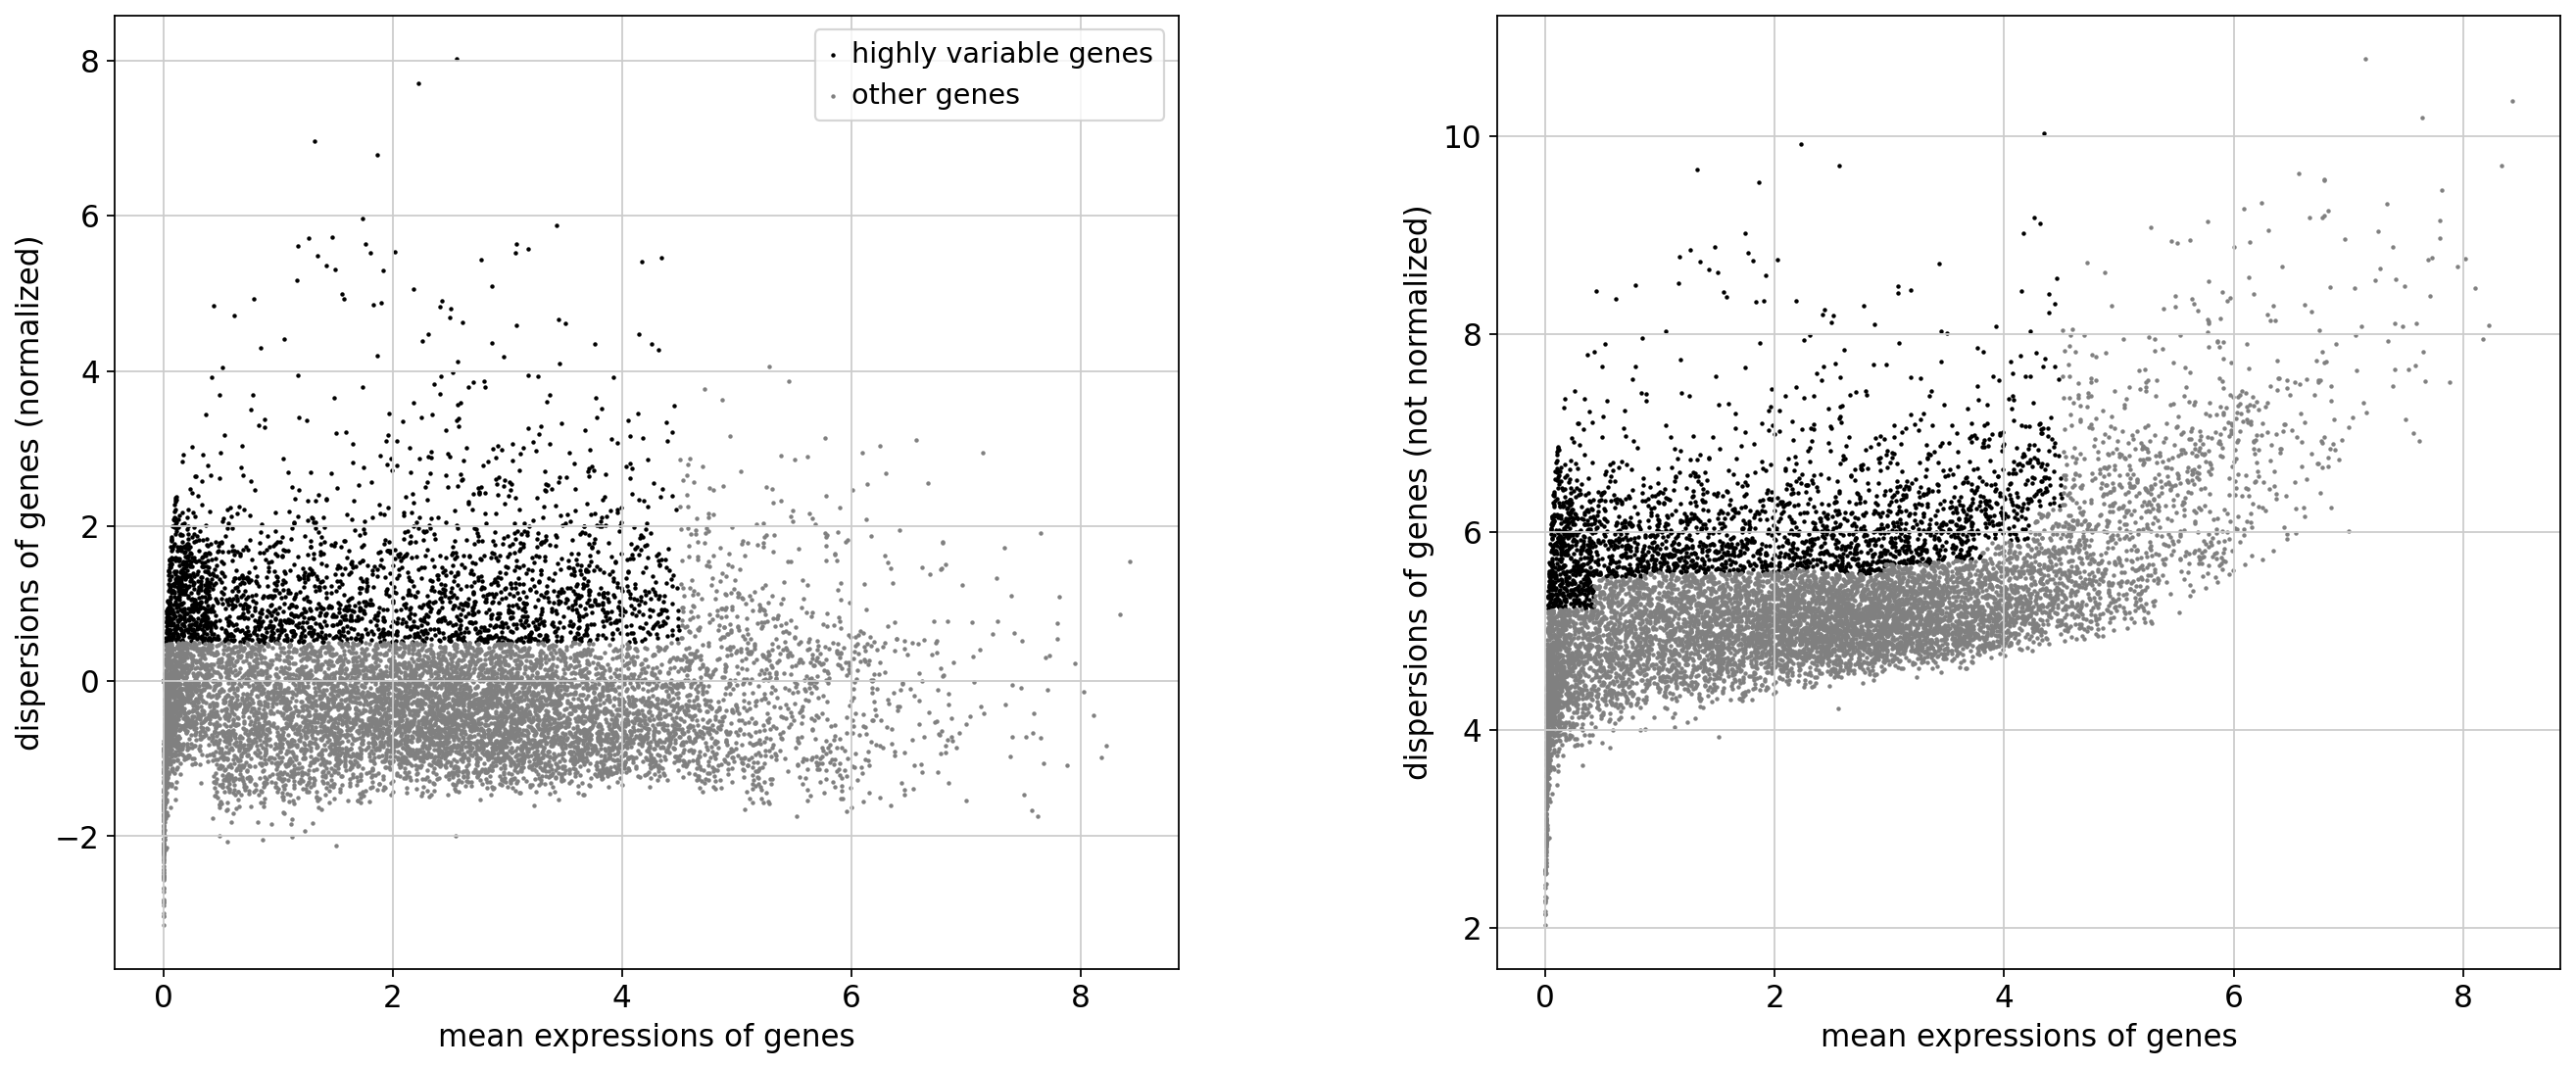

In [88]:
sc.pp.highly_variable_genes(alpha_half_of_cells, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

sc.pl.highly_variable_genes(alpha_half_of_cells)


In [89]:
sc.tl.pca(alpha_half_of_cells, svd_solver='arpack', random_state= 353)
sc.pp.neighbors(alpha_half_of_cells, n_neighbors=10, n_pcs=50, random_state= 678)
sc.tl.umap(alpha_half_of_cells, random_state= 5678)



In [90]:
alpha_half_of_cells.obs['Meta Cluster String'] =alpha_half_of_cells.obs['Meta Cluster'].astype(str)
beta_half_of_cells.obs['Meta Cluster String'] =beta_half_of_cells.obs['Meta Cluster'].astype(str)
single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster String'] =single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'].astype(str)

/tmp/ipykernel_658272/3437262584.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  beta_half_of_cells.obs['Meta Cluster String'] =beta_half_of_cells.obs['Meta Cluster'].astype(str)
/tmp/ipykernel_658272/3437262584.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster String'] =single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'].astype(str)


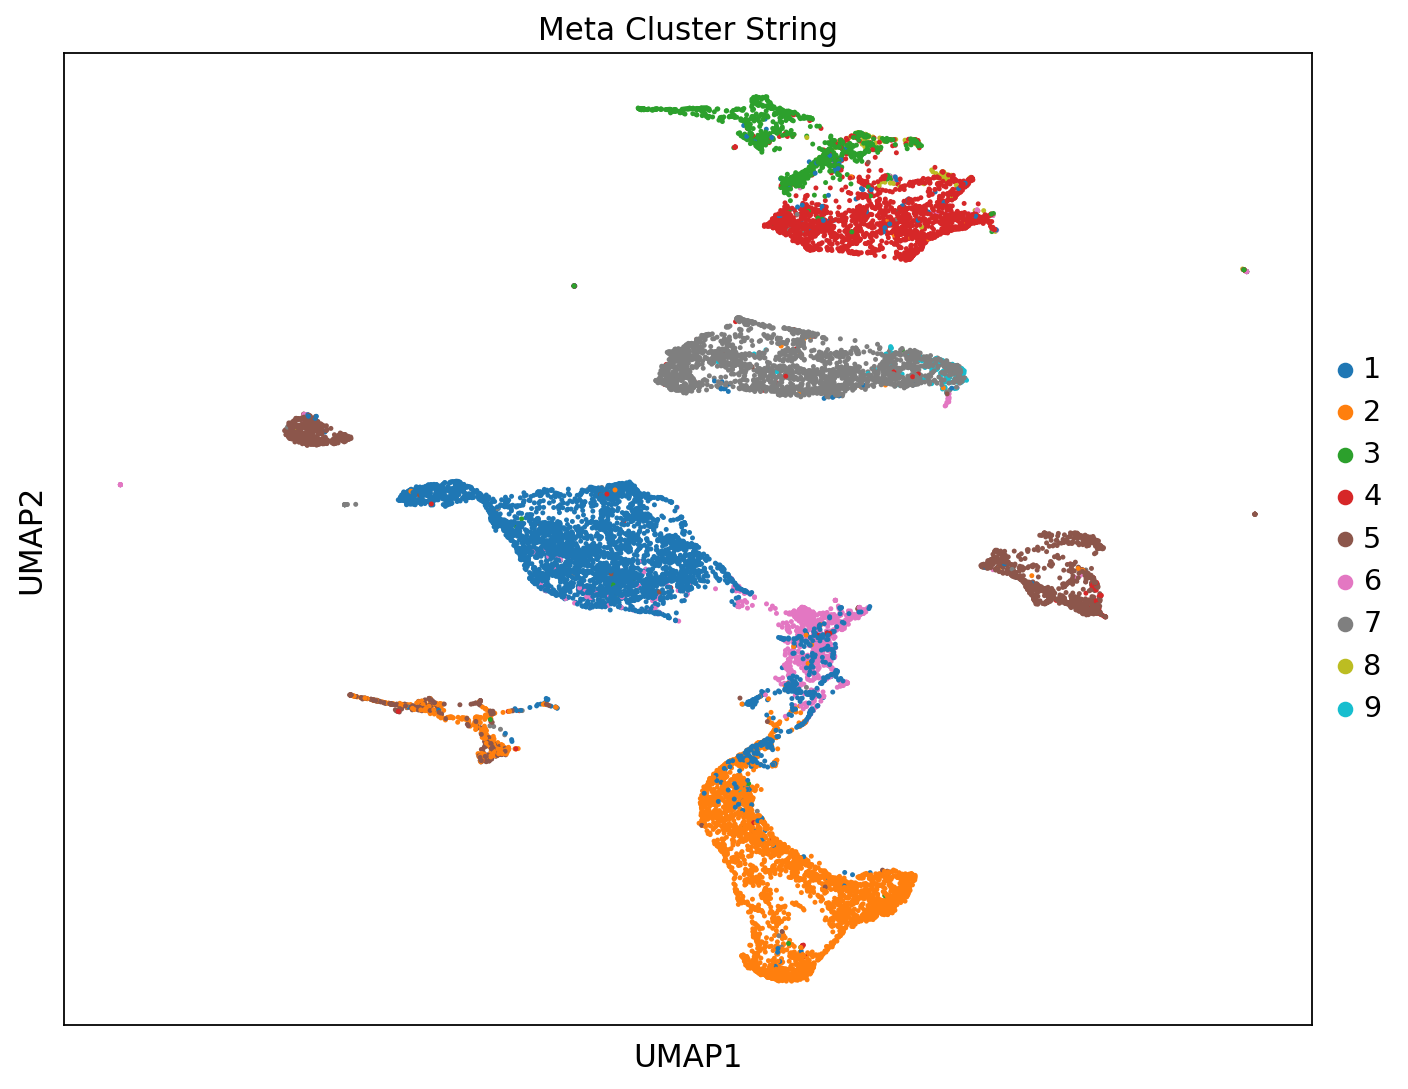

In [91]:
sc.pl.umap(single_cell_arabidopsis_root_4_datasets, color= 'Meta Cluster String', s = 20, palette = 'tab10')

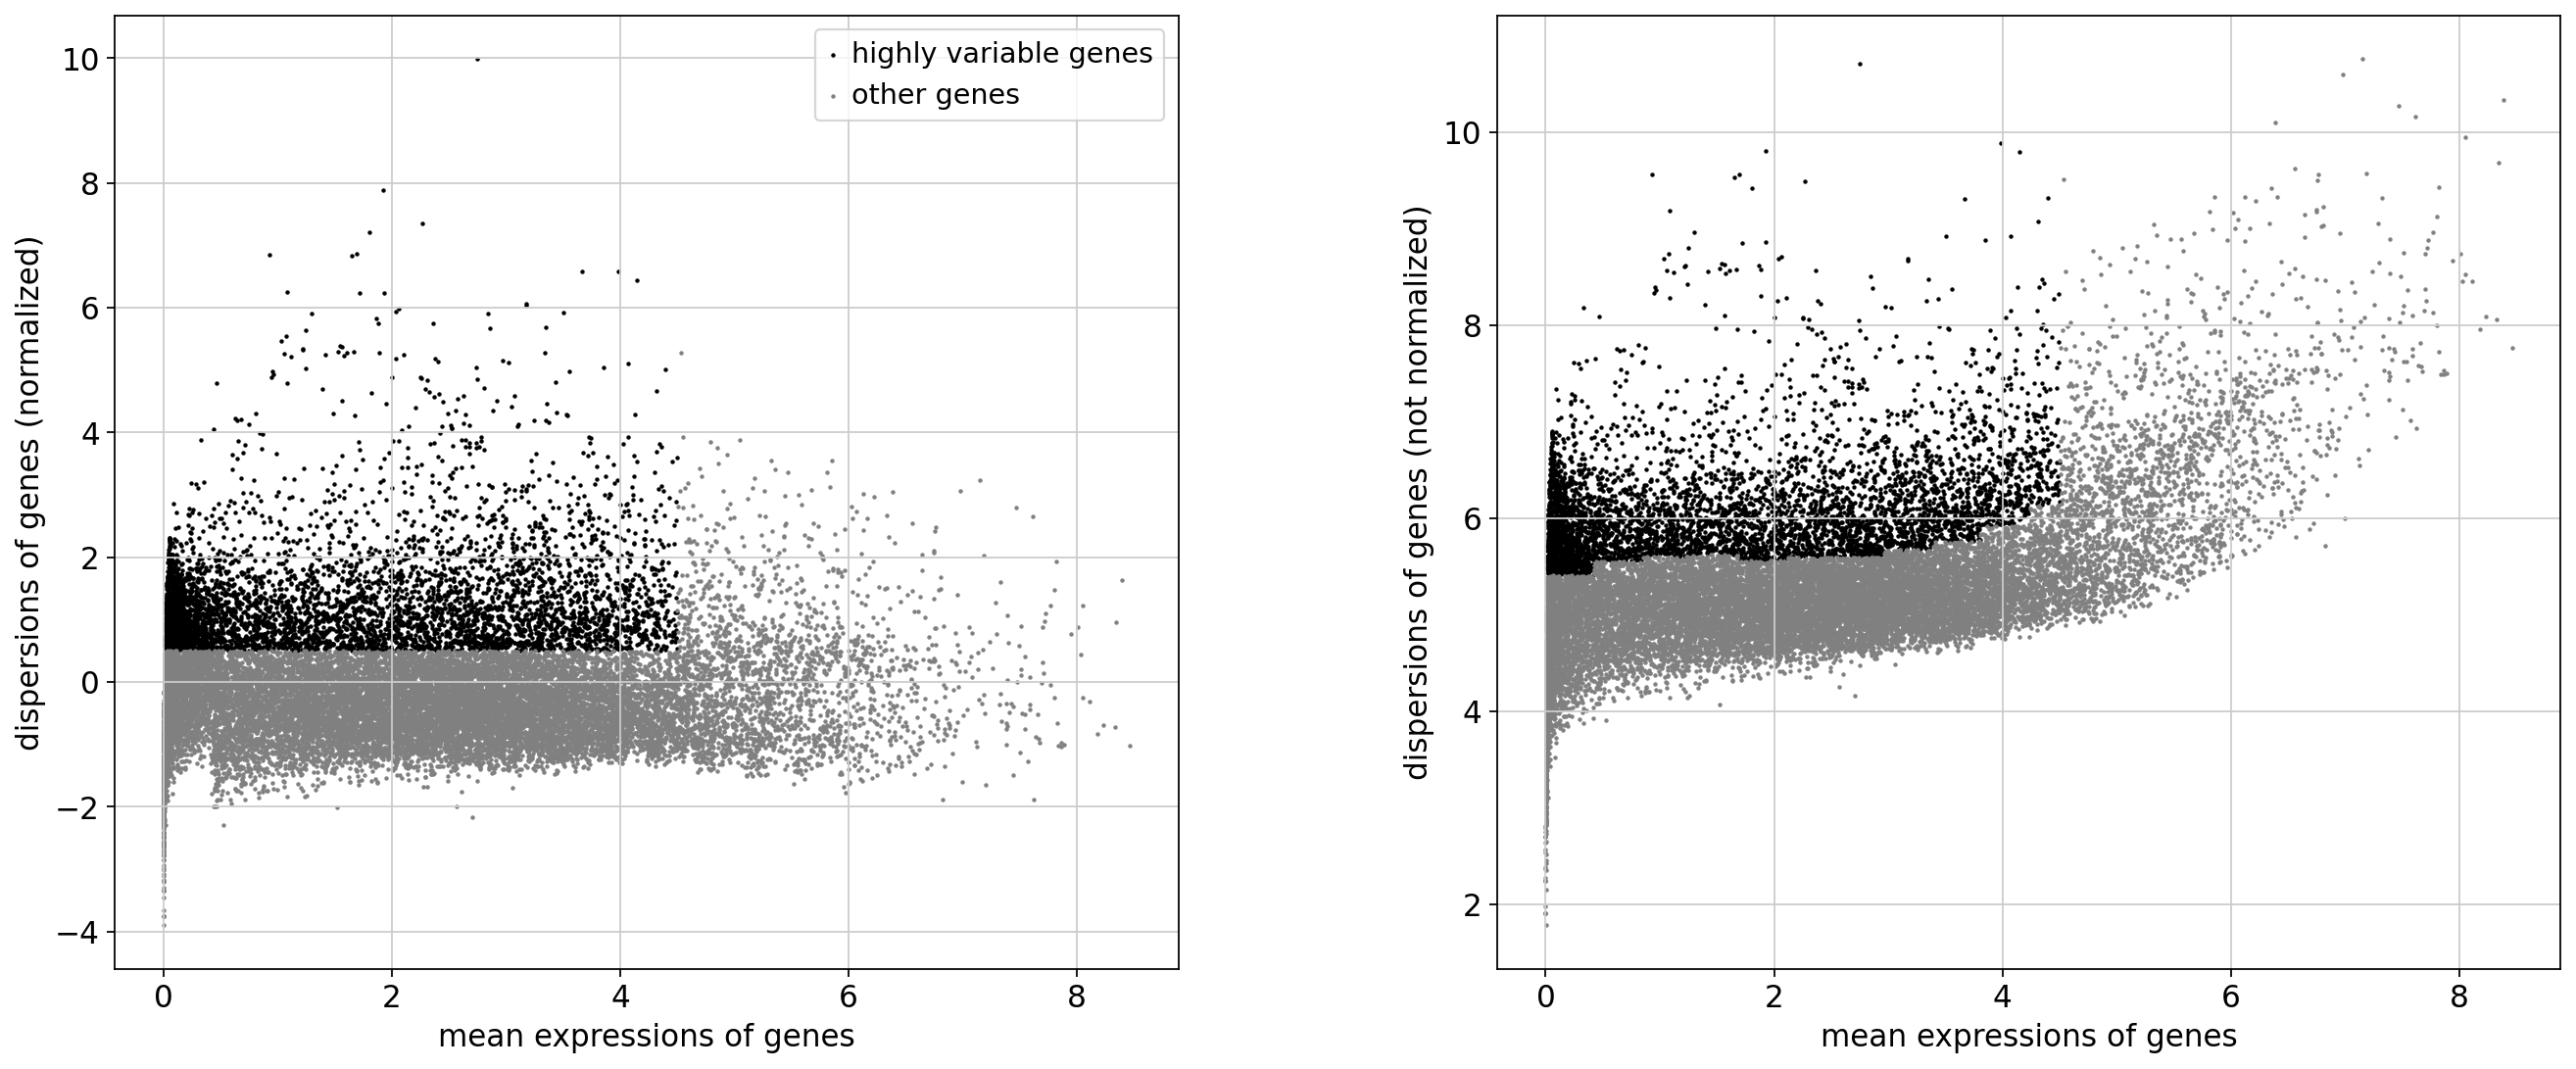

In [92]:
sc.pp.highly_variable_genes(single_cell_arabidopsis_root_4_datasets, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

sc.pl.highly_variable_genes(single_cell_arabidopsis_root_4_datasets)


In [93]:
meta_cluster_ID = {'1':'Atrichoblasts/Columella', '2':'Trichoblasts','3':'Xylem','4':'Phloem 1','5':'Cortex','6':'Mersematic/QC','7':'Endodermis','8':'Phloem 2','9':'Endodermis 2'}

In [94]:
single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID'] = single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster String'].map(meta_cluster_ID)
single_cell_arabidopsis_root_4_datasets.obs

Cell Type  Study Number  Batch Cluster  \
b'AAACCTGAGAAGGTTT-1'               10             1             15   
b'AAACCTGAGAGTGACC-1'               14             1             23   
b'AAACCTGAGCGATTCT-1'               15             1             25   
b'AAACCTGAGGCTCATT-1'               15             1             25   
b'AAACCTGAGGGTGTTG-1'               15             1             25   
...                                ...           ...            ...   
b'WT3_WT3_TTTGTCAGTCTGCGGT'          8             3             43   
b'WT3_WT3_TTTGTCAGTTCCACTC'         12             3             47   
b'WT3_WT3_TTTGTCATCCTCCTAG'          1             3             41   
b'WT3_WT3_TTTGTCATCTCGATGA'         10             3             45   
b'WT3_WT3_TTTGTCATCTTGCCGT'         10             3             45   

                             Meta Cluster Meta Cluster String  \
b'AAACCTGAGAAGGTTT-1'                   8                   8   
b'AAACCTGAGAGTGACC-1'                   1                   1   
b'AAACCTGAGCGATTCT-1'                   2                   2   
b'AAACCTGAGGCTCATT-1'                   2                   2   
b'AAACCTGAGGGTGTTG-1'                   2                   2   
...                                   ...                 ...   
b'WT3_WT3_TTTGTCAGTCTGCGGT'             7                   7   
b'WT3_WT3_TTTGTCAGTTCCACTC'             5                   5   
b'WT3_WT3_TTTGTCATCCTCCTAG'             4                   4   
b'WT3_WT3_TTTGTCATCTCGATGA'             2                   2   
b'WT3_WT3_TTTGTCATCTTGCCGT'             2                   2   

                                     Meta Cluster ID  
b'AAACCTGAGAAGGTTT-1'                       Phloem 2  
b'AAACCTGAGAGTGACC-1'        Atrichoblasts/Columella  
b'AAACCTGAGCGATTCT-1'                   Trichoblasts  
b'AAACCTGAGGCTCATT-1'                   Trichoblasts  
b'AAACCTGAGGGTGTTG-1'                   Trichoblasts  
...                                              ...  
b'WT3_WT3_TTTGTCAGTCTGCGGT'               Endodermis  
b'WT3_WT3_TTTGTCAGTTCCACTC'                   Cortex  
b'WT3_WT3_TTTGTCATCCTCCTAG'                 Phloem 1  
b'WT3_WT3_TTTGTCATCTCGATGA'             Trichoblasts  
b'WT3_WT3_TTTGTCATCTTGCCGT'             Trichoblasts  

[16635 rows x 6 columns]

In [95]:
highly_variable_genes = single_cell_arabidopsis_root_4_datasets.var.loc[single_cell_arabidopsis_root_4_datasets.var['highly_variable'] == True]

In [96]:
highly_variable_maize_map = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['arabidopsis'].isin(highly_variable_genes.index)]
highly_variable_maize_map

arabidopsis           maize arabidopsis_OrthoID  maize_OrthoID  Group ID
4       AT1G04030  Zm00001d027589       3702_0:000ec7  4577_0:000005         1
9       AT4G33330  Zm00001d027938       3702_0:004f05  4577_0:000011         6
11      AT4G34970  Zm00001d028392       3702_0:00435e  4577_0:000013         7
19      AT2G02990  Zm00001d032186       3702_0:002504  4577_0:000024        13
24      AT2G14820  Zm00001d033344       3702_0:002415  4577_0:000025        14
...           ...             ...                 ...            ...       ...
37503   AT4G27030  Zm00001d000020       3702_0:004d35  4577_0:0090bd      8098
37512   AT4G14630  Zm00001d000018       3702_0:004a94  4577_0:0090be      2432
37513   AT5G38940  Zm00001d000018       3702_0:005b8f  4577_0:0090be      2432
37568   AT1G13970  Zm00001d000143       3702_0:001b21  4577_0:009103      1036
37569   AT5G43150  Zm00001d000447       3702_0:00552d  4577_0:00910f       989

[6223 rows x 5 columns]

In [97]:
trimmed_maize_arab_map['Group ID'].value_counts().head(20)

2087    486
2709    105
241      91
521      84
2766     84
534      80
778      78
2432     75
2261     75
767      72
2450     70
496      70
1049     70
1577     68
653      64
3196     60
78       56
3036     56
2598     56
494      55
Name: Group ID, dtype: int64

In [98]:
highly_variable_maize_map['Group ID'].value_counts().head(50)

2766    60
2432    50
2002    40
1049    40
534     40
3109    36
494     35
2450    35
3059    35
1577    32
1979    30
2750    30
511     30
921     27
2087    27
241     26
29      24
2598    24
3697    24
1719    24
898     21
1590    21
4120    20
3196    20
2991    20
4009    20
321     20
3809    20
2369    20
2099    18
1289    18
2842    18
359     18
1969    18
1393    18
681     16
1727    16
316     16
1564    16
746     16
3606    16
3072    16
2054    16
3068    16
3505    15
263     15
1386    15
223     15
3033    15
2261    15
Name: Group ID, dtype: int64

In [99]:
current_group = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['Group ID'] == 3072] ## Possible Examples : 0, 586, 3059, 2690, 3515
#current_group
alpha_rows = []
beta_columns = []
for arab_gene in set(current_group['arabidopsis'].to_list()):
    if arab_gene in alpha_half_of_genes:
        alpha_rows.append(arab_gene)
    if arab_gene in beta_half_of_genes:
        beta_columns.append(arab_gene)
        
subset_dataframe =  arab_cococonet_alpha_half.loc[arab_cococonet_alpha_half.index.isin(alpha_rows)]
subset_dataframe = subset_dataframe[subset_dataframe.columns.intersection(beta_columns)]
subset_dataframe

AT5G10100  AT5G65140  AT4G39770  AT1G78090
query                                                
AT2G22190        0.0      507.7      596.6      415.4
AT1G35910        0.0      482.7      439.9      478.8

In [100]:
genes_of_interest = ['AT2G22190','AT4G39770','AT5G10100'] ### Best Gene Sets - ['AT4G13340','AT1G62440','AT3G22800'] , ['AT4G13340','AT1G62440','AT4G28380'], ['AT4G11470','AT4G23180','AT4G23290'],['AT1G23080','AT2G01420','AT5G57090']
# Real Best ['AT1G73280','AT1G73300','AT2G23000'], ['AT2G14960','AT1G28130','AT5G13320'], ['AT5G22730','AT3G51530','AT5G22660'], ['AT1G16150','AT1G16160','AT4G31100'],['AT2G25450','AT1G06640','AT1G04380']['AT4G37490','AT3G11520','AT1G34460']['AT5G06730','AT4G08770','AT3G49110']['AT1G44970','AT5G66390','AT4G36430'] ['AT4G10960','AT4G23920','AT1G63180']['AT2G22190','AT4G39770','AT5G10100']
#Ultra best ['AT1G16150','AT1G16160','AT4G31100']['AT5G51990','AT4G25470','AT4G25490']['AT1G72200','AT1G22500','AT2G35000']
total_gene_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])
list_of_values_for_line_plot = []

for cell_type in set(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID']):
    current_type_anndata = single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(genes_of_interest)]

    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X)


    ### bar plot Calculator
    # series_of_means = panda_version_of_current_data.mean()
    # list_of_values_for_line_plot.extend(list(zip(series_of_means.index,series_of_means,[cell_type]*len(series_of_means))))


    ## Don't Average and instead get all values for pointplot
    melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
    melted_genes['Cell Type'] = cell_type
    total_gene_df = pd.concat([total_gene_df,melted_genes])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Xylem'),
  Text(1, 0, 'Cortex'),
  Text(2, 0, 'Endodermis 2'),
  Text(3, 0, 'Phloem 1'),
  Text(4, 0, 'Atrichoblasts/Columella'),
  Text(5, 0, 'Mersematic/QC'),
  Text(6, 0, 'Endodermis'),
  Text(7, 0, 'Trichoblasts'),
  Text(8, 0, 'Phloem 2')])

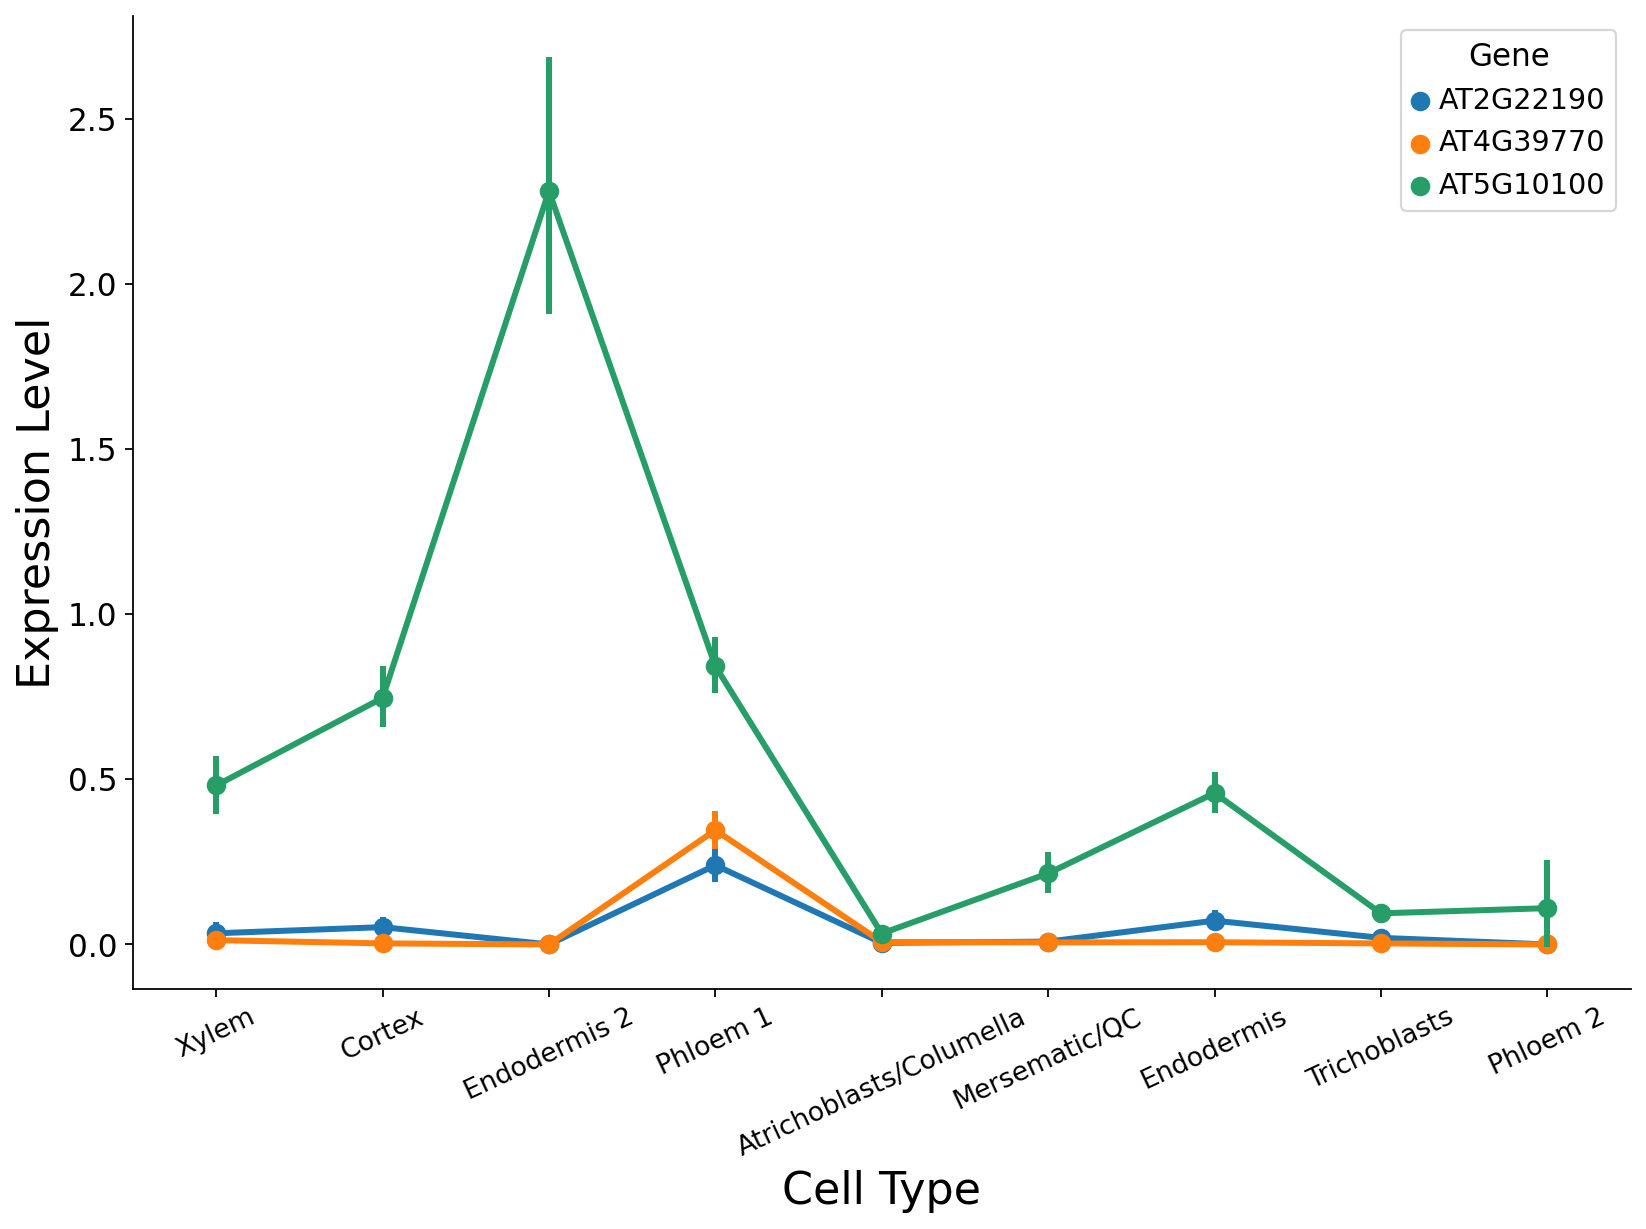

In [101]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.pointplot(data = total_gene_df, x = 'Cell Type',y = 'Expression Level',hue = 'Gene', errorbar= 'se')
plt.ylabel("Expression Level", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)

In [102]:
cell_type_mapper = {'Phloem 1':1,'Xylem':2,'Endodermis 2':3,'Phloem 2':4,'Endodermis':5,'Atrichoblasts/Columella':6,'Trichoblasts':7,'Mersematic/QC':8,'Cortex':9}

In [103]:
total_gene_df['Cell Type Number'] = total_gene_df['Cell Type'].map(cell_type_mapper)

In [104]:
total_gene_df= total_gene_df.reset_index(drop = True)
total_gene_df

Gene Expression Level Cell Type  Cell Type Number
0      AT2G22190              0.0     Xylem                 2
1      AT2G22190              0.0     Xylem                 2
2      AT2G22190              0.0     Xylem                 2
3      AT2G22190              0.0     Xylem                 2
4      AT2G22190              0.0     Xylem                 2
...          ...              ...       ...               ...
49900  AT5G10100              0.0  Phloem 2                 4
49901  AT5G10100              0.0  Phloem 2                 4
49902  AT5G10100              0.0  Phloem 2                 4
49903  AT5G10100              0.0  Phloem 2                 4
49904  AT5G10100              0.0  Phloem 2                 4

[49905 rows x 4 columns]

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Phloem 1'),
  Text(2, 0, 'Xylem'),
  Text(3, 0, 'Endodermis 2'),
  Text(4, 0, 'Phloem 2'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Atrichoblasts/Columella'),
  Text(7, 0, 'Trichoblasts'),
  Text(8, 0, 'Meristematic/QC'),
  Text(9, 0, 'Cortex')])

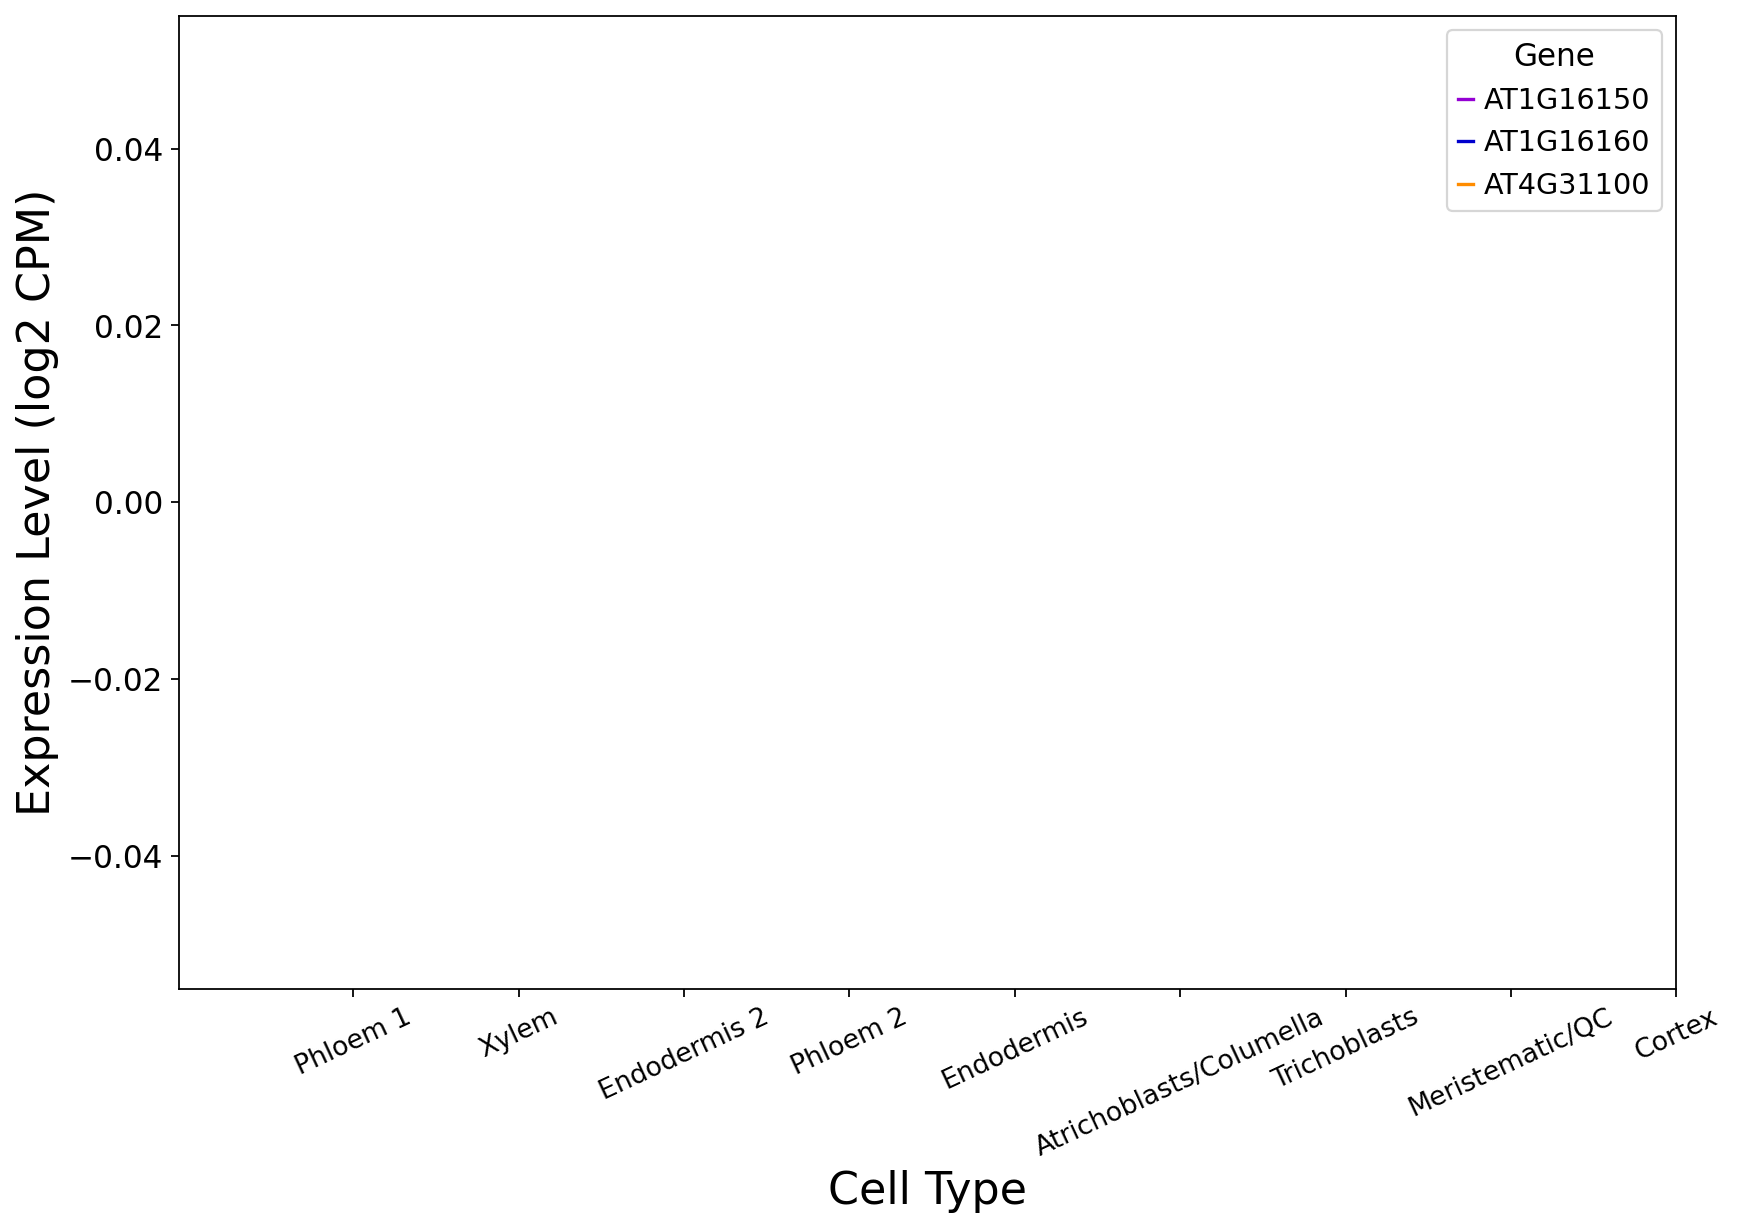

In [105]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.lineplot(data = total_gene_df, x = 'Cell Type Number',y = 'Expression Level',hue = 'Gene', hue_order=['AT1G16150','AT1G16160','AT4G31100'], palette= ['darkviolet','mediumblue','darkorange'],  err_kws= {'alpha':.07,}, linewidth = 2) #style = 'Gene', dashes = True
plt.ylabel("Expression Level (log2 CPM)", fontsize = 20)
plt.xlabel("Cell Type", fontsize = 20)
# sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
ax.set_xticks([1,2,3,4,5,6,7,8,9], labels=['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#ax.set_xticklabels(['Phloem 1','Xylem','Endodermis 2','Phloem 2','Endodermis','Atrichoblasts/Columella','Trichoblasts','Meristematic/QC','Cortex'])
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/Arabidopsis_genes.svg')

In [106]:
genes_of_interest = ['AT1G16150','AT1G16160','AT4G31100'] ### Best Gene Sets - ['AT4G13340','AT1G62440','AT3G22800'] , ['AT4G13340','AT1G62440','AT4G28380'], ['AT4G11470','AT4G23180','AT4G23290'],
# Real Best ['AT1G73280','AT1G73300','AT2G23000'], ['AT2G14960','AT1G28130','AT5G13320'], ['AT5G22730','AT3G51530','AT5G22660'], ['AT1G16150','AT1G16160','AT4G31100']
list_of_values_for_line_plot = []
full_cell_list_with_cell_type_for_joy_plot = pd.DataFrame()
for cell_type in set(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID']):
    print(cell_type)
    current_type_anndata = single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID'] == cell_type,:]
    current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(genes_of_interest)]

    panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X)
    panda_version_of_current_data['Cell Type'] = cell_type
    full_cell_list_with_cell_type_for_joy_plot = pd.concat([full_cell_list_with_cell_type_for_joy_plot,panda_version_of_current_data])

    ### bar plot Calculator
    # series_of_means = panda_version_of_current_data.mean()
    # list_of_values_for_line_plot.extend(list(zip(series_of_means.index,series_of_means,[cell_type]*len(series_of_means))))


#     ## Don't Average and instead get all values for pointplot
#     melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level')
#     melted_genes['Cell Type'] = cell_type
#     total_gene_df = pd.concat([total_gene_df,melted_genes])
# panda_version_of_current_data

Xylem
Cortex
Endodermis 2
Phloem 1
Atrichoblasts/Columella
Mersematic/QC
Endodermis
Trichoblasts
Phloem 2


In [107]:
full_cell_list_with_cell_type_for_joy_plot

AT1G16150  AT1G16160  AT4G31100 Cell Type
b'AACTCCCCACGTCAGC-1'        0.0        0.0   5.268885     Xylem
b'AAGGCAGTCCAAATGC-1'        0.0        0.0   0.000000     Xylem
b'ACACCAACACAACTGT-1'        0.0        0.0   0.000000     Xylem
b'ACACCGGTCCGCTGTT-1'        0.0        0.0   0.000000     Xylem
b'ACACTGACAGATCCAT-1'        0.0        0.0   0.000000     Xylem
...                          ...        ...        ...       ...
b'TTCGCAGTCCTT_A'            0.0        0.0   0.000000  Phloem 2
b'TTCATGCTACCC_A'            0.0        0.0   0.000000  Phloem 2
b'ACGTAGCGACTT_B'            0.0        0.0   0.000000  Phloem 2
b'AAAGGCGACCAT_B'            0.0        0.0   0.000000  Phloem 2
b'AGCGAAGGGTCT_B'            0.0        0.0   0.000000  Phloem 2

[16635 rows x 4 columns]

In [108]:
#import joypy
#fig, axes = joypy.joyplot(full_cell_list_with_cell_type_for_joy_plot, by = 'Cell Type', ylim = 'own', legend = True, fill = False, kind = 'kde')

In [109]:
#genes_of_interest = ['AT1G16150','AT1G16160','AT4G31100'] ### Best Gene Sets - ['AT4G13340','AT1G62440','AT3G22800'] , ['AT4G13340','AT1G62440','AT4G28380'], ['AT4G11470','AT4G23180','AT4G23290'],['AT1G44970','AT5G66390','AT4G36430']['AT1G23080','AT2G01420','AT5G57090']
# Real Best ['AT1G73280','AT1G73300','AT2G23000'], ['AT2G14960','AT1G28130','AT5G13320'], ['AT5G22730','AT3G51530','AT5G22660'], ['AT1G16150','AT1G16160','AT4G31100']['AT1G44970','AT5G66390','AT4G36430']['AT1G72200','AT1G22500','AT2G35000']['AT2G22190','AT4G39770','AT5G10100']
target_genes=['AT1G16150',"AT2G14960","AT2G25450",'AT4G25470','AT4G37490','AT5G06730','AT1G44970','AT5G22730','AT4G13340','AT1G72200','AT4G10960','AT1G23080','AT2G22190']
accepted_genes=['AT1G16160','AT1G28130','AT1G06640','AT5G51990','AT3G11520','AT4G08770','AT5G66390','AT3G51530','AT1G62440','AT1G22500','AT4G23920','AT2G01420','AT4G39770']
rejected_genes = ['AT4G31100','AT5G13320','AT1G04380','AT4G25490','AT1G34460','AT3G49110','AT4G36430','AT5G22660','AT4G28380','AT2G35000','AT1G63180','AT5G57090','AT5G10100']


dict_of_good_plotting_examples = {}
current_iteration = 0
for target,accepted,rejected in zip(target_genes,accepted_genes,rejected_genes):
    genes_of_interest = []
    genes_of_interest.append(target)
    genes_of_interest.append(accepted)
    genes_of_interest.append(rejected)
    total_gene_df = pd.DataFrame(columns = ['Gene','Expression Level','Cell Type'])
    for cell_type in set(single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID']):
    

        current_type_anndata = single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster ID'] == cell_type,:]
        current_type_anndata = current_type_anndata[:,current_type_anndata.var_names.isin(genes_of_interest)]

        panda_version_of_current_data = pd.DataFrame(columns = current_type_anndata.var_names, index = current_type_anndata.obs.index, data = current_type_anndata.X)


    ### bar plot Calculator
    # series_of_means = panda_version_of_current_data.mean()
    # list_of_values_for_line_plot.extend(list(zip(series_of_means.index,series_of_means,[cell_type]*len(series_of_means))))


    ## Don't Average and instead get all values for pointplot
        panda_version_of_current_data = panda_version_of_current_data.rename(columns = {accepted:'Accepted Coexpressolog',rejected:'Rejected Coexpressolog'})
        melted_genes = panda_version_of_current_data.melt(var_name = 'Gene',value_name= 'Expression Level', id_vars= target)
        melted_genes = melted_genes.rename(columns = {target:'Target Gene'})
        melted_genes['Cell Type'] = cell_type
        total_gene_df = pd.concat([total_gene_df,melted_genes])
    total_gene_df = total_gene_df.astype({'Expression Level': 'float'})
    dict_of_good_plotting_examples[current_iteration] = total_gene_df
    current_iteration+=1


In [110]:
dict_of_good_plotting_examples

{0:                        Gene  Expression Level Cell Type  Target Gene
 0    Accepted Coexpressolog               0.0     Xylem          0.0
 1    Accepted Coexpressolog               0.0     Xylem          0.0
 2    Accepted Coexpressolog               0.0     Xylem          0.0
 3    Accepted Coexpressolog               0.0     Xylem          0.0
 4    Accepted Coexpressolog               0.0     Xylem          0.0
 ..                      ...               ...       ...          ...
 291  Rejected Coexpressolog               0.0  Phloem 2          0.0
 292  Rejected Coexpressolog               0.0  Phloem 2          0.0
 293  Rejected Coexpressolog               0.0  Phloem 2          0.0
 294  Rejected Coexpressolog               0.0  Phloem 2          0.0
 295  Rejected Coexpressolog               0.0  Phloem 2          0.0
 
 [33270 rows x 4 columns],
 1:                        Gene  Expression Level Cell Type  Target Gene
 0    Accepted Coexpressolog               0.0     Xyle

In [111]:
#dict_of_good_plotting_examples[3] = dict_of_good_plotting_examples[3].astype({'Expression Level': 'float'})

In [112]:
dict_of_good_plotting_examples[3]['Expression Level']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
291    0.000000
292    0.000000
293    6.265176
294    0.000000
295    0.000000
Name: Expression Level, Length: 33270, dtype: float64

In [113]:
dict_of_good_plotting_examples[3].groupby(['Gene','Cell Type']).mean()

Expression Level  Target Gene
Gene                   Cell Type                                             
Accepted Coexpressolog Atrichoblasts/Columella          0.181624     0.340331
                       Cortex                           0.407742     0.590711
                       Endodermis                       0.625529     0.848235
                       Endodermis 2                     1.863217     1.957808
                       Mersematic/QC                    1.195953     1.350220
                       Phloem 1                         0.667114     0.772890
                       Phloem 2                         0.358583     0.613266
                       Trichoblasts                     0.306900     0.643338
                       Xylem                            0.604106     1.239567
Rejected Coexpressolog Atrichoblasts/Columella          0.287545     0.340331
                       Cortex                           0.165818     0.590711
                       Endodermis                       0.266844     0.848235
                       Endodermis 2                     0.877504     1.957808
                       Mersematic/QC                    1.609201     1.350220
                       Phloem 1                         0.589925     0.772890
                       Phloem 2                         0.335539     0.613266
                       Trichoblasts                     0.110076     0.643338
                       Xylem                            0.856675     1.239567

In [114]:
dict_of_good_plotting_examples[3].groupby(['Gene','Cell Type']).mean()+.000001

Expression Level  Target Gene
Gene                   Cell Type                                             
Accepted Coexpressolog Atrichoblasts/Columella          0.181625     0.340332
                       Cortex                           0.407743     0.590712
                       Endodermis                       0.625530     0.848236
                       Endodermis 2                     1.863218     1.957809
                       Mersematic/QC                    1.195954     1.350221
                       Phloem 1                         0.667115     0.772891
                       Phloem 2                         0.358584     0.613267
                       Trichoblasts                     0.306901     0.643339
                       Xylem                            0.604107     1.239568
Rejected Coexpressolog Atrichoblasts/Columella          0.287546     0.340332
                       Cortex                           0.165819     0.590712
                       Endodermis                       0.266845     0.848236
                       Endodermis 2                     0.877505     1.957809
                       Mersematic/QC                    1.609202     1.350221
                       Phloem 1                         0.589926     0.772891
                       Phloem 2                         0.335540     0.613267
                       Trichoblasts                     0.110077     0.643339
                       Xylem                            0.856676     1.239568

In [115]:
full_distance_plotter = pd.DataFrame()
for key in dict_of_good_plotting_examples.keys():
    current_plotter = dict_of_good_plotting_examples[key].groupby(['Gene','Cell Type']).mean()+.01
    full_distance_plotter = pd.concat([full_distance_plotter,current_plotter])

In [116]:
full_distance_plotter

Expression Level  Target Gene
Gene                   Cell Type                                             
Accepted Coexpressolog Atrichoblasts/Columella          0.688174     0.756476
                       Cortex                           0.053946     0.083105
                       Endodermis                       0.023477     0.023376
                       Endodermis 2                     0.049071     0.088392
                       Mersematic/QC                    0.119948     0.056463
...                                                          ...          ...
Rejected Coexpressolog Mersematic/QC                    0.225113     0.018523
                       Phloem 1                         0.852456     0.249768
                       Phloem 2                         0.119825     0.010000
                       Trichoblasts                     0.104159     0.029909
                       Xylem                            0.491199     0.043748

[234 rows x 2 columns]

In [117]:
full_distance_plotter = full_distance_plotter[['Target Gene','Expression Level']]

In [118]:
full_distance_plotter = full_distance_plotter.reset_index()

In [119]:
p1 = np.array([0,0])
p2 = np.array([40,40])
p3 = np.asarray(full_distance_plotter[['Target Gene','Expression Level']])
distance_from_identity_line=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)

In [120]:
full_distance_plotter['Euclidian Distance From Equal Expression'] = abs(distance_from_identity_line)

In [121]:
full_distance_plotter['Euclidian Distance From Equal Expression'] = full_distance_plotter['Euclidian Distance From Equal Expression']+.1

In [122]:
full_distance_plotter

Gene                Cell Type  Target Gene  \
0    Accepted Coexpressolog  Atrichoblasts/Columella     0.756476   
1    Accepted Coexpressolog                   Cortex     0.083105   
2    Accepted Coexpressolog               Endodermis     0.023376   
3    Accepted Coexpressolog             Endodermis 2     0.088392   
4    Accepted Coexpressolog            Mersematic/QC     0.056463   
..                      ...                      ...          ...   
229  Rejected Coexpressolog            Mersematic/QC     0.018523   
230  Rejected Coexpressolog                 Phloem 1     0.249768   
231  Rejected Coexpressolog                 Phloem 2     0.010000   
232  Rejected Coexpressolog             Trichoblasts     0.029909   
233  Rejected Coexpressolog                    Xylem     0.043748   

     Expression Level  Euclidian Distance From Equal Expression  
0            0.688174                                  0.148297  
1            0.053946                                  0.120618  
2            0.023477                                  0.100071  
3            0.049071                                  0.127804  
4            0.119948                                  0.144890  
..                ...                                       ...  
229          0.225113                                  0.246082  
230          0.852456                                  0.526165  
231          0.119825                                  0.177658  
232          0.104159                                  0.152503  
233          0.491199                                  0.416396  

[234 rows x 5 columns]

<AxesSubplot:>

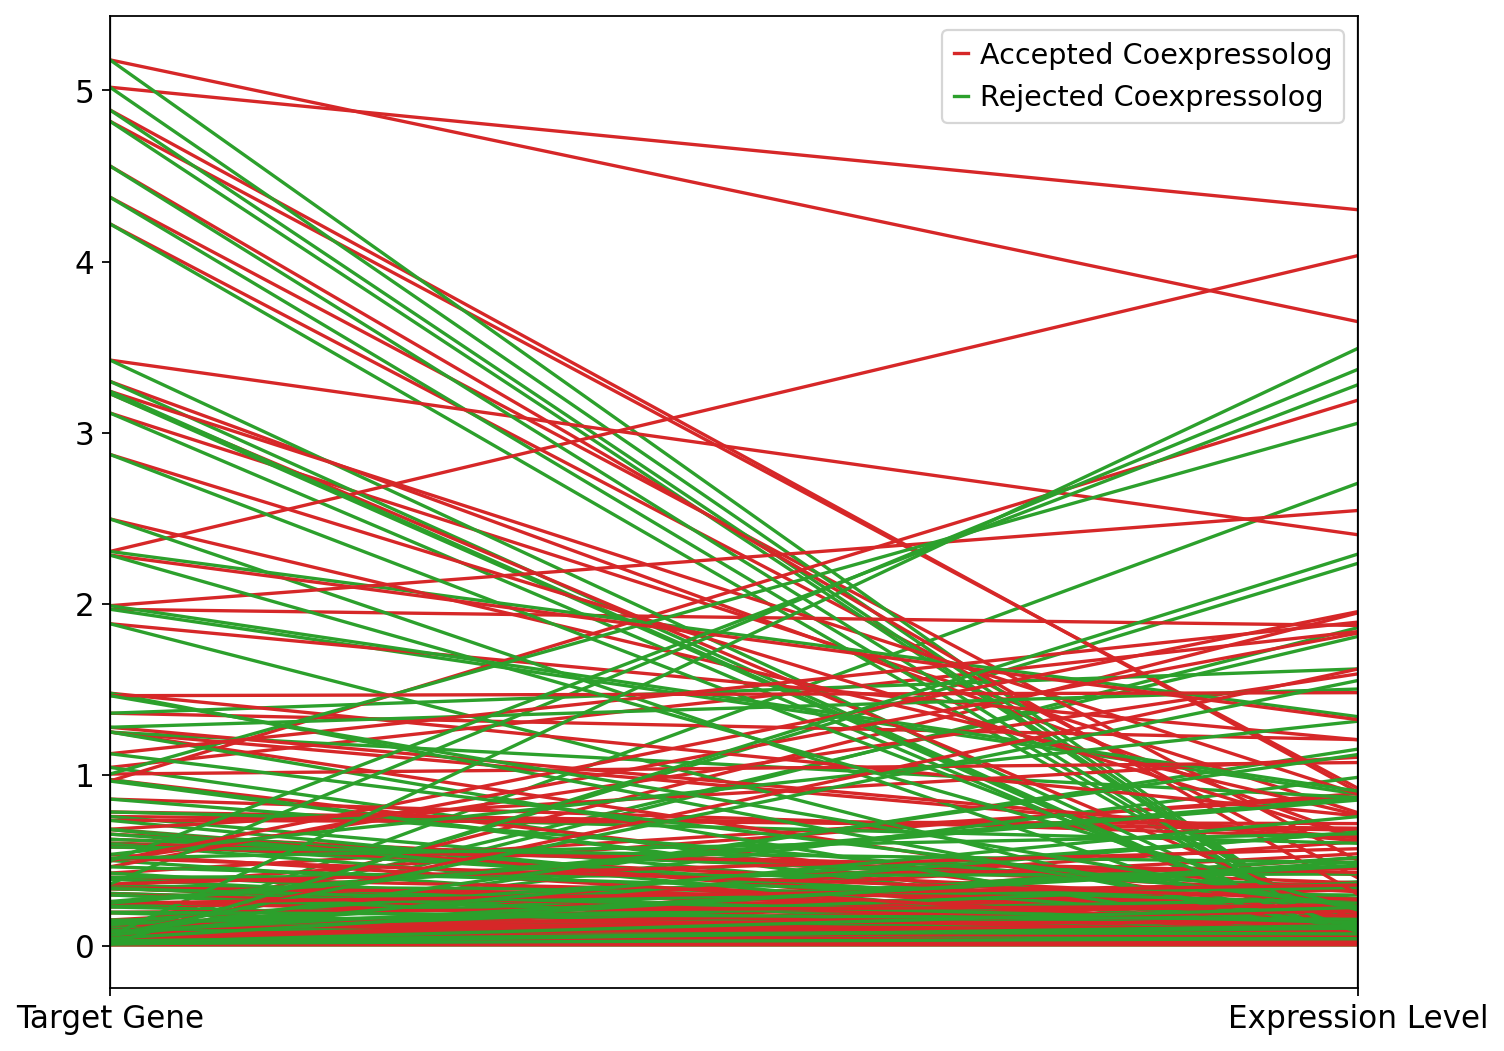

In [123]:
pd.plotting.parallel_coordinates(full_distance_plotter,'Gene', cols = ['Target Gene','Expression Level'], color = ['tab:red','tab:green'])

In [124]:
len(full_distance_plotter['Target Gene'].unique())

111

In [125]:
full_distance_plotter['Quintile'] = pd.qcut(x = full_distance_plotter['Target Gene'], q = 4, labels = [1,2,3,4] )

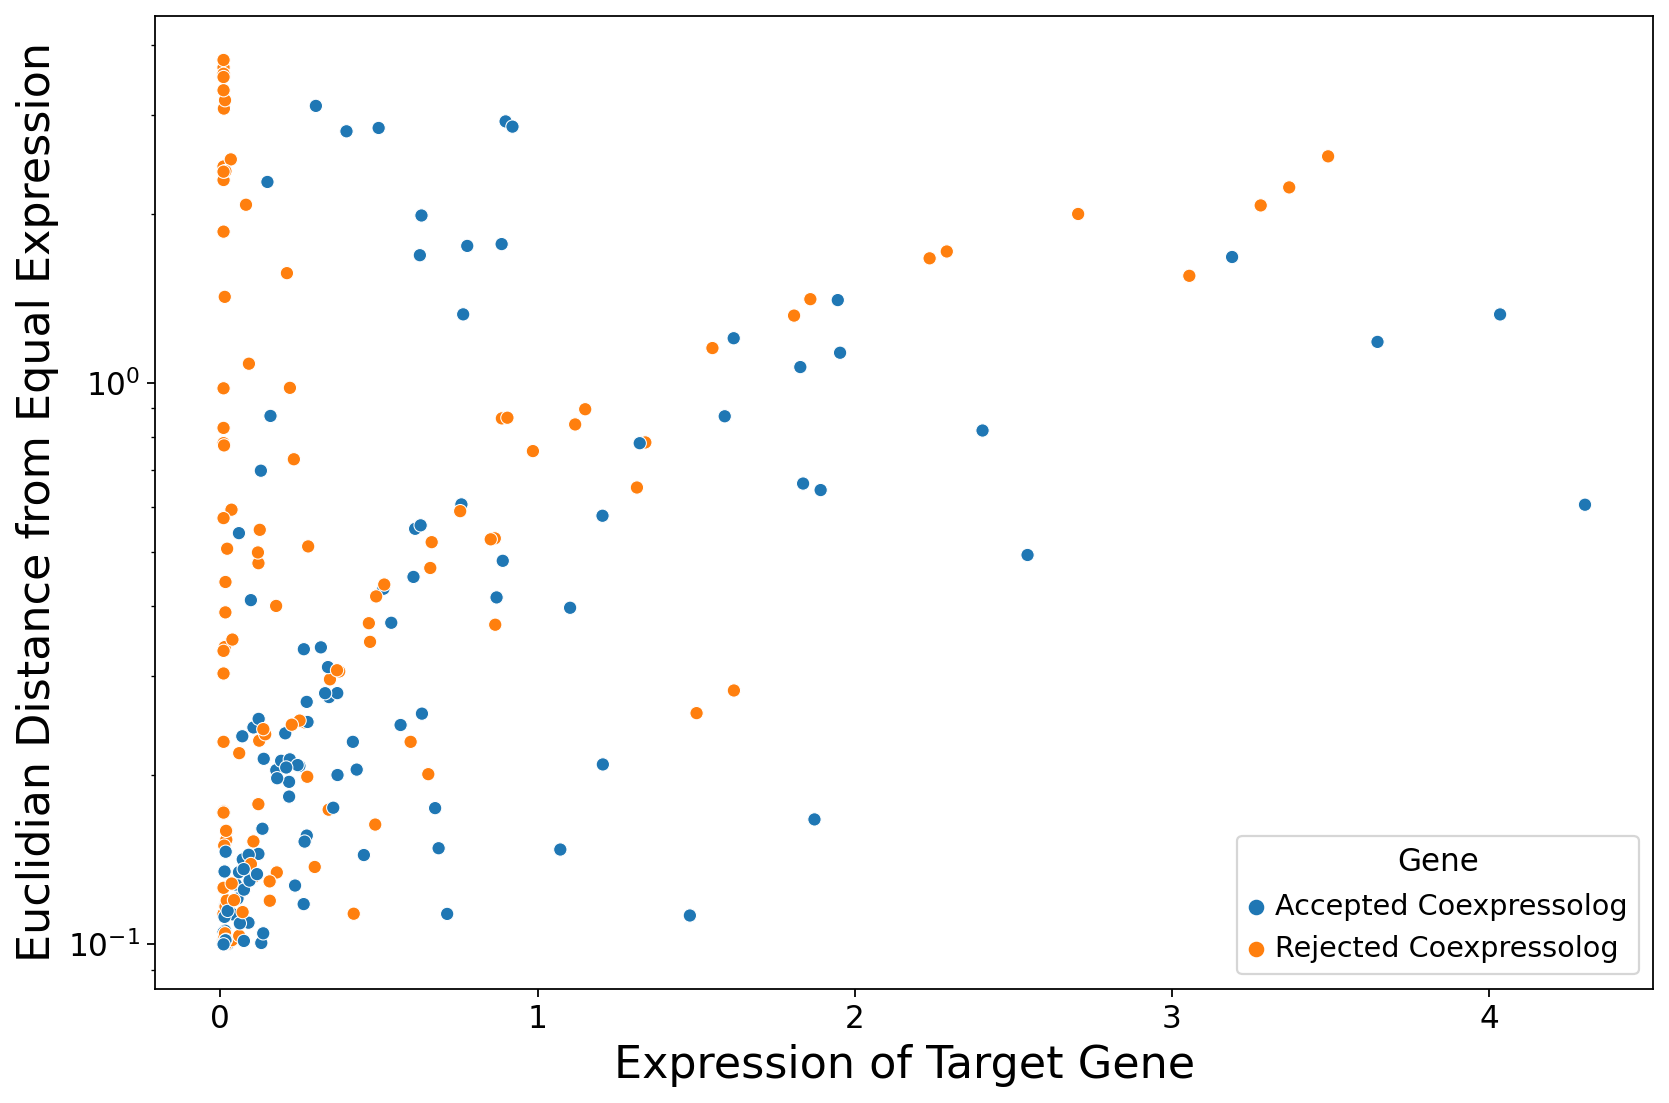

In [126]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = full_distance_plotter, x = 'Expression Level', y = 'Euclidian Distance From Equal Expression', hue = 'Gene',)
plt.ylabel("Euclidian Distance from Equal Expression", fontsize = 20)
plt.xlabel("Expression of Target Gene", fontsize = 20)
#sns.despine()
ax.set(yscale = 'log')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/dist_of_euclidean_distance.svg')

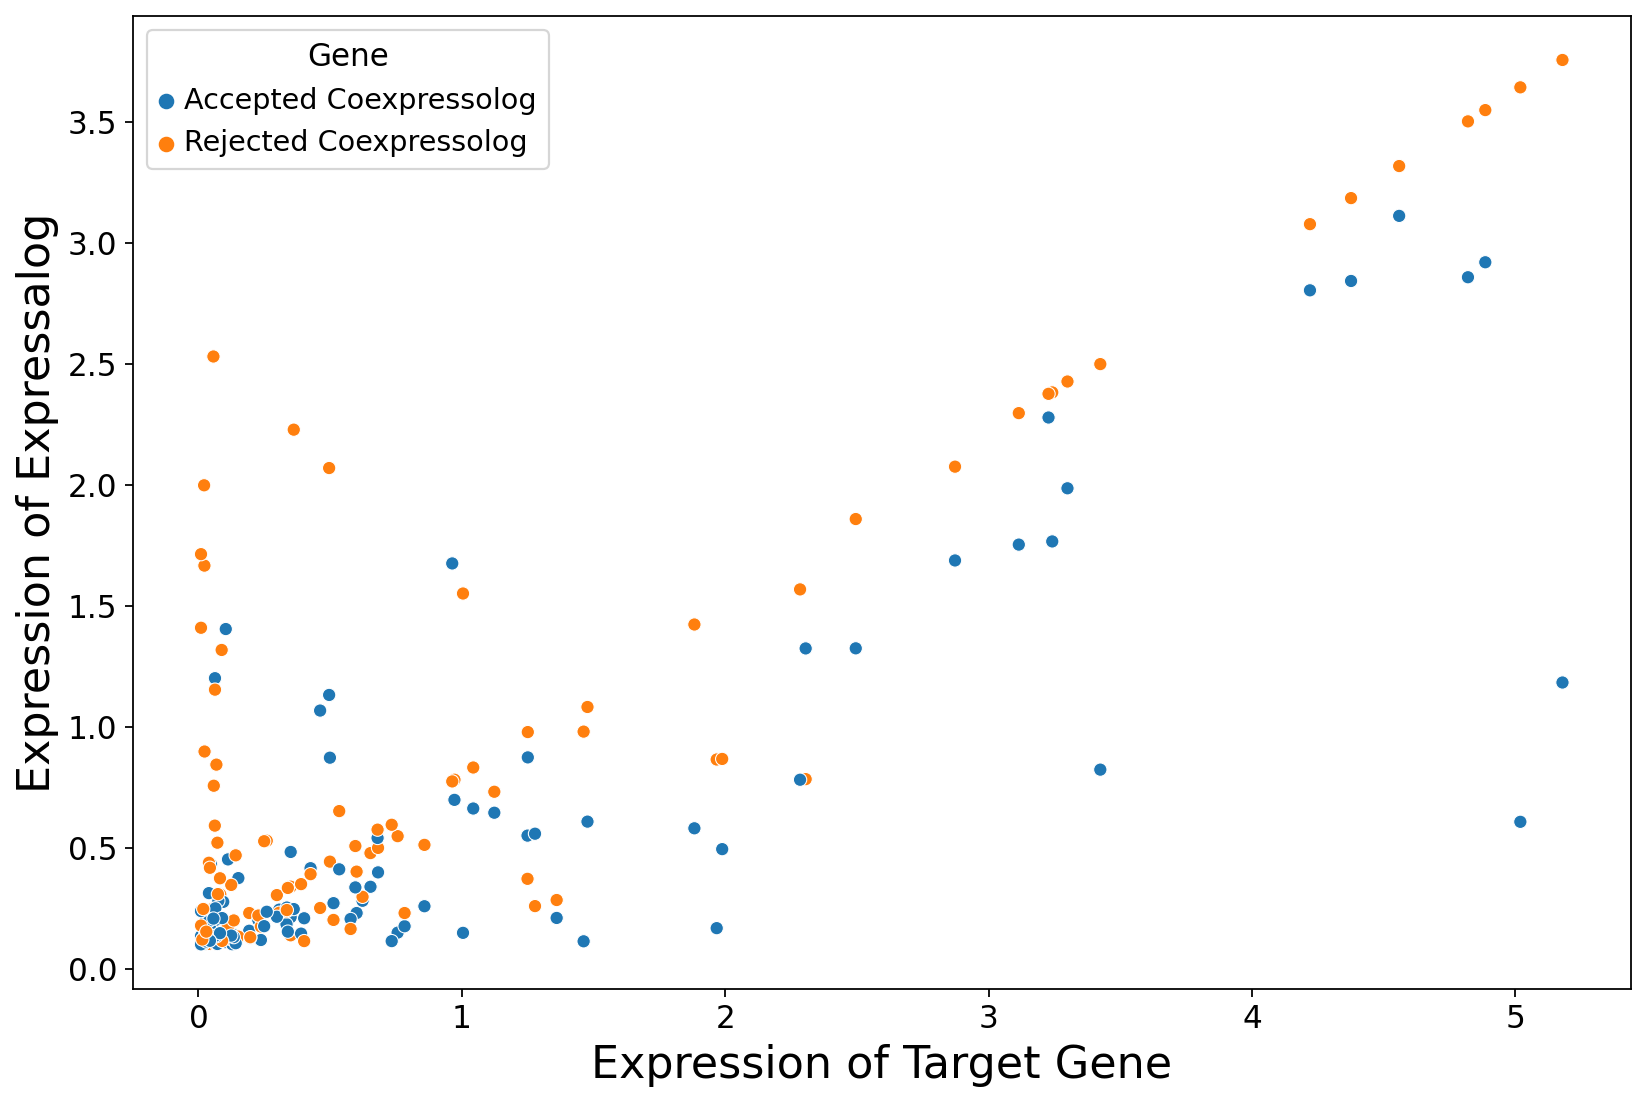

In [127]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = full_distance_plotter, x = 'Target Gene', y = 'Euclidian Distance From Equal Expression', hue = 'Gene',)
plt.ylabel("Expression of Expressalog", fontsize = 20)
plt.xlabel("Expression of Target Gene", fontsize = 20)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/dist_of_euclidean_distance.svg')

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


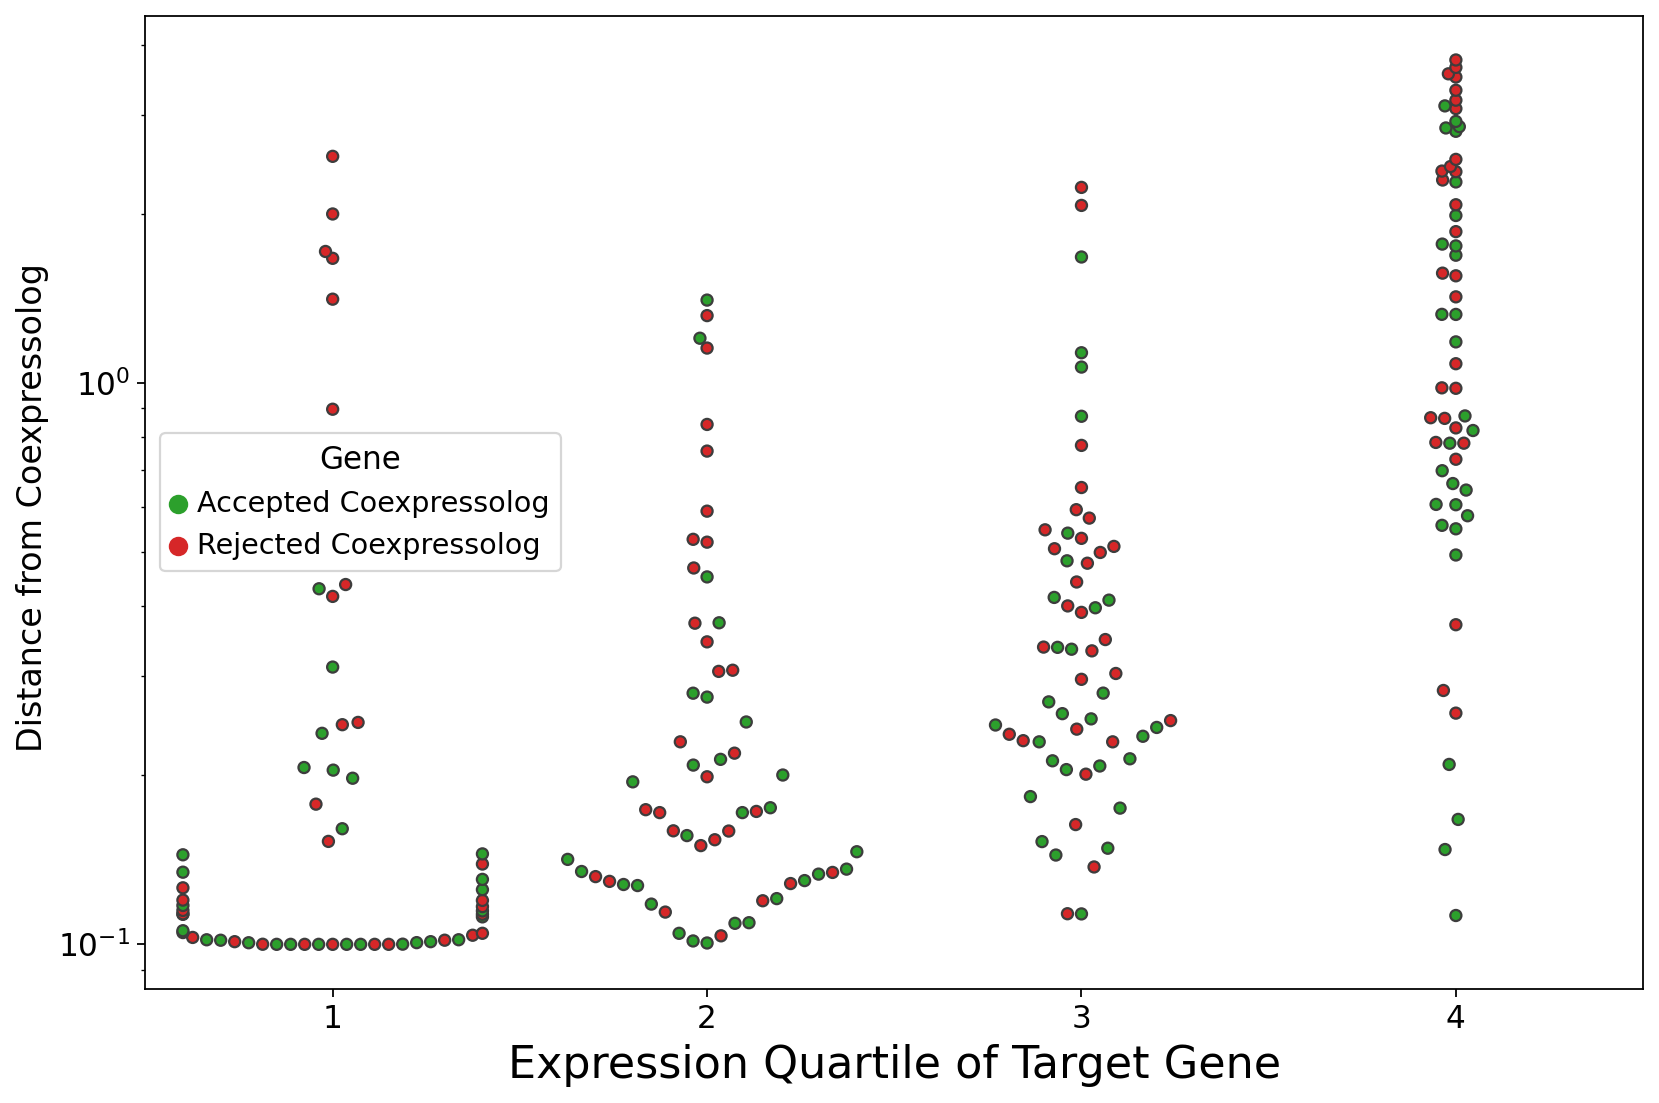

In [128]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.swarmplot(data = full_distance_plotter, x = 'Quintile', y = 'Euclidian Distance From Equal Expression', hue = 'Gene', palette = ['tab:green','tab:red'], linewidth= 1)
plt.ylabel("Distance from Coexpressolog ", fontsize = 15)
plt.xlabel("Expression Quartile of Target Gene", fontsize = 20)
#sns.despine()
ax.set(yscale = 'log')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/euclidian_distance_boxplot.svg')

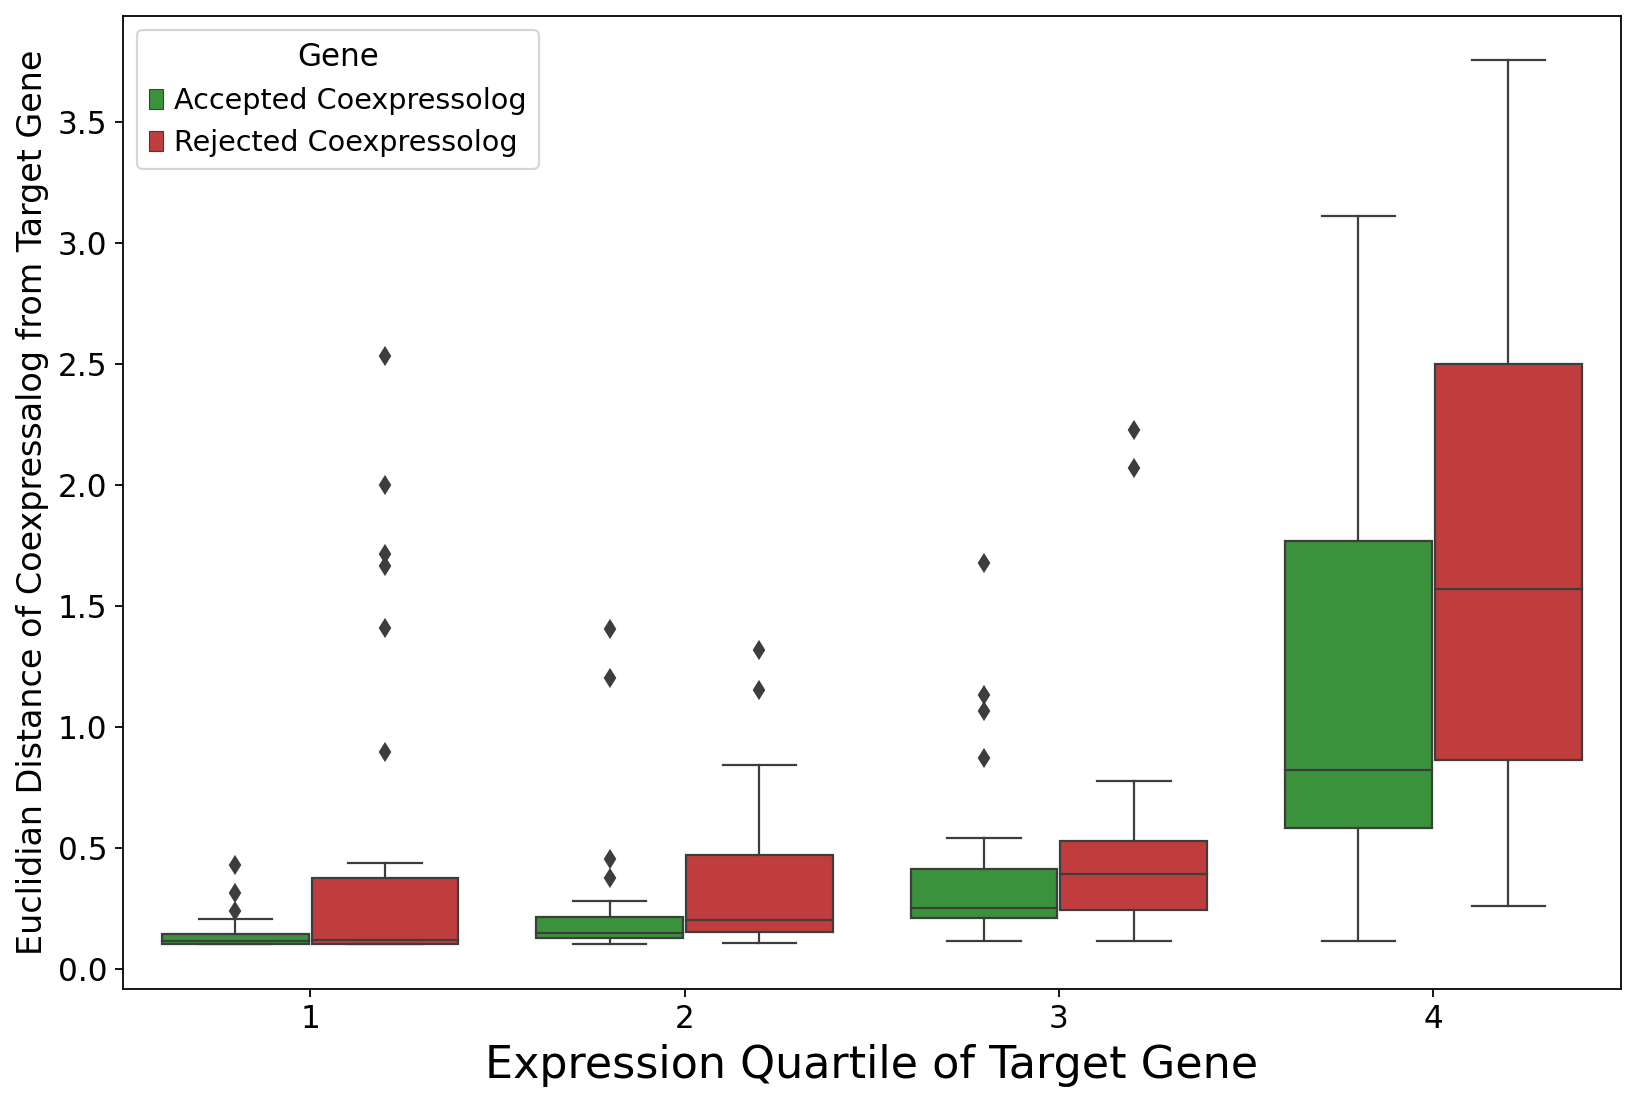

In [129]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = full_distance_plotter, x = 'Quintile', y = 'Euclidian Distance From Equal Expression', hue = 'Gene', palette = ['tab:green','tab:red'], linewidth= 1)
plt.ylabel("Euclidian Distance of Coexpressalog from Target Gene", fontsize = 15)
plt.xlabel("Expression Quartile of Target Gene", fontsize = 20)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/euclidian_distance_boxplot.svg')

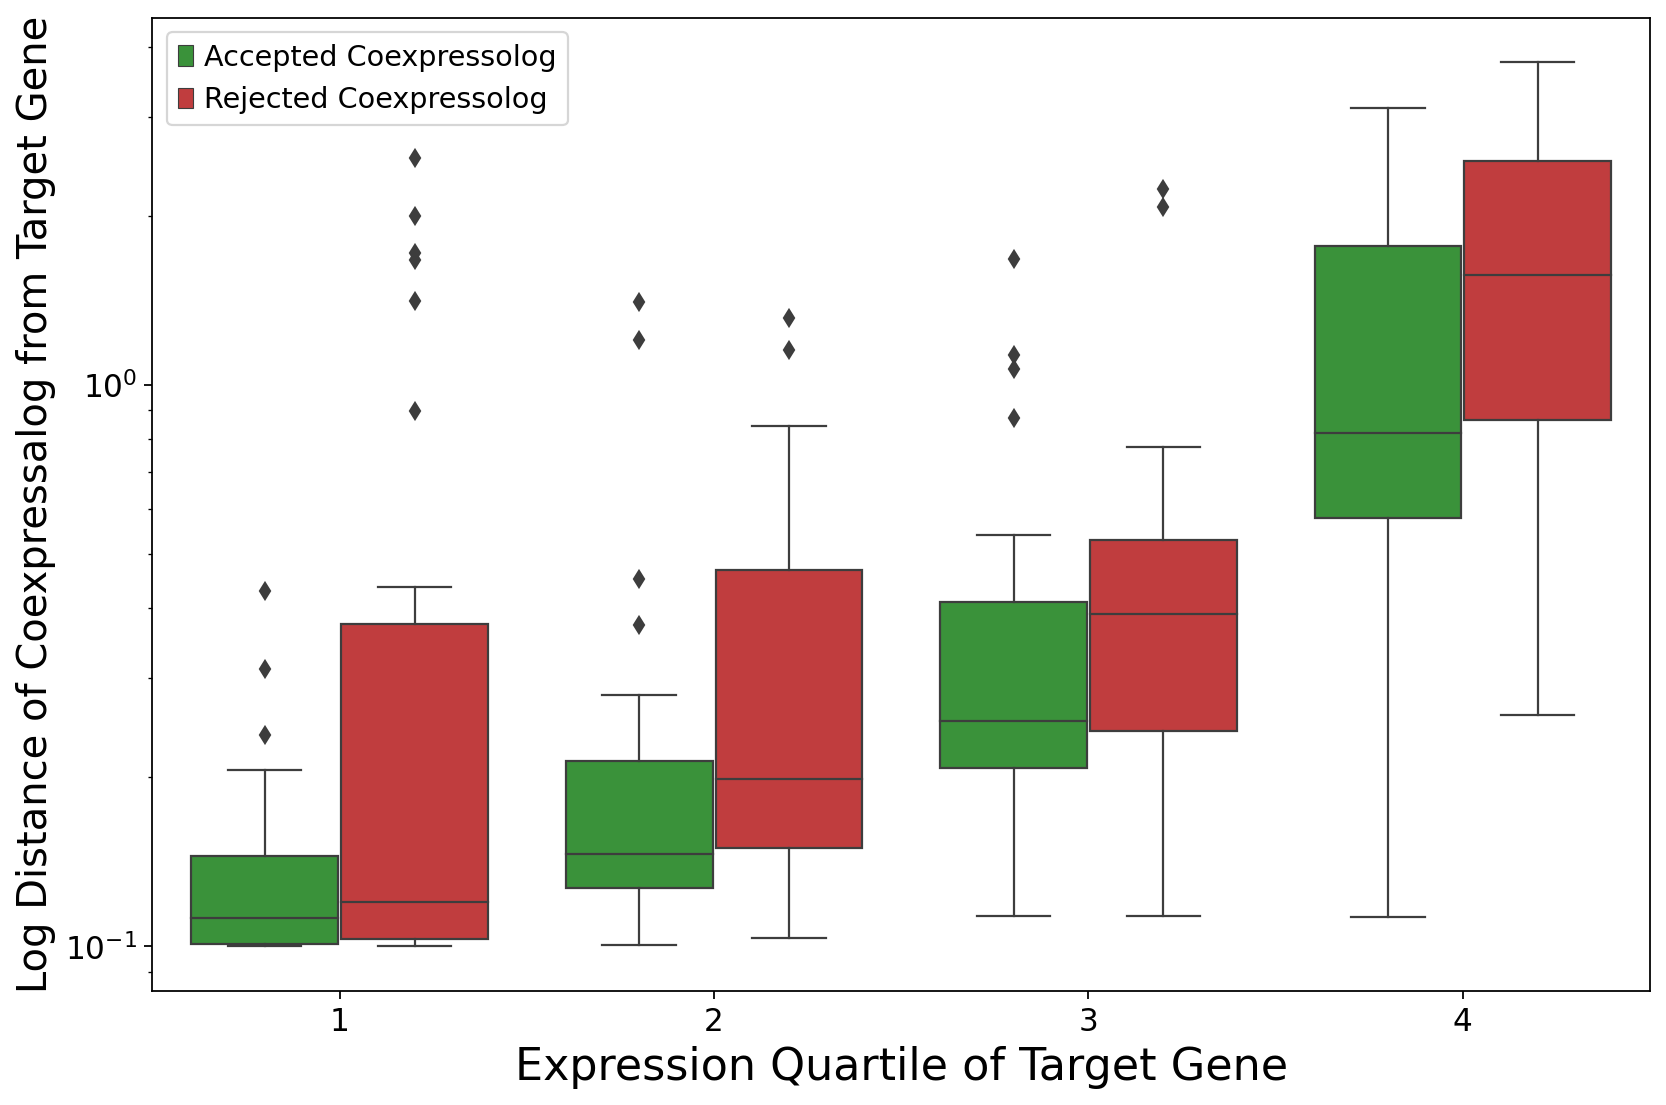

In [130]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = full_distance_plotter, x = 'Quintile', y = 'Euclidian Distance From Equal Expression', hue = 'Gene', palette = ['tab:green','tab:red'], linewidth= 1)
plt.ylabel("Log Distance of Coexpressalog from Target Gene", fontsize = 18)
plt.xlabel("Expression Quartile of Target Gene", fontsize = 20)
#sns.despine()
ax.set(yscale = 'log')
plt.legend(loc = 'upper left')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/euclidian_distance_boxplot_log_scale.svg')

In [131]:
full_distance_plotter['Divided Expression'] = full_distance_plotter['Euclidian Distance From Equal Expression']/full_distance_plotter['Target Gene']
full_distance_plotter

Gene                Cell Type  Target Gene  \
0    Accepted Coexpressolog  Atrichoblasts/Columella     0.756476   
1    Accepted Coexpressolog                   Cortex     0.083105   
2    Accepted Coexpressolog               Endodermis     0.023376   
3    Accepted Coexpressolog             Endodermis 2     0.088392   
4    Accepted Coexpressolog            Mersematic/QC     0.056463   
..                      ...                      ...          ...   
229  Rejected Coexpressolog            Mersematic/QC     0.018523   
230  Rejected Coexpressolog                 Phloem 1     0.249768   
231  Rejected Coexpressolog                 Phloem 2     0.010000   
232  Rejected Coexpressolog             Trichoblasts     0.029909   
233  Rejected Coexpressolog                    Xylem     0.043748   

     Expression Level  Euclidian Distance From Equal Expression Quintile  \
0            0.688174                                  0.148297        3   
1            0.053946                                  0.120618        2   
2            0.023477                                  0.100071        1   
3            0.049071                                  0.127804        2   
4            0.119948                                  0.144890        1   
..                ...                                       ...      ...   
229          0.225113                                  0.246082        1   
230          0.852456                                  0.526165        2   
231          0.119825                                  0.177658        1   
232          0.104159                                  0.152503        1   
233          0.491199                                  0.416396        1   

     Divided Expression  
0              0.196037  
1              1.451396  
2              4.280882  
3              1.445878  
4              2.566098  
..                  ...  
229           13.285394  
230            2.106613  
231           17.765786  
232            5.098941  
233            9.518019  

[234 rows x 7 columns]

/tmp/ipykernel_658272/3802055351.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((0,20))


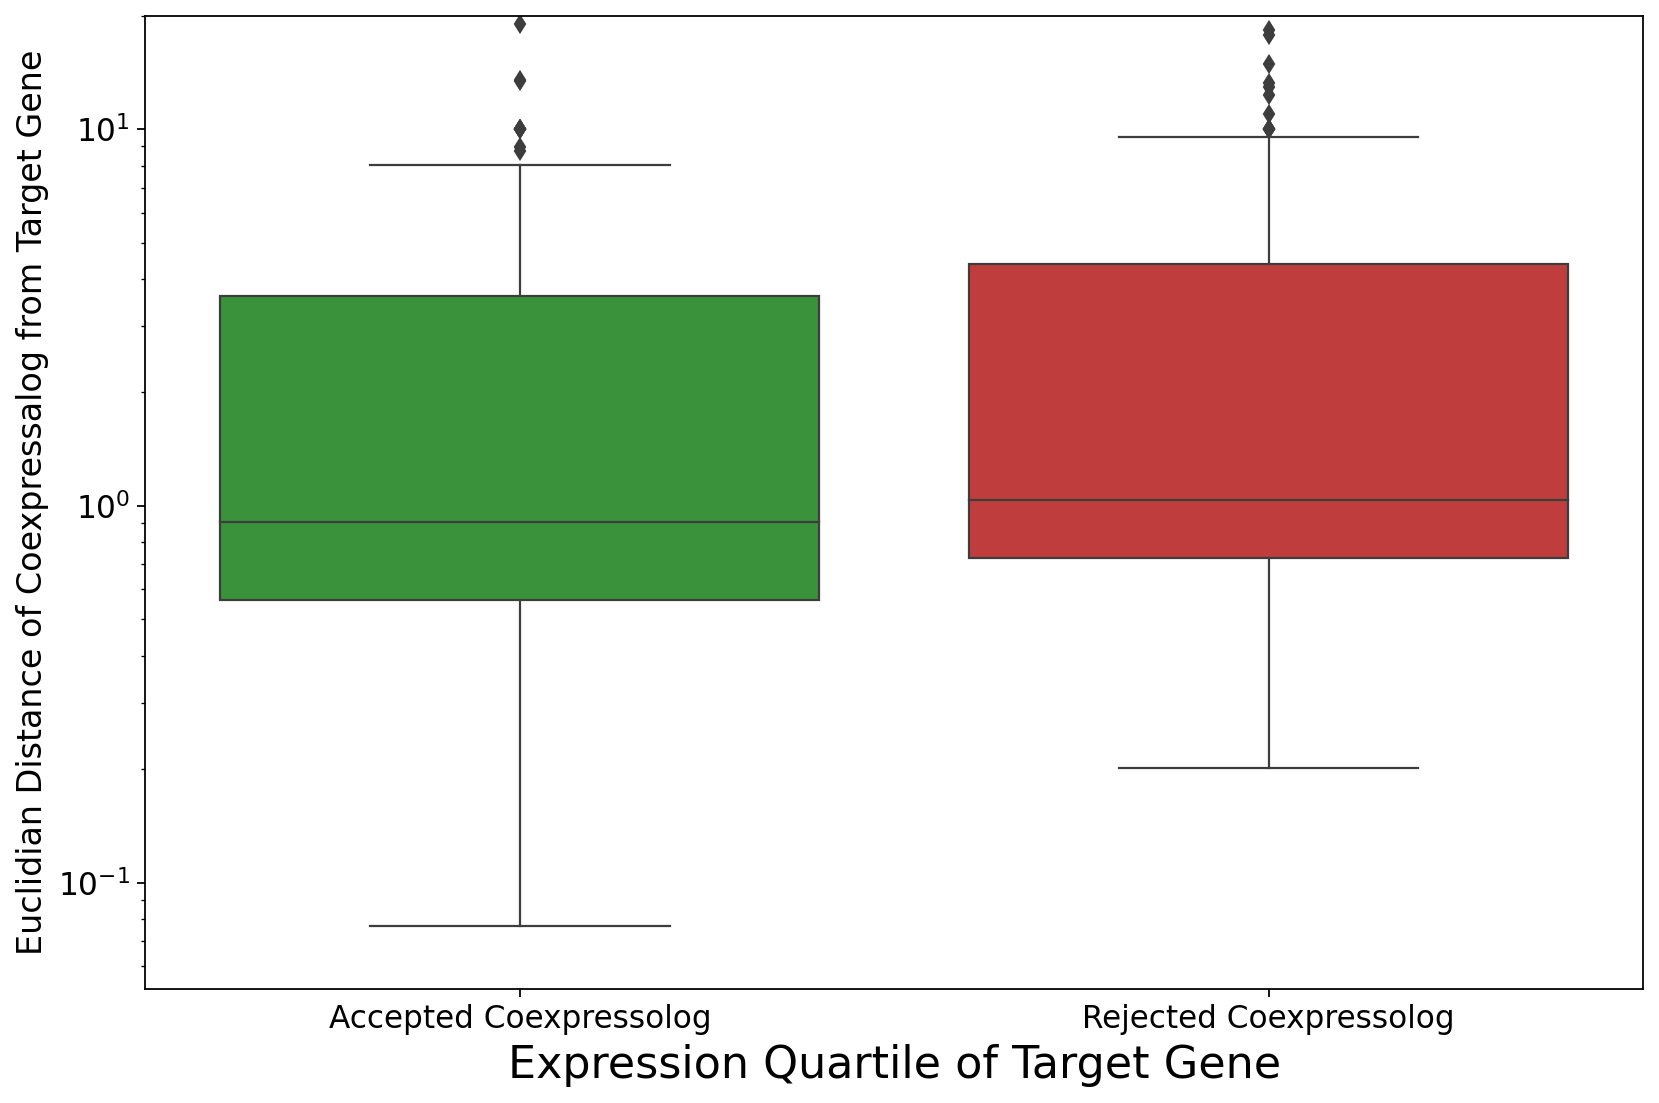

In [132]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = full_distance_plotter, x = 'Gene', y = 'Divided Expression', palette = ['tab:green','tab:red'], linewidth= 1)
plt.ylabel("Euclidian Distance of Coexpressalog from Target Gene", fontsize = 15)
plt.xlabel("Expression Quartile of Target Gene", fontsize = 20)
#sns.despine()
ax.set(yscale = 'log')
plt.ylim((0,20))
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')

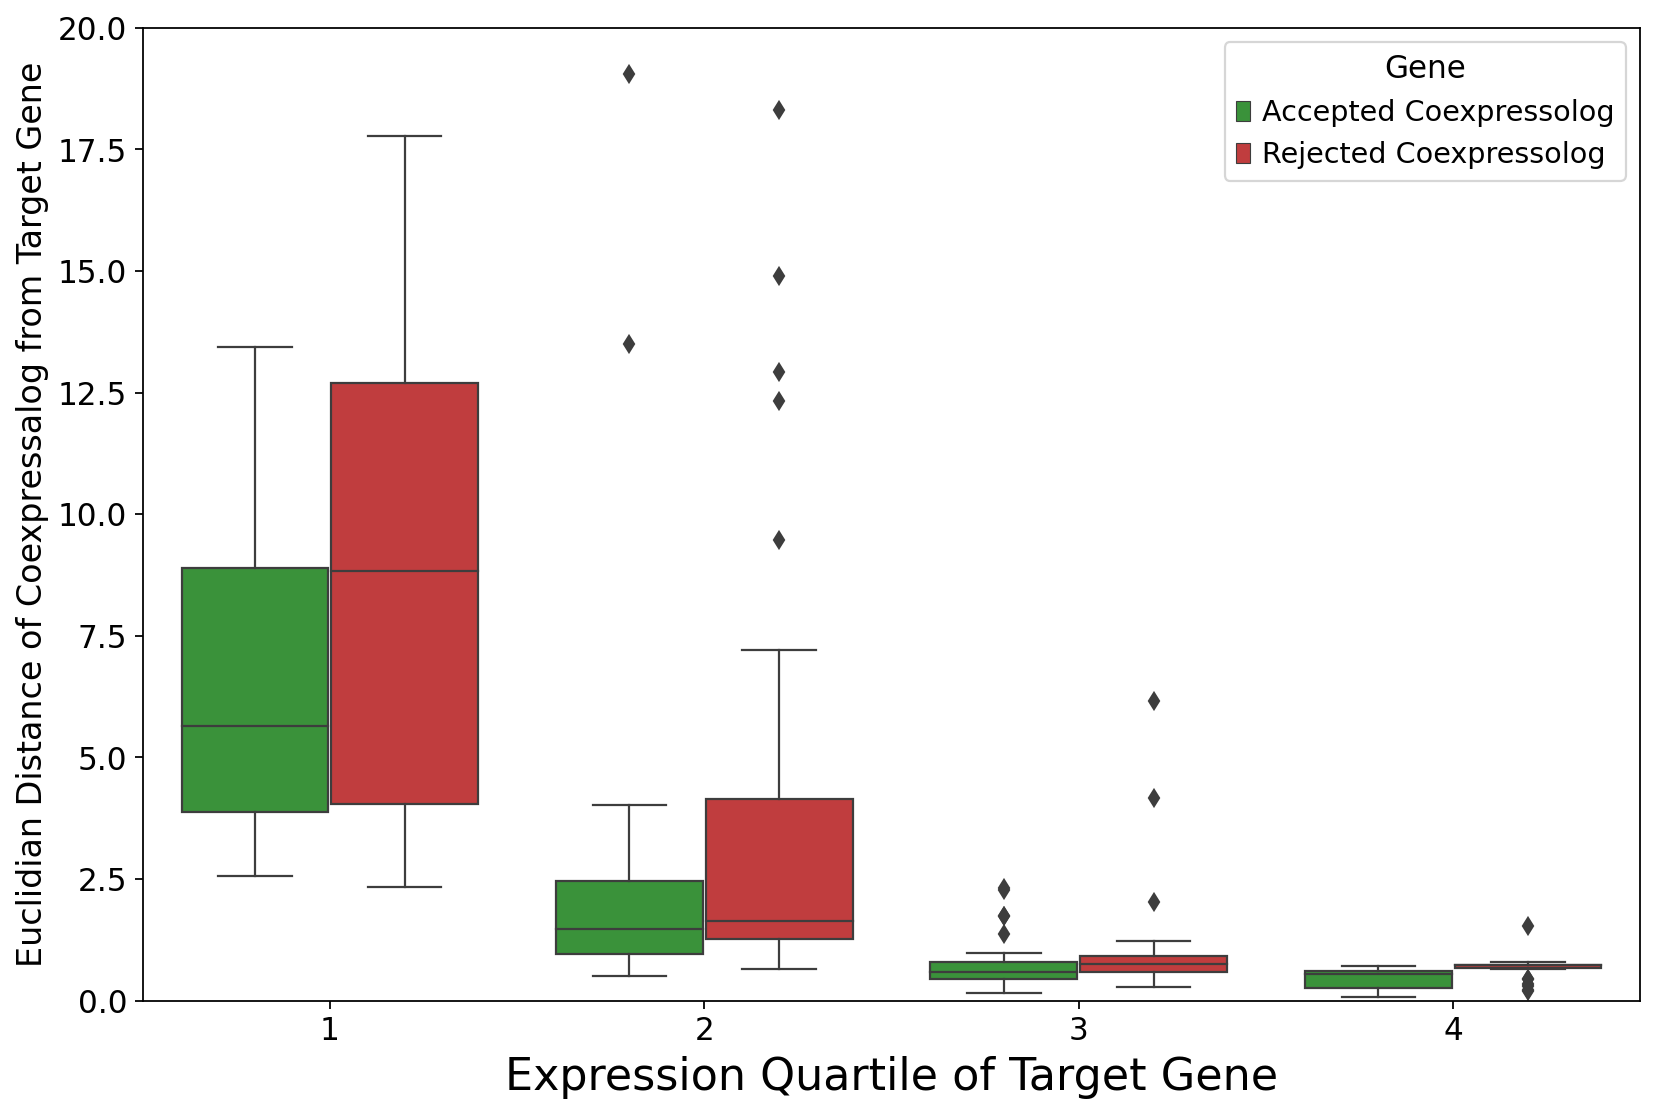

In [133]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = full_distance_plotter, x = 'Quintile', y = 'Divided Expression', hue = 'Gene', palette = ['tab:green','tab:red'], linewidth= 1)
plt.ylabel("Euclidian Distance of Coexpressalog from Target Gene", fontsize = 15)
plt.xlabel("Expression Quartile of Target Gene", fontsize = 20)
#sns.despine()
plt.ylim((0,20))
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')

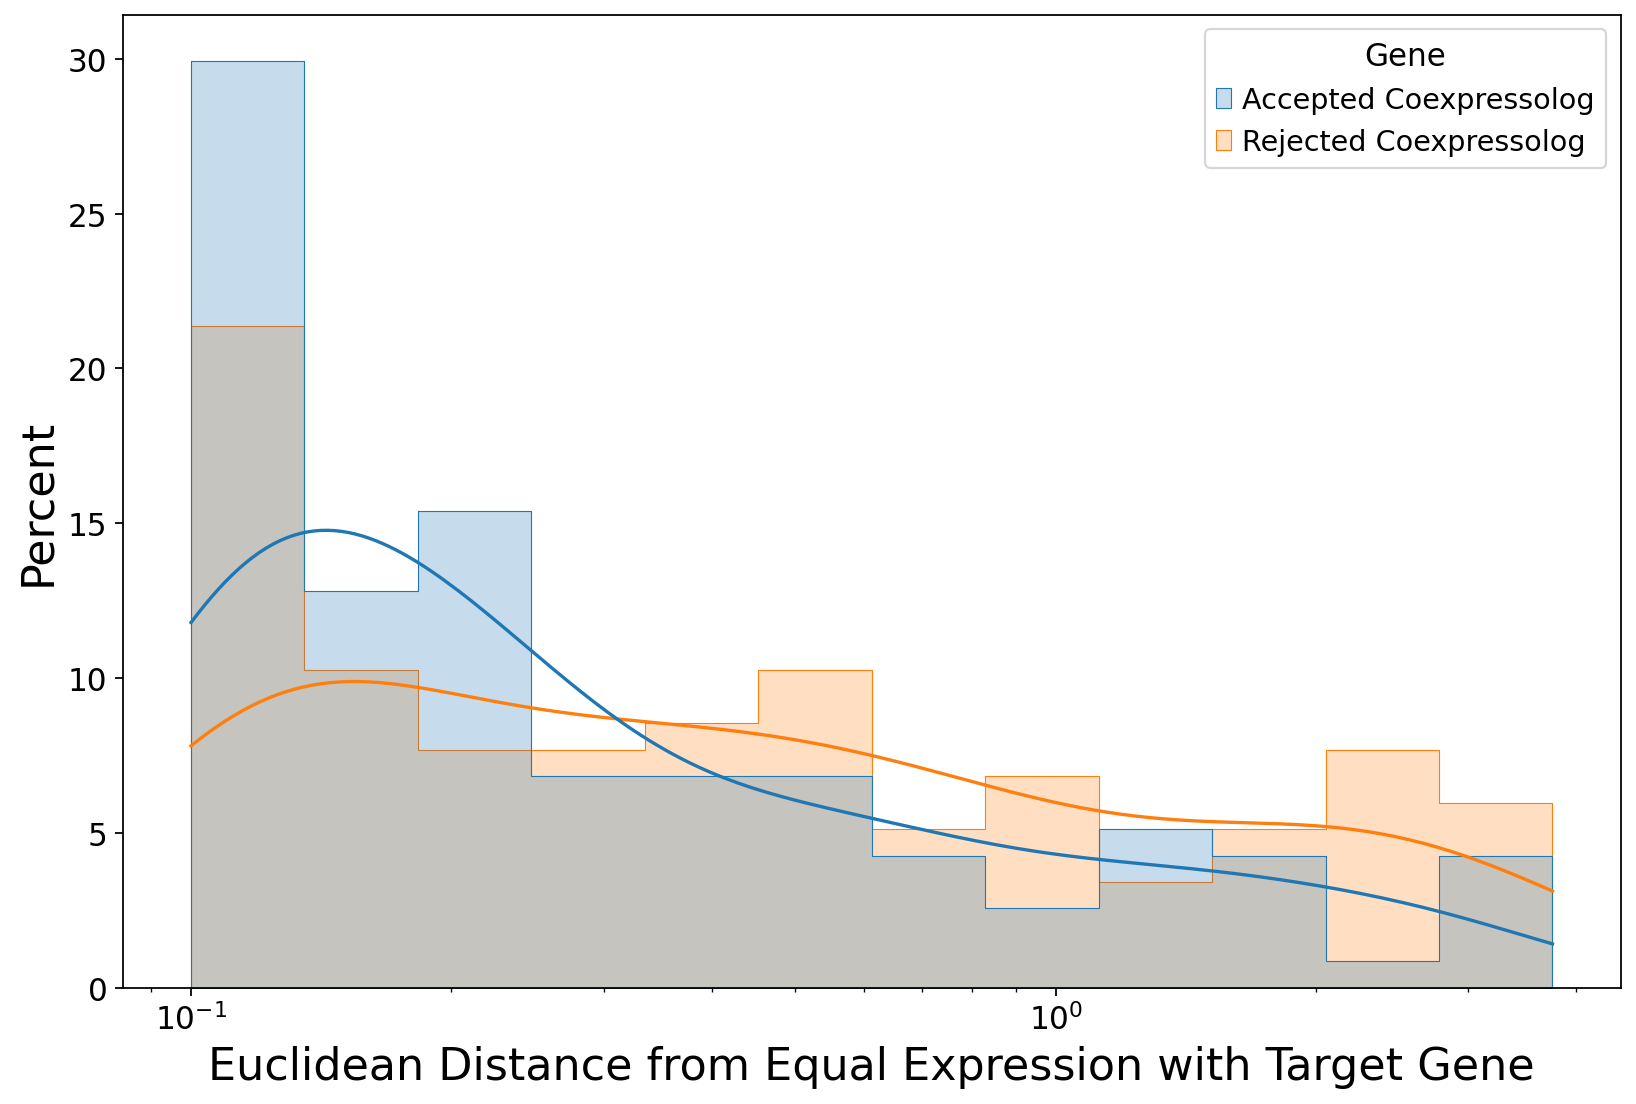

In [134]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = full_distance_plotter, x = 'Euclidian Distance From Equal Expression', hue = 'Gene', bins = 12,  element = 'step', stat = 'percent',common_norm= False,log_scale = True,  kde=True, linewidth = .5, )
plt.ylabel("Percent", fontsize = 20)
plt.xlabel("Euclidean Distance from Equal Expression with Target Gene", fontsize = 20)
#sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)
#plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/dist_of_euclidean_distance.svg')

/tmp/ipykernel_658272/1258688357.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0,3))
/tmp/ipykernel_658272/1258688357.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((0, 3))


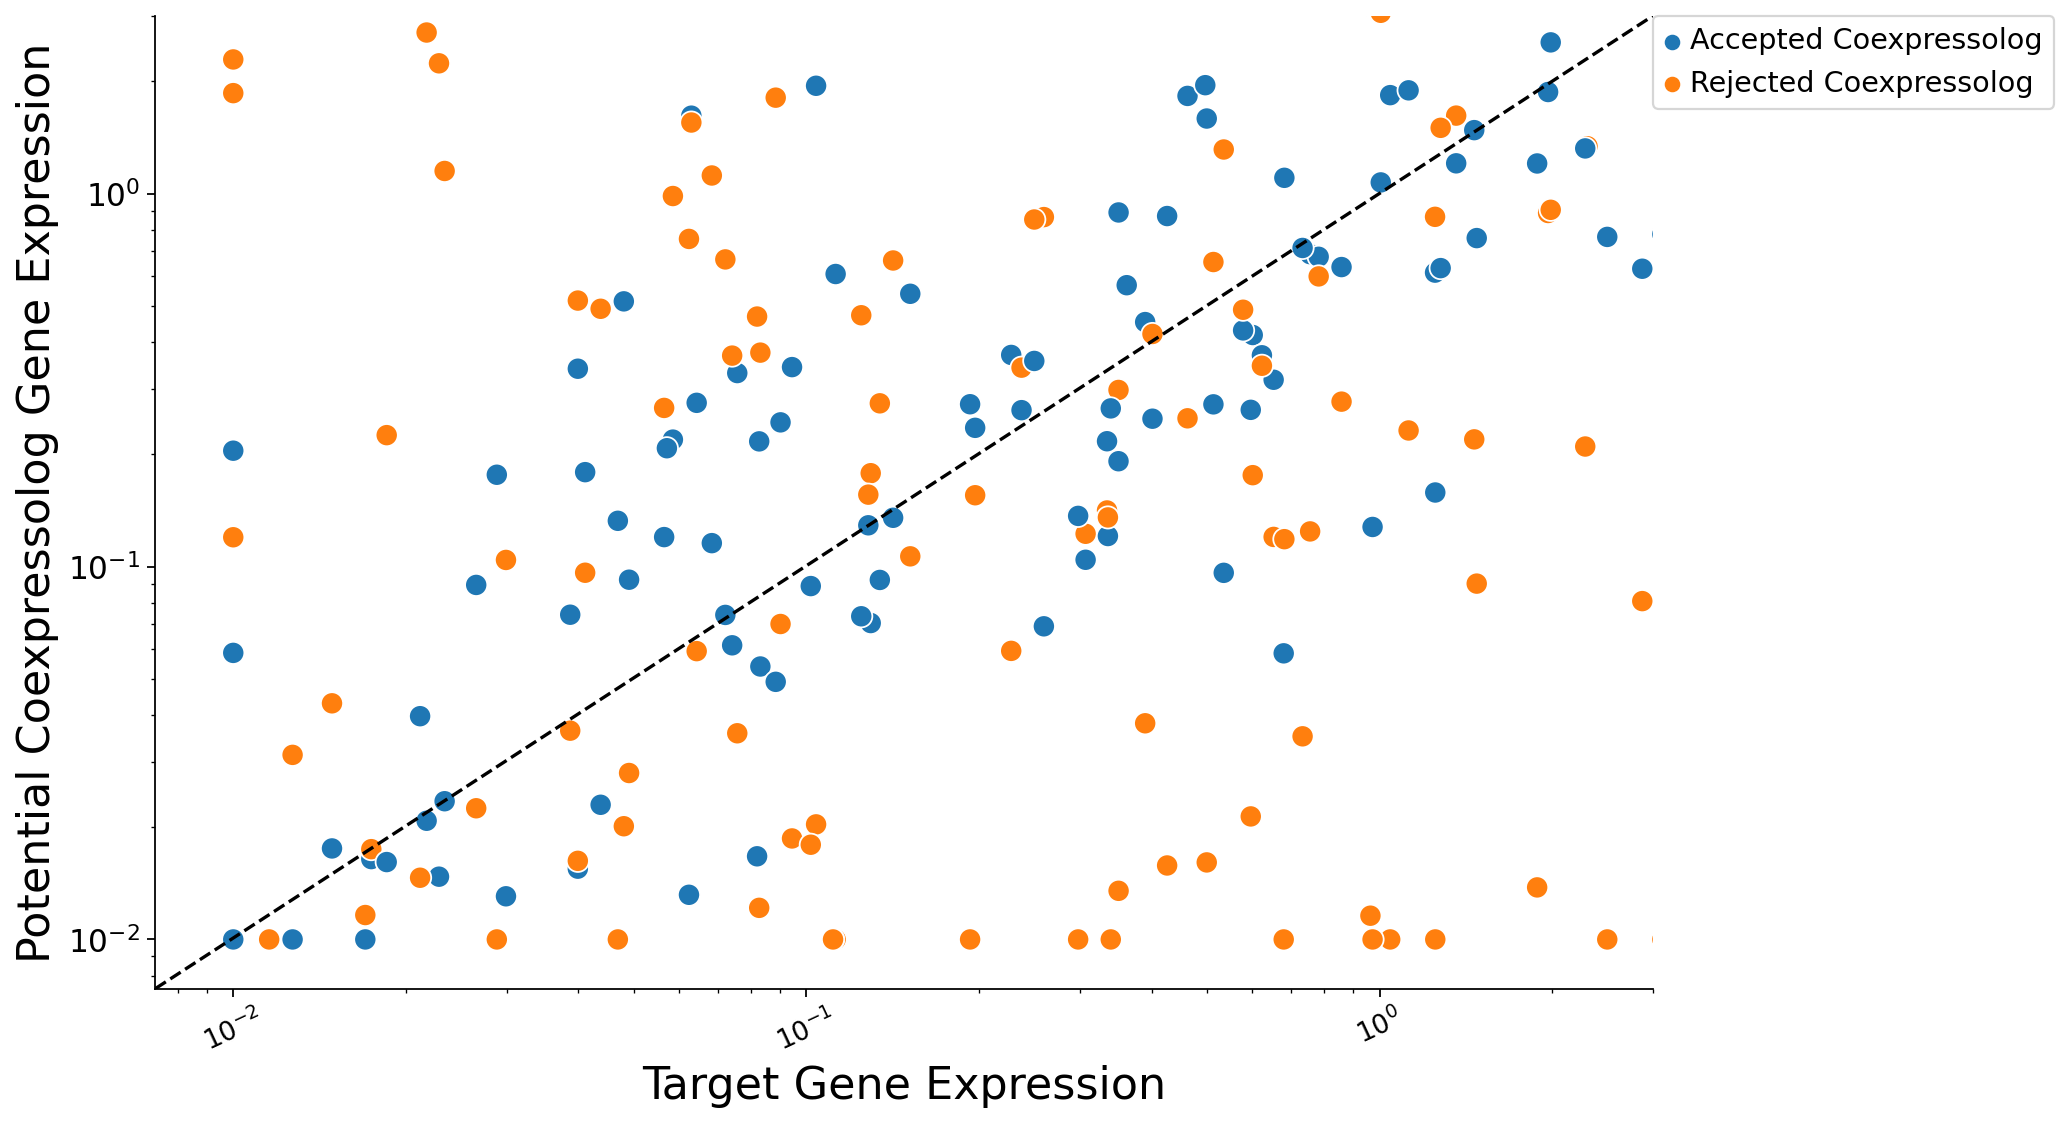

In [135]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
for key in dict_of_good_plotting_examples.keys():
    current_plotter = dict_of_good_plotting_examples[key].groupby(['Gene','Cell Type']).mean()+.01
    sns.scatterplot(data = current_plotter, x = 'Target Gene',y = 'Expression Level',hue = 'Gene', s = 100)
plt.xlabel("Target Gene Expression", fontsize = 20)
plt.ylabel("Potential Coexpressolog Gene Expression", fontsize = 20)
sns.despine()
ax.set(xscale = 'log',yscale = 'log')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,3))
plt.ylim((0, 3))
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Accepted Coexpressolog', 'Rejected Coexpressolog'], bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0,)
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)
ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)

/tmp/ipykernel_658272/1287258657.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0,3))
/tmp/ipykernel_658272/1287258657.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((0, 3))


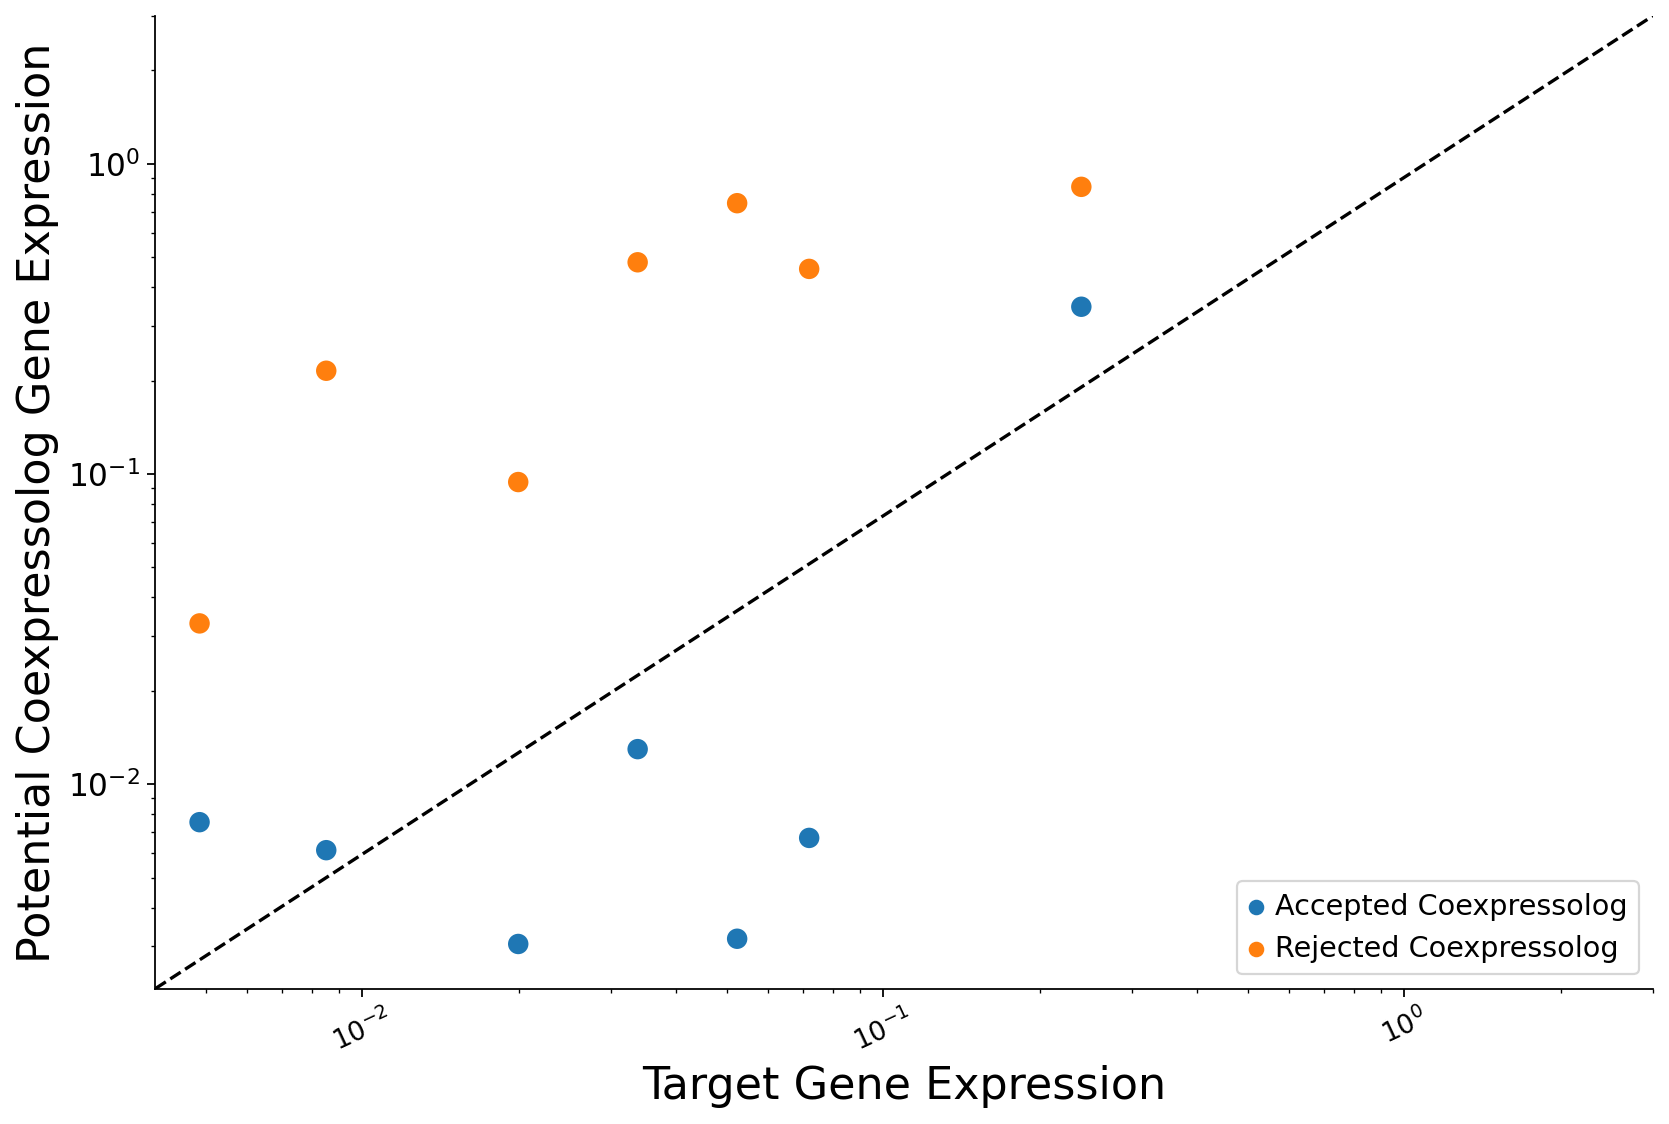

In [136]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
sns.scatterplot(data = total_gene_df.groupby(['Gene','Cell Type']).mean(), x = 'Target Gene',y = 'Expression Level',hue = 'Gene', s = 100)
plt.xlabel("Target Gene Expression", fontsize = 20)
plt.ylabel("Potential Coexpressolog Gene Expression", fontsize = 20)
sns.despine()
ax.set(xscale = 'log',yscale = 'log')
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,3))
plt.ylim((0, 3))
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Accepted Coexpressolog', 'Rejected Coexpressolog'], loc='lower right')
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12, rotation = 25)
#plt.yticks(fontsize = 11)
ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)

In [137]:
bar_plot_df = pd.DataFrame(data = list_of_values_for_line_plot, columns = ['Gene','Expression Level','Cell Type'])
bar_plot_df

Empty DataFrame
Columns: [Gene, Expression Level, Cell Type]
Index: []

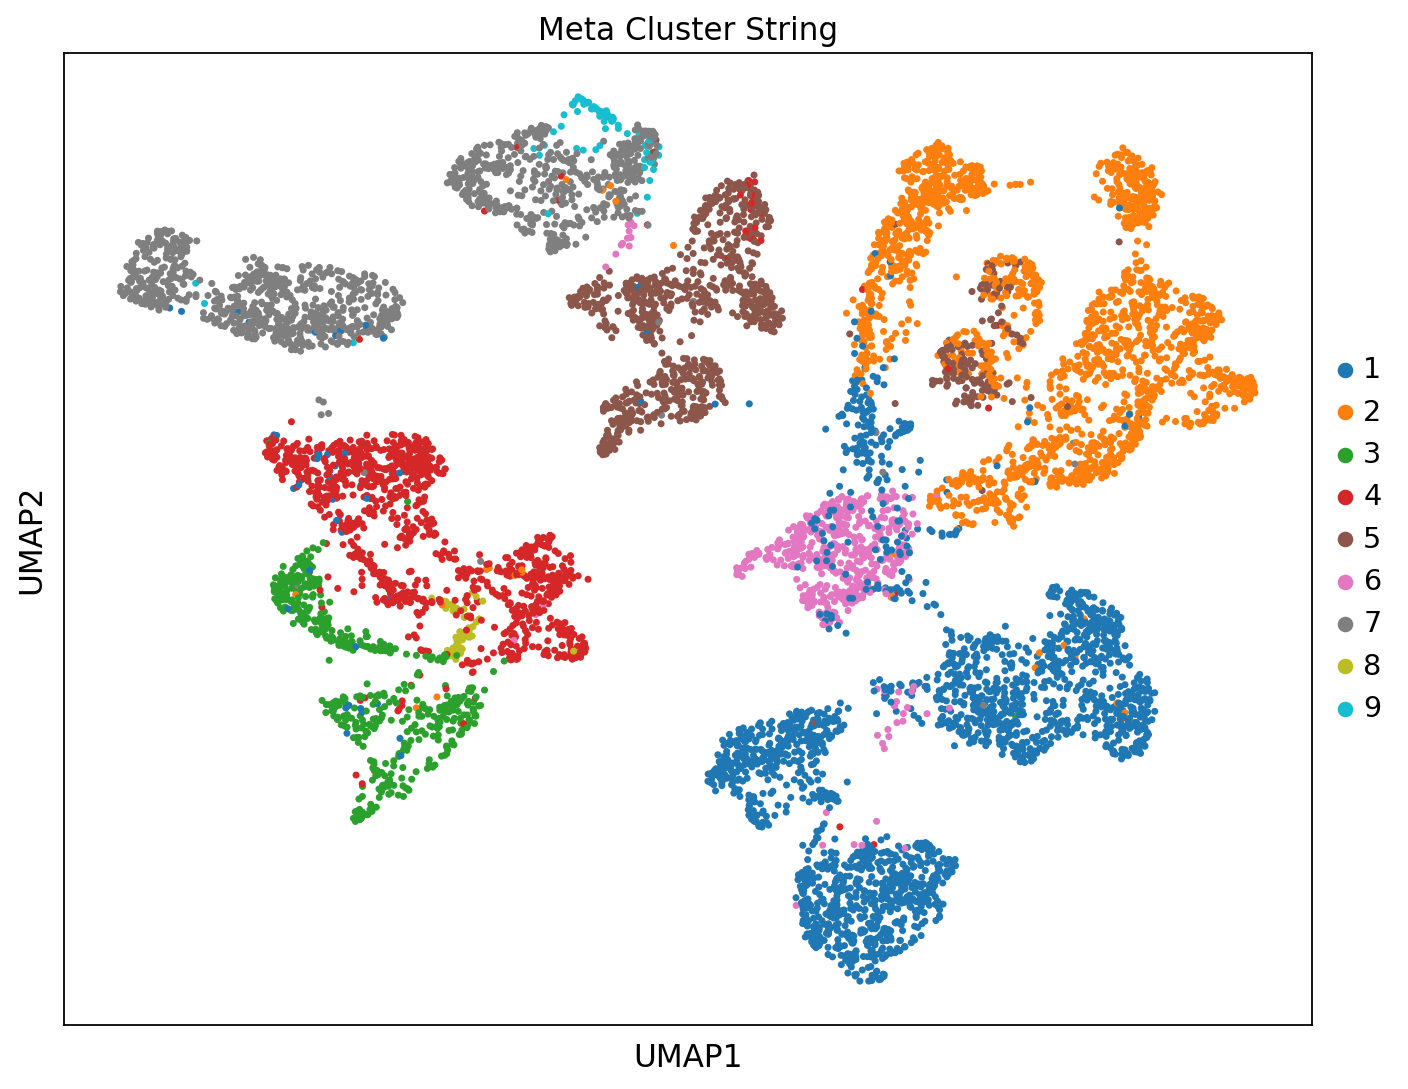

In [138]:
sc.pl.umap(alpha_half_of_cells, color= 'Meta Cluster String', s = 40, palette = 'tab10')

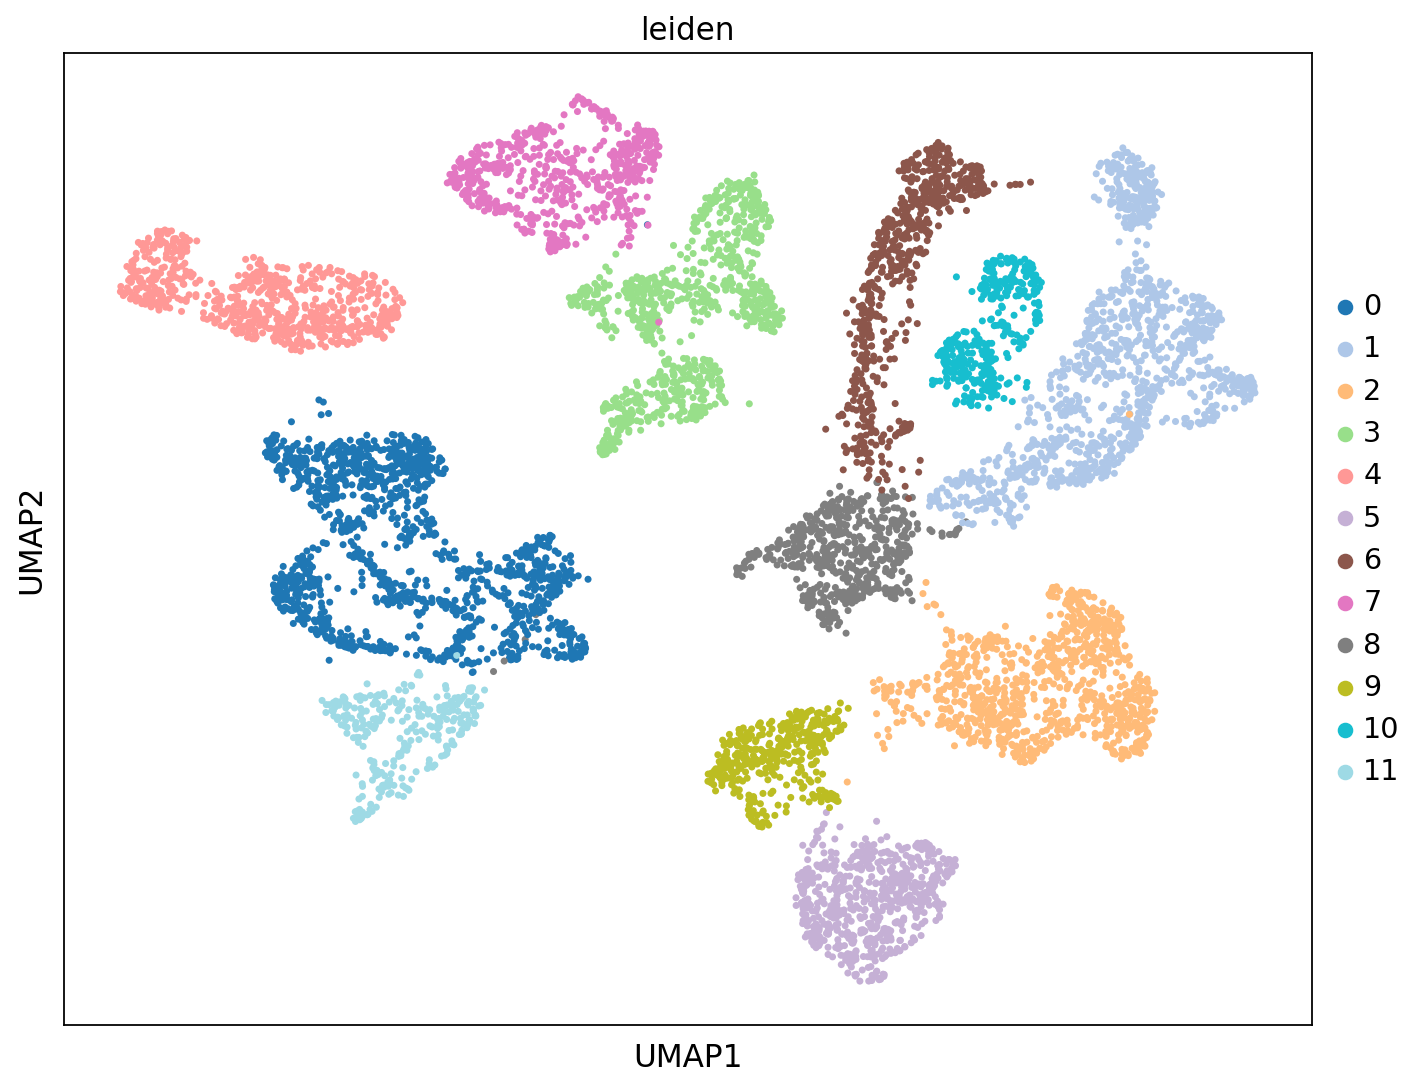

In [139]:
sc.tl.leiden(alpha_half_of_cells, random_state= 112, resolution=.1)

sc.pl.umap(alpha_half_of_cells, color= 'leiden', s = 40, palette = 'tab20')

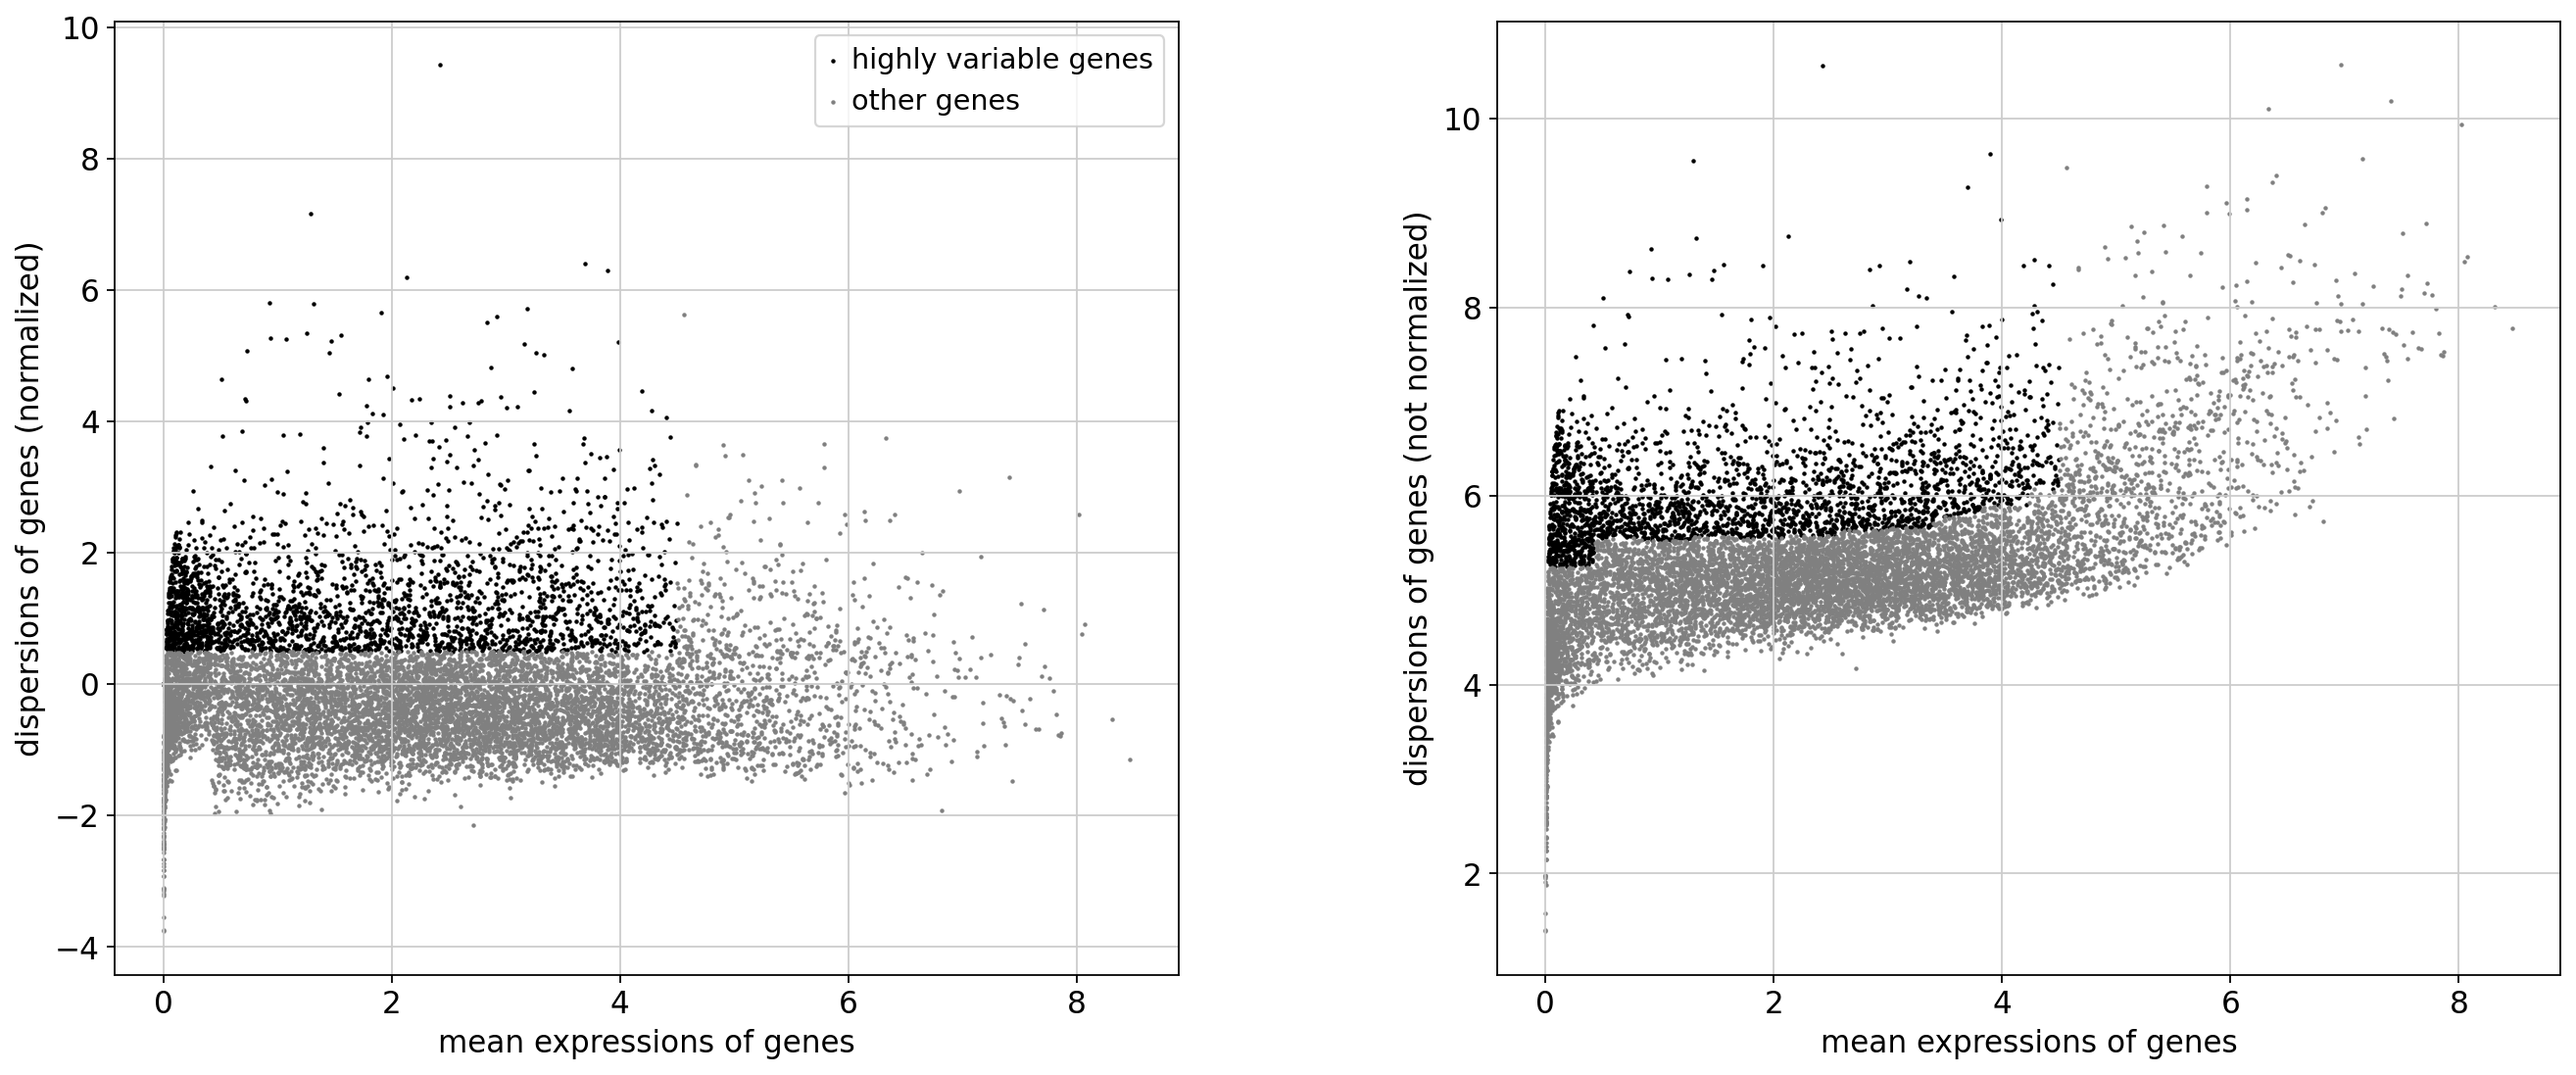

In [140]:
sc.pp.highly_variable_genes(beta_half_of_cells, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

sc.pl.highly_variable_genes(beta_half_of_cells)

In [141]:
sc.tl.pca(beta_half_of_cells, svd_solver='arpack', random_state= 303)
sc.pp.neighbors(beta_half_of_cells, n_neighbors=10, n_pcs=50, random_state= 32)
sc.tl.umap(beta_half_of_cells, random_state= 398)

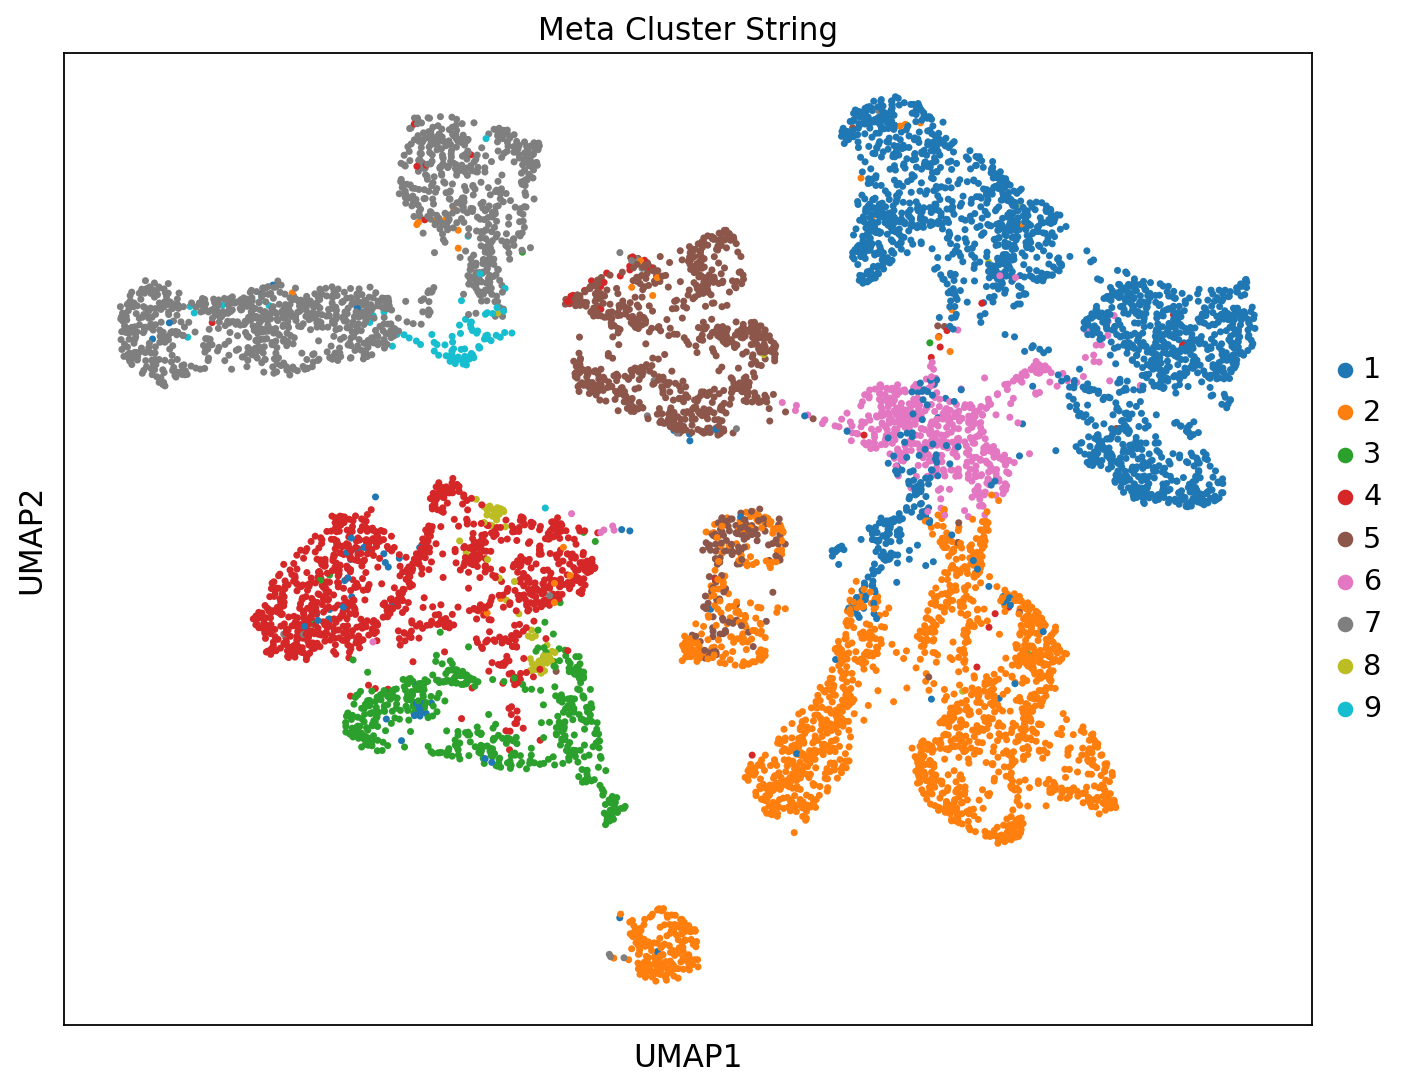

In [142]:
sc.pl.umap(beta_half_of_cells, color= 'Meta Cluster String', s = 40, palette = 'tab10')

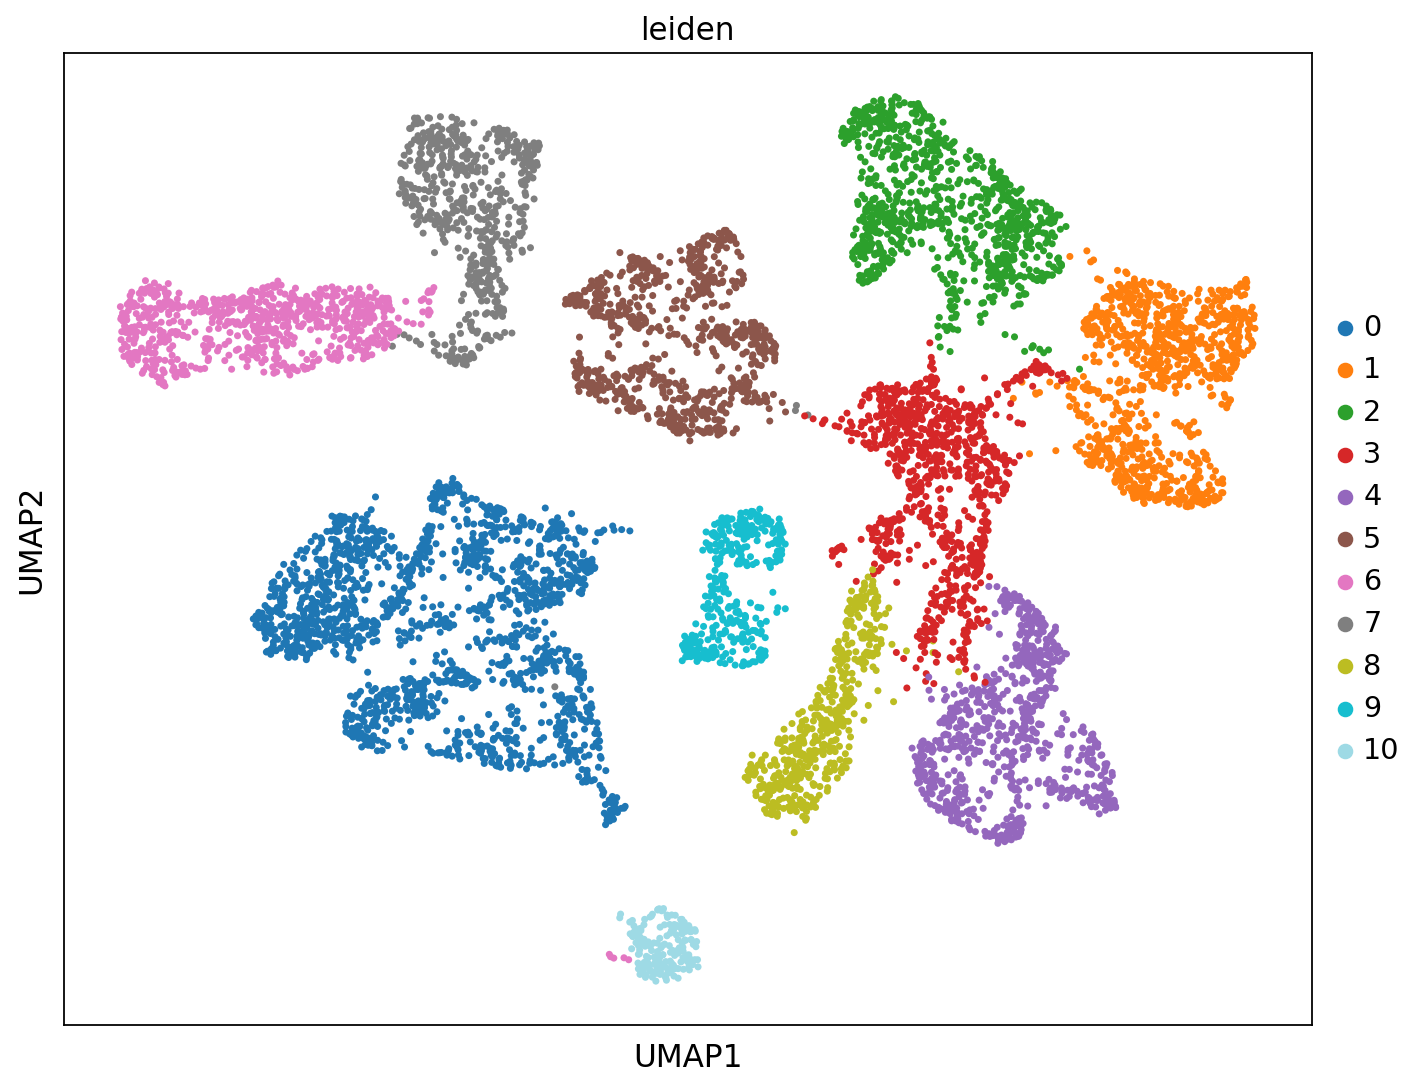

In [143]:
sc.tl.leiden(beta_half_of_cells, resolution= .1, random_state= 404 )

sc.pl.umap(beta_half_of_cells, color= 'leiden', s = 40, palette= 'tab20')

In [144]:
true_pair_dataframe

Alpha Gene  Beta Gene
0    AT2G16700  AT4G34970
1    AT4G02500  AT3G62720
2    AT5G42880  AT2G26570
3    AT5G16130  AT3G02560
4    AT5G54490  AT2G46600
..         ...        ...
886  AT5G47220  AT4G17500
887  AT5G01050  AT5G01040
888  AT3G57550  AT2G41880
889  AT5G48940  AT3G24240
890  AT3G14080  AT1G19120

[891 rows x 2 columns]

In [103]:
list_of_duplicates = pd.read_csv('/data/passala/Generated_Tables/arabidopsis_gene_duplicate_list.csv')

In [104]:
list_of_duplicates.drop_duplicates(subset = ['Duplicate 1','Duplicate 2'], inplace= True)

In [105]:
analysis_of_duplications = true_pair_dataframe.copy()
analysis_of_duplications

Alpha Gene  Beta Gene
0     AT2G15730  AT3G50620
1     AT1G04030  AT5G44040
2     AT4G02500  AT3G62720
3     AT1G14210  AT1G26820
4     AT5G18980  AT3G06210
...         ...        ...
1887  AT1G32220  AT5G15910
1888  AT1G68140  AT4G08460
1889  AT1G30190  AT2G34610
1890  AT4G10170  AT1G33475
1891  AT1G36730  AT1G77840

[1892 rows x 2 columns]

In [106]:
analysis_of_duplications = analysis_of_duplications.merge(how = 'left', right = list_of_duplicates, left_on=['Alpha Gene','Beta Gene'], right_on= ['Duplicate 1','Duplicate 2'])

In [107]:
analysis_of_duplications['Mode'].value_counts()

WGD           378
transposed     86
local          52
Name: Mode, dtype: int64

In [108]:
analysis_of_duplications = analysis_of_duplications.merge(how = 'left', right = list_of_duplicates, left_on=['Alpha Gene','Beta Gene'], right_on= ['Duplicate 2','Duplicate 1'])


In [109]:
analysis_of_duplications

Alpha Gene  Beta Gene Duplicate 1_x Duplicate 2_x Mode_x Subtype_x  \
0     AT2G15730  AT3G50620           NaN           NaN    NaN       NaN   
1     AT1G04030  AT5G44040     AT1G04030     AT5G44040    WGD     alpha   
2     AT4G02500  AT3G62720     AT4G02500     AT3G62720    WGD      beta   
3     AT1G14210  AT1G26820     AT1G14210     AT1G26820    WGD      beta   
4     AT5G18980  AT3G06210           NaN           NaN    NaN       NaN   
...         ...        ...           ...           ...    ...       ...   
1887  AT1G32220  AT5G15910           NaN           NaN    NaN       NaN   
1888  AT1G68140  AT4G08460           NaN           NaN    NaN       NaN   
1889  AT1G30190  AT2G34610     AT1G30190     AT2G34610    WGD     alpha   
1890  AT4G10170  AT1G33475           NaN           NaN    NaN       NaN   
1891  AT1G36730  AT1G77840           NaN           NaN    NaN       NaN   

     Duplicate 1_y Duplicate 2_y Mode_y Subtype_y  
0              NaN           NaN    NaN       NaN  
1              NaN           NaN    NaN       NaN  
2              NaN           NaN    NaN       NaN  
3              NaN           NaN    NaN       NaN  
4        AT3G06210     AT5G18980    WGD     alpha  
...            ...           ...    ...       ...  
1887           NaN           NaN    NaN       NaN  
1888           NaN           NaN    NaN       NaN  
1889           NaN           NaN    NaN       NaN  
1890           NaN           NaN    NaN       NaN  
1891           NaN           NaN    NaN       NaN  

[1892 rows x 10 columns]

In [110]:
analysis_of_duplications['Duplication Type'] ='None'
analysis_of_duplications['Duplication Type'].loc[(analysis_of_duplications['Mode_x'] == 'WGD')| (analysis_of_duplications['Mode_y'] == 'WGD')] = 'WGD'
analysis_of_duplications['Duplication Type'].loc[(analysis_of_duplications['Mode_x'] == 'transposed')| (analysis_of_duplications['Mode_y'] == 'transposed')] = 'Transposed'
analysis_of_duplications['Duplication Type'].loc[(analysis_of_duplications['Mode_x'] == 'local')| (analysis_of_duplications['Mode_y'] == 'local')] = 'Local'
analysis_of_duplications



Alpha Gene  Beta Gene Duplicate 1_x Duplicate 2_x Mode_x Subtype_x  \
0     AT2G15730  AT3G50620           NaN           NaN    NaN       NaN   
1     AT1G04030  AT5G44040     AT1G04030     AT5G44040    WGD     alpha   
2     AT4G02500  AT3G62720     AT4G02500     AT3G62720    WGD      beta   
3     AT1G14210  AT1G26820     AT1G14210     AT1G26820    WGD      beta   
4     AT5G18980  AT3G06210           NaN           NaN    NaN       NaN   
...         ...        ...           ...           ...    ...       ...   
1887  AT1G32220  AT5G15910           NaN           NaN    NaN       NaN   
1888  AT1G68140  AT4G08460           NaN           NaN    NaN       NaN   
1889  AT1G30190  AT2G34610     AT1G30190     AT2G34610    WGD     alpha   
1890  AT4G10170  AT1G33475           NaN           NaN    NaN       NaN   
1891  AT1G36730  AT1G77840           NaN           NaN    NaN       NaN   

     Duplicate 1_y Duplicate 2_y Mode_y Subtype_y Duplication Type  
0              NaN           NaN    NaN       NaN             None  
1              NaN           NaN    NaN       NaN              WGD  
2              NaN           NaN    NaN       NaN              WGD  
3              NaN           NaN    NaN       NaN              WGD  
4        AT3G06210     AT5G18980    WGD     alpha              WGD  
...            ...           ...    ...       ...              ...  
1887           NaN           NaN    NaN       NaN             None  
1888           NaN           NaN    NaN       NaN             None  
1889           NaN           NaN    NaN       NaN              WGD  
1890           NaN           NaN    NaN       NaN             None  
1891           NaN           NaN    NaN       NaN             None  

[1892 rows x 11 columns]

In [111]:
analysis_of_duplications['Subtype_x'].value_counts()


alpha         290
beta           71
16-107 Mya     55
tandem         45
<16 Mya        31
gamma          17
proximal        7
Name: Subtype_x, dtype: int64

In [112]:
analysis_of_duplications['Subtype'] ='None'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Subtype_x'] == 'alpha')| (analysis_of_duplications['Subtype_y'] == 'alpha')] = 'alpha'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Subtype_x'] == 'beta')| (analysis_of_duplications['Subtype_y'] == 'beta')] = 'beta'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Subtype_x'] == 'gamma')| (analysis_of_duplications['Subtype_y'] == 'gamma')] = 'gamma'
analysis_of_duplications

Alpha Gene  Beta Gene Duplicate 1_x Duplicate 2_x Mode_x Subtype_x  \
0     AT2G15730  AT3G50620           NaN           NaN    NaN       NaN   
1     AT1G04030  AT5G44040     AT1G04030     AT5G44040    WGD     alpha   
2     AT4G02500  AT3G62720     AT4G02500     AT3G62720    WGD      beta   
3     AT1G14210  AT1G26820     AT1G14210     AT1G26820    WGD      beta   
4     AT5G18980  AT3G06210           NaN           NaN    NaN       NaN   
...         ...        ...           ...           ...    ...       ...   
1887  AT1G32220  AT5G15910           NaN           NaN    NaN       NaN   
1888  AT1G68140  AT4G08460           NaN           NaN    NaN       NaN   
1889  AT1G30190  AT2G34610     AT1G30190     AT2G34610    WGD     alpha   
1890  AT4G10170  AT1G33475           NaN           NaN    NaN       NaN   
1891  AT1G36730  AT1G77840           NaN           NaN    NaN       NaN   

     Duplicate 1_y Duplicate 2_y Mode_y Subtype_y Duplication Type Subtype  
0              NaN           NaN    NaN       NaN             None    None  
1              NaN           NaN    NaN       NaN              WGD   alpha  
2              NaN           NaN    NaN       NaN              WGD    beta  
3              NaN           NaN    NaN       NaN              WGD    beta  
4        AT3G06210     AT5G18980    WGD     alpha              WGD   alpha  
...            ...           ...    ...       ...              ...     ...  
1887           NaN           NaN    NaN       NaN             None    None  
1888           NaN           NaN    NaN       NaN             None    None  
1889           NaN           NaN    NaN       NaN              WGD   alpha  
1890           NaN           NaN    NaN       NaN             None    None  
1891           NaN           NaN    NaN       NaN             None    None  

[1892 rows x 12 columns]

In [113]:
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Mode_x'] == 'transposed')| (analysis_of_duplications['Mode_y'] == 'transposed')] = 'Transposed'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Mode_x'] == 'local')| (analysis_of_duplications['Mode_y'] == 'local')] = 'Local'



In [114]:
analysis_of_duplications= analysis_of_duplications[['Alpha Gene','Beta Gene','Duplication Type','Subtype']]
analysis_of_duplications

Alpha Gene  Beta Gene Duplication Type Subtype
0     AT2G15730  AT3G50620             None    None
1     AT1G04030  AT5G44040              WGD   alpha
2     AT4G02500  AT3G62720              WGD    beta
3     AT1G14210  AT1G26820              WGD    beta
4     AT5G18980  AT3G06210              WGD   alpha
...         ...        ...              ...     ...
1887  AT1G32220  AT5G15910             None    None
1888  AT1G68140  AT4G08460             None    None
1889  AT1G30190  AT2G34610              WGD   alpha
1890  AT4G10170  AT1G33475             None    None
1891  AT1G36730  AT1G77840             None    None

[1892 rows x 4 columns]

Text(0.5, 1.0, 'Breakdown of the ~1900 Gene Pairs Used to realign the Single Cell Data')

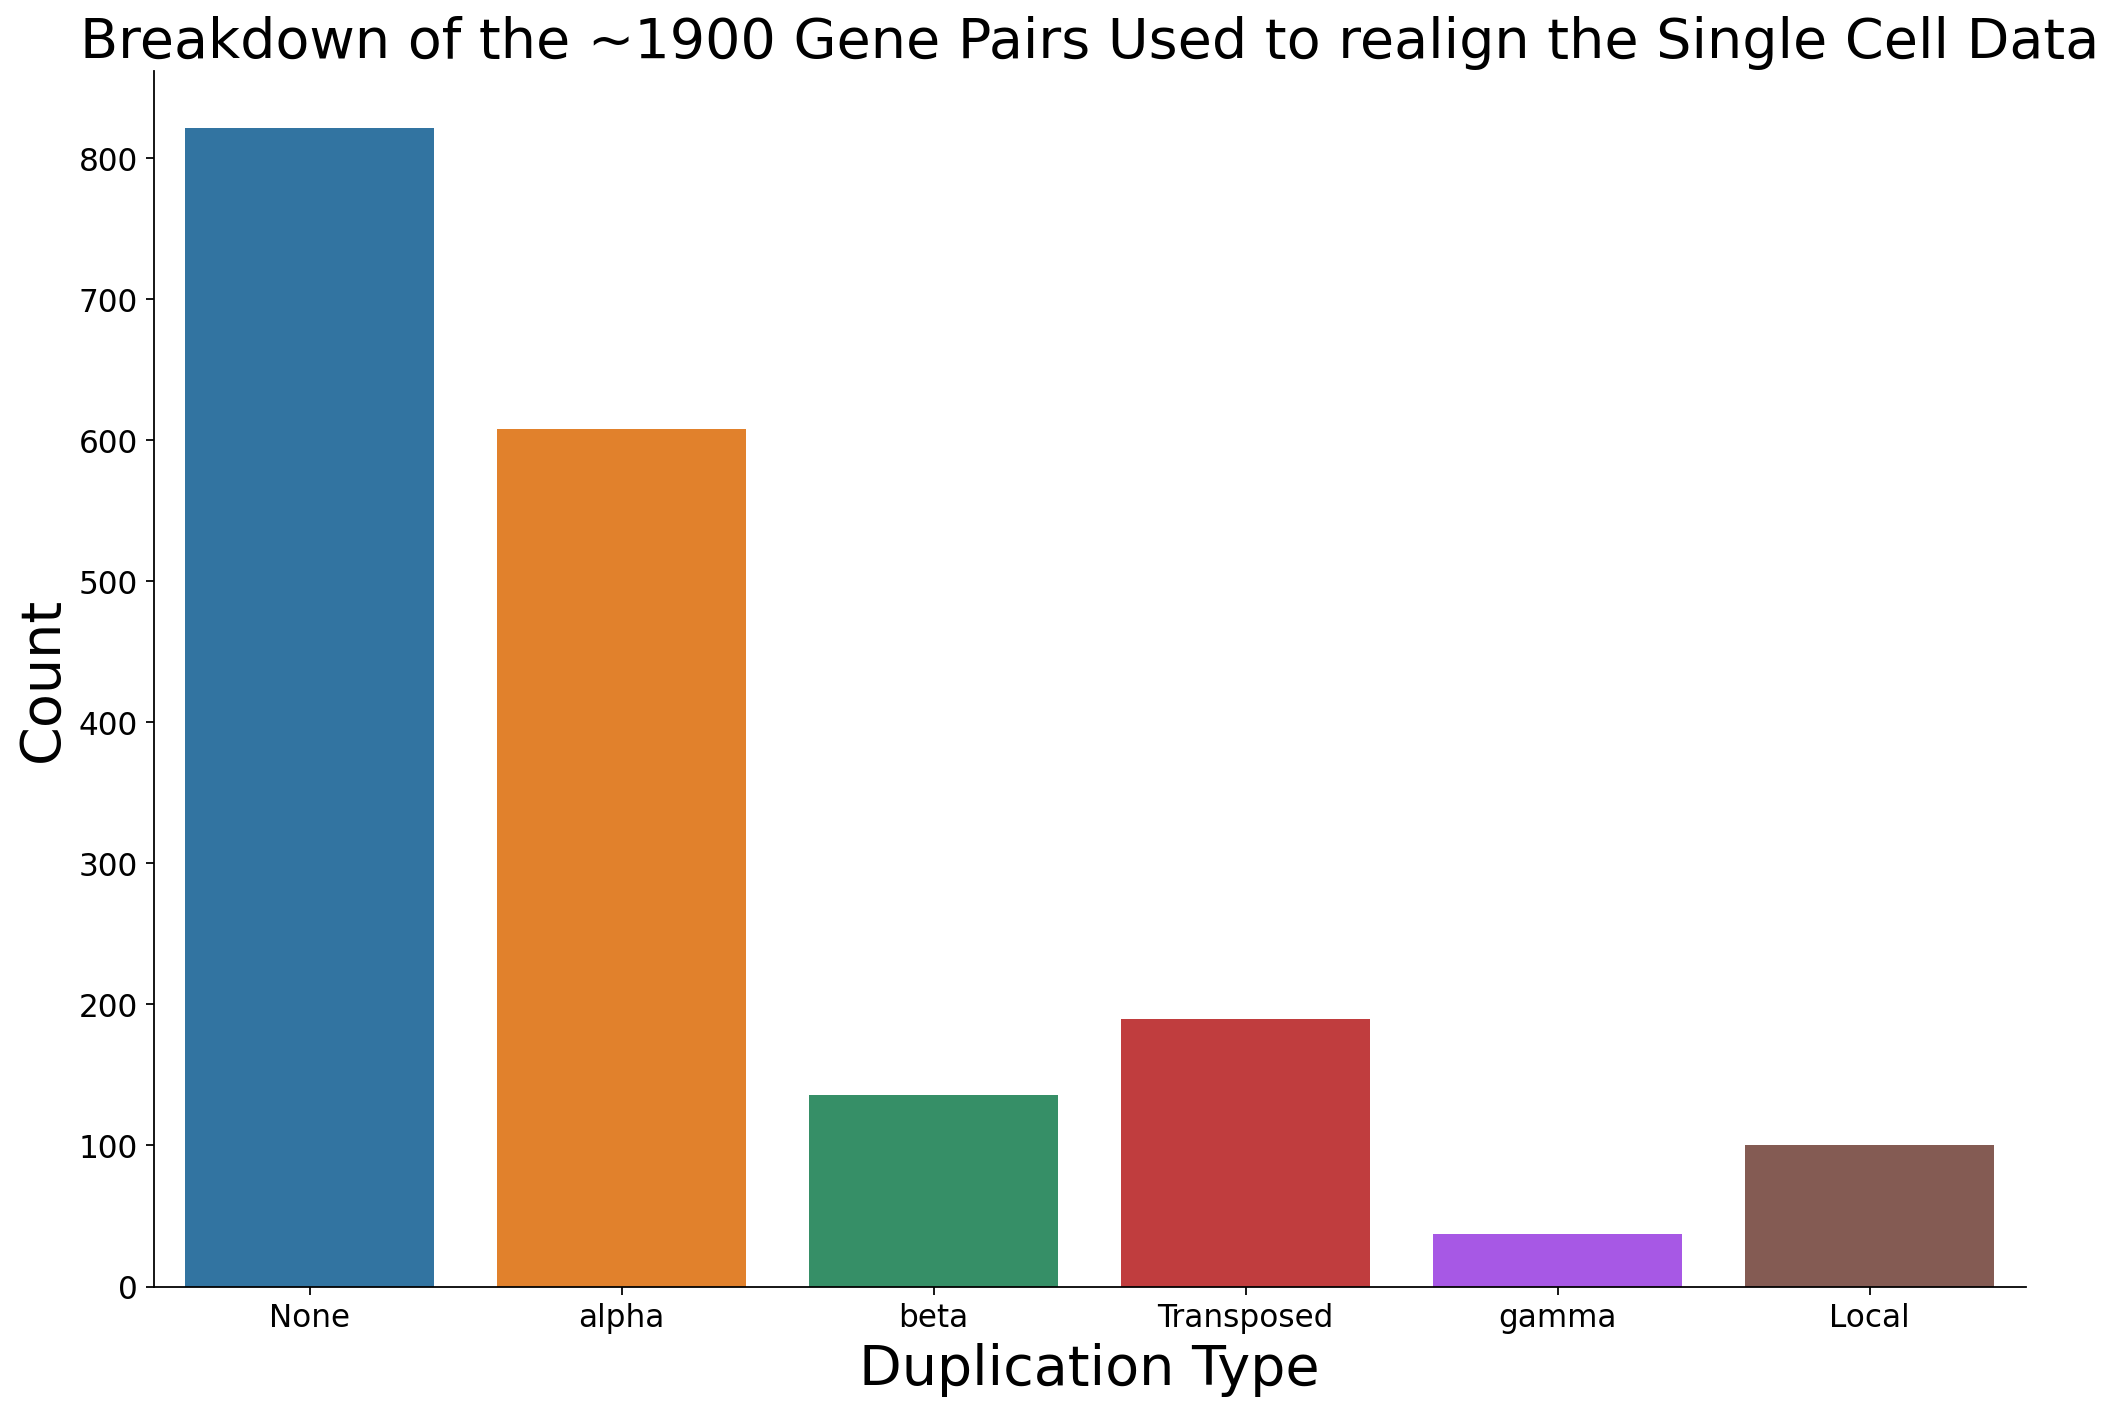

In [115]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.countplot(data = analysis_of_duplications,x = 'Subtype', dodge= False)

fig.patch.set_facecolor('white')

sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
#plt.ylim(.3,1)
plt.xlabel("Duplication Type", fontsize = 25)
plt.ylabel("Count", fontsize = 25)


plt.title("Breakdown of the ~1900 Gene Pairs Used to realign the Single Cell Data", fontsize = 25)
#plt.xticks(fontsize = 15, rotation = 30)
#plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)


In [145]:
alpha_half_of_cells.var['Alpha Gene'] = alpha_half_of_cells.var_names
beta_half_of_cells.var['Beta Gene'] = beta_half_of_cells.var_names
#alpha_half_of_cells.var = alpha_half_of_cells.var.merge(how = 'left', on= 'Alpha Gene', right = true_pair_dataframe)


In [146]:
beta_half_of_cells

AnnData object with n_obs × n_vars = 8317 × 11135
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster', 'Meta Cluster String', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Beta Gene'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'Meta Cluster String_colors', 'leiden', 'leiden_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [147]:
temp_var_df = alpha_half_of_cells.var.merge(how = 'left', on= 'Alpha Gene', right = true_pair_dataframe)
temp_var_df = temp_var_df.set_index('Alpha Gene', drop = False)
alpha_half_of_cells.var = temp_var_df

In [148]:
temp_var_df = beta_half_of_cells.var.merge(how = 'left', on= 'Beta Gene', right = true_pair_dataframe)
temp_var_df = temp_var_df.set_index('Beta Gene', drop = False)
beta_half_of_cells.var = temp_var_df

In [149]:
beta_half_of_cells.var.sort_values(by = 'Alpha Gene')

highly_variable     means  dispersions  dispersions_norm  \
Beta Gene                                                             
AT2G46860             True  3.166775     6.261294          1.602457   
AT3G61880             True  1.999136     6.163799          1.586794   
AT2G46510            False  4.391704     5.739597          0.000097   
AT4G01070            False  5.656180     6.890492          0.617941   
AT4G01080             True  0.224550     5.321583          0.576133   
...                    ...       ...          ...               ...   
ATCG01070             True  1.015029     6.084265          1.452468   
ATCG01110             True  1.120116     5.799622          0.962350   
ATCG01120             True  1.645177     6.140377          1.432604   
ATCG01230            False  0.021591     5.201372          0.443598   
ATCG01310            False  0.028494     4.566071         -0.256836   

           Beta Gene Alpha Gene  
Beta Gene                        
AT2G46860  AT2G46860  AT1G01050  
AT3G61880  AT3G61880  AT1G01190  
AT2G46510  AT2G46510  AT1G01260  
AT4G01070  AT4G01070  AT1G01390  
AT4G01080  AT4G01080  AT1G01430  
...              ...        ...  
ATCG01070  ATCG01070        NaN  
ATCG01110  ATCG01110        NaN  
ATCG01120  ATCG01120        NaN  
ATCG01230  ATCG01230        NaN  
ATCG01310  ATCG01310        NaN  

[11135 rows x 6 columns]

In [150]:
alpha_half_of_cells.var.sort_values(by = 'Beta Gene')

highly_variable     means  dispersions  dispersions_norm  \
Alpha Gene                                                             
AT4G00360              True  3.292374     6.372579          1.773496   
AT4G00400              True  2.513120     5.968630          1.086585   
AT4G00680             False  5.685984     8.240157          2.019922   
AT2G45740             False  1.686669     5.438408          0.251713   
AT5G05000             False  2.934659     4.840079         -0.857812   
...                     ...       ...          ...               ...   
ATCG01060             False  0.012398     3.697553         -1.238713   
ATCG01080              True  0.560692     6.680872          2.211752   
ATCG01090              True  1.633525     6.156569          1.407445   
ATCG01100              True  1.753734     6.572712          2.062334   
ATCG01130             False  4.959554     7.422272          1.991017   

           Alpha Gene  Beta Gene  
Alpha Gene                        
AT4G00360   AT4G00360  AT1G01600  
AT4G00400   AT4G00400  AT1G01610  
AT4G00680   AT4G00680  AT1G01750  
AT2G45740   AT2G45740  AT1G01820  
AT5G05000   AT5G05000  AT1G02280  
...               ...        ...  
ATCG01060   ATCG01060        NaN  
ATCG01080   ATCG01080        NaN  
ATCG01090   ATCG01090        NaN  
ATCG01100   ATCG01100        NaN  
ATCG01130   ATCG01130        NaN  

[11136 rows x 6 columns]

In [151]:
alpha_half_of_cells.var.loc[~alpha_half_of_cells.var['Beta Gene'].isnull()].index.to_list()

['AT1G01050',
 'AT1G01190',
 'AT1G01260',
 'AT1G01390',
 'AT1G01430',
 'AT1G01720',
 'AT1G01950',
 'AT1G01960',
 'AT1G02130',
 'AT1G02730',
 'AT1G03410',
 'AT1G03950',
 'AT1G03990',
 'AT1G04050',
 'AT1G04270',
 'AT1G04520',
 'AT1G04820',
 'AT1G05010',
 'AT1G05470',
 'AT1G05530',
 'AT1G05830',
 'AT1G06150',
 'AT1G07090',
 'AT1G07140',
 'AT1G08400',
 'AT1G08420',
 'AT1G08540',
 'AT1G08860',
 'AT1G09080',
 'AT1G09100',
 'AT1G09410',
 'AT1G09690',
 'AT1G09780',
 'AT1G09930',
 'AT1G10290',
 'AT1G10430',
 'AT1G10560',
 'AT1G10570',
 'AT1G11060',
 'AT1G12630',
 'AT1G12820',
 'AT1G12920',
 'AT1G13280',
 'AT1G13980',
 'AT1G14020',
 'AT1G14230',
 'AT1G14280',
 'AT1G14580',
 'AT1G14685',
 'AT1G14870',
 'AT1G14970',
 'AT1G15210',
 'AT1G15520',
 'AT1G15550',
 'AT1G15570',
 'AT1G16010',
 'AT1G16280',
 'AT1G16460',
 'AT1G17020',
 'AT1G17040',
 'AT1G17050',
 'AT1G17290',
 'AT1G17370',
 'AT1G17455',
 'AT1G17700',
 'AT1G18260',
 'AT1G18300',
 'AT1G18330',
 'AT1G18370',
 'AT1G19150',
 'AT1G19440',
 'AT1G

In [152]:
alpha_genes_shared_between_groups = alpha_half_of_cells.var.loc[~alpha_half_of_cells.var['Beta Gene'].isnull()].index.to_list()
beta_genes_shared_between_groups = beta_half_of_cells.var.loc[~beta_half_of_cells.var['Alpha Gene'].isnull()].index.to_list()
alpha_half_of_cells_without_genes = alpha_half_of_cells.copy()
alpha_half_of_cells_without_genes = alpha_half_of_cells_without_genes[:,alpha_genes_shared_between_groups]
beta_half_of_cells_without_genes = beta_half_of_cells.copy()
beta_half_of_cells_without_genes = beta_half_of_cells_without_genes[:,beta_genes_shared_between_groups]


In [153]:
beta_half_of_cells_without_genes.var

highly_variable     means  dispersions  dispersions_norm  \
Beta Gene                                                             
AT1G01600            False  0.077224     4.084905         -0.787332   
AT1G01610             True  0.943545     5.813918          0.986966   
AT1G01750            False  5.516187     7.751650          1.713971   
AT1G01820            False  3.619971     5.144614         -0.580889   
AT1G02280            False  2.422811     4.938095         -0.650722   
...                    ...       ...          ...               ...   
AT5G67210             True  2.930952     6.295361          1.696051   
AT5G67240            False  2.359793     5.280431         -0.036469   
AT5G67300            False  5.493156     5.820876         -0.556445   
AT5G67380            False  4.178683     4.871114         -1.126039   
AT5G67580            False  3.807042     5.018172         -0.794745   

           Beta Gene Alpha Gene  
Beta Gene                        
AT1G01600  AT1G01600  AT4G00360  
AT1G01610  AT1G01610  AT4G00400  
AT1G01750  AT1G01750  AT4G00680  
AT1G01820  AT1G01820  AT2G45740  
AT1G02280  AT1G02280  AT5G05000  
...              ...        ...  
AT5G67210  AT5G67210  AT3G50220  
AT5G67240  AT5G67240  AT5G05540  
AT5G67300  AT5G67300  AT3G50060  
AT5G67380  AT5G67380  AT2G23070  
AT5G67580  AT5G67580  AT1G49950  

[891 rows x 6 columns]

In [154]:
beta_half_of_cells_without_genes.var_names = beta_half_of_cells_without_genes.var['Alpha Gene']
beta_half_of_cells_without_genes.var

highly_variable     means  dispersions  dispersions_norm  \
Alpha Gene                                                             
AT4G00360             False  0.077224     4.084905         -0.787332   
AT4G00400              True  0.943545     5.813918          0.986966   
AT4G00680             False  5.516187     7.751650          1.713971   
AT2G45740             False  3.619971     5.144614         -0.580889   
AT5G05000             False  2.422811     4.938095         -0.650722   
...                     ...       ...          ...               ...   
AT3G50220              True  2.930952     6.295361          1.696051   
AT5G05540             False  2.359793     5.280431         -0.036469   
AT3G50060             False  5.493156     5.820876         -0.556445   
AT2G23070             False  4.178683     4.871114         -1.126039   
AT1G49950             False  3.807042     5.018172         -0.794745   

            Beta Gene Alpha Gene  
Alpha Gene                        
AT4G00360   AT1G01600  AT4G00360  
AT4G00400   AT1G01610  AT4G00400  
AT4G00680   AT1G01750  AT4G00680  
AT2G45740   AT1G01820  AT2G45740  
AT5G05000   AT1G02280  AT5G05000  
...               ...        ...  
AT3G50220   AT5G67210  AT3G50220  
AT5G05540   AT5G67240  AT5G05540  
AT3G50060   AT5G67300  AT3G50060  
AT2G23070   AT5G67380  AT2G23070  
AT1G49950   AT5G67580  AT1G49950  

[891 rows x 6 columns]

In [155]:
beta_half_of_cells_without_genes.obs['Set Half'] = 'Beta'
alpha_half_of_cells_without_genes.obs['Set Half'] = 'Alpha'


/tmp/ipykernel_658272/78622965.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  alpha_half_of_cells_without_genes.obs['Set Half'] = 'Alpha'


In [156]:
alpha_half_of_cells_without_genes.obs.index = alpha_half_of_cells_without_genes.obs.index.str.decode('utf-8')
beta_half_of_cells_without_genes.obs.index = beta_half_of_cells_without_genes.obs.index.str.decode('utf-8')

In [157]:
alpha_half_of_cells_without_genes.obs

Cell Type  Study Number  Batch Cluster  \
AAACCTGAGAGTGACC-1               14             1             23   
AAACCTGAGCGATTCT-1               15             1             25   
AAACCTGAGGCTCATT-1               15             1             25   
AAACCTGCAAGTAGTA-1                3             1              4   
AAACCTGGTTATTCTC-1               14             1             23   
...                             ...           ...            ...   
WT3_WT3_TTTGTCAGTCTGCGGT          8             3             43   
WT3_WT3_TTTGTCAGTTCCACTC         12             3             47   
WT3_WT3_TTTGTCATCCTCCTAG          1             3             41   
WT3_WT3_TTTGTCATCTCGATGA         10             3             45   
WT3_WT3_TTTGTCATCTTGCCGT         10             3             45   

                          Meta Cluster Meta Cluster String leiden Set Half  
AAACCTGAGAGTGACC-1                   1                   1      2    Alpha  
AAACCTGAGCGATTCT-1                   2                   2      1    Alpha  
AAACCTGAGGCTCATT-1                   2                   2      1    Alpha  
AAACCTGCAAGTAGTA-1                   5                   5      3    Alpha  
AAACCTGGTTATTCTC-1                   1                   1      1    Alpha  
...                                ...                 ...    ...      ...  
WT3_WT3_TTTGTCAGTCTGCGGT             7                   7      4    Alpha  
WT3_WT3_TTTGTCAGTTCCACTC             5                   5      3    Alpha  
WT3_WT3_TTTGTCATCCTCCTAG             4                   4      0    Alpha  
WT3_WT3_TTTGTCATCTCGATGA             2                   2      6    Alpha  
WT3_WT3_TTTGTCATCTTGCCGT             2                   2      6    Alpha  

[8318 rows x 7 columns]

In [158]:
beta_half_of_cells_without_genes.obs

Cell Type  Study Number  Batch Cluster  \
AAACCTGAGAAGGTTT-1               10             1             15   
AAACCTGAGGGTGTTG-1               15             1             25   
AAACCTGCAATAGCGG-1               14             1             23   
AAACCTGGTCTGCAAT-1               15             1             25   
AAACCTGGTGTTGAGG-1                8             1             11   
...                             ...           ...            ...   
WT3_WT3_TTTCCTCTCTGGTATG          8             3             43   
WT3_WT3_TTTGCGCAGTGTTTGC         10             3             45   
WT3_WT3_TTTGGTTAGAACTGTA          1             3             41   
WT3_WT3_TTTGGTTCACGCATCG          1             3             41   
WT3_WT3_TTTGTCACACCGAAAG          8             3             43   

                          Meta Cluster Meta Cluster String leiden Set Half  
AAACCTGAGAAGGTTT-1                   8                   8      0     Beta  
AAACCTGAGGGTGTTG-1                   2                   2      4     Beta  
AAACCTGCAATAGCGG-1                   1                   1      2     Beta  
AAACCTGGTCTGCAAT-1                   2                   2      4     Beta  
AAACCTGGTGTTGAGG-1                   7                   7      7     Beta  
...                                ...                 ...    ...      ...  
WT3_WT3_TTTCCTCTCTGGTATG             7                   7      6     Beta  
WT3_WT3_TTTGCGCAGTGTTTGC             2                   2      8     Beta  
WT3_WT3_TTTGGTTAGAACTGTA             4                   4      0     Beta  
WT3_WT3_TTTGGTTCACGCATCG             4                   4      0     Beta  
WT3_WT3_TTTGTCACACCGAAAG             7                   7      6     Beta  

[8317 rows x 7 columns]

In [159]:
#concatenated_alpha_beta_database = alpha_half_of_cells_without_genes.concatenate(beta_half_of_cells_without_genes)
#concatenated_alpha_beta_database

In [160]:
# Default-  No integration, completely seperate clusters

# sc.pp.highly_variable_genes(concatenated_alpha_beta_database, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

# sc.pl.highly_variable_genes(concatenated_alpha_beta_database)
# sc.tl.pca(concatenated_alpha_beta_database, svd_solver='arpack', random_state= 219)
# sc.pp.neighbors(concatenated_alpha_beta_database, n_neighbors=10, n_pcs=50, random_state= 45)
# sc.tl.umap(concatenated_alpha_beta_database, random_state= 912)
# sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s = 40,)

In [161]:
## BBKNN - Ok Integration, still a big blob
# import bbknn
# bbknn.bbknn(adata = concatenated_alpha_beta_database, batch_key= 'Set Half')
# sc.tl.umap(concatenated_alpha_beta_database, random_state= 202)
# sc.pl.umap(concatenated_alpha_beta_database, color= 'Meta Cluster String', s = 30,)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


[[0.         0.67335898]
 [0.         0.        ]]
Processing datasets Alpha <=> Beta


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


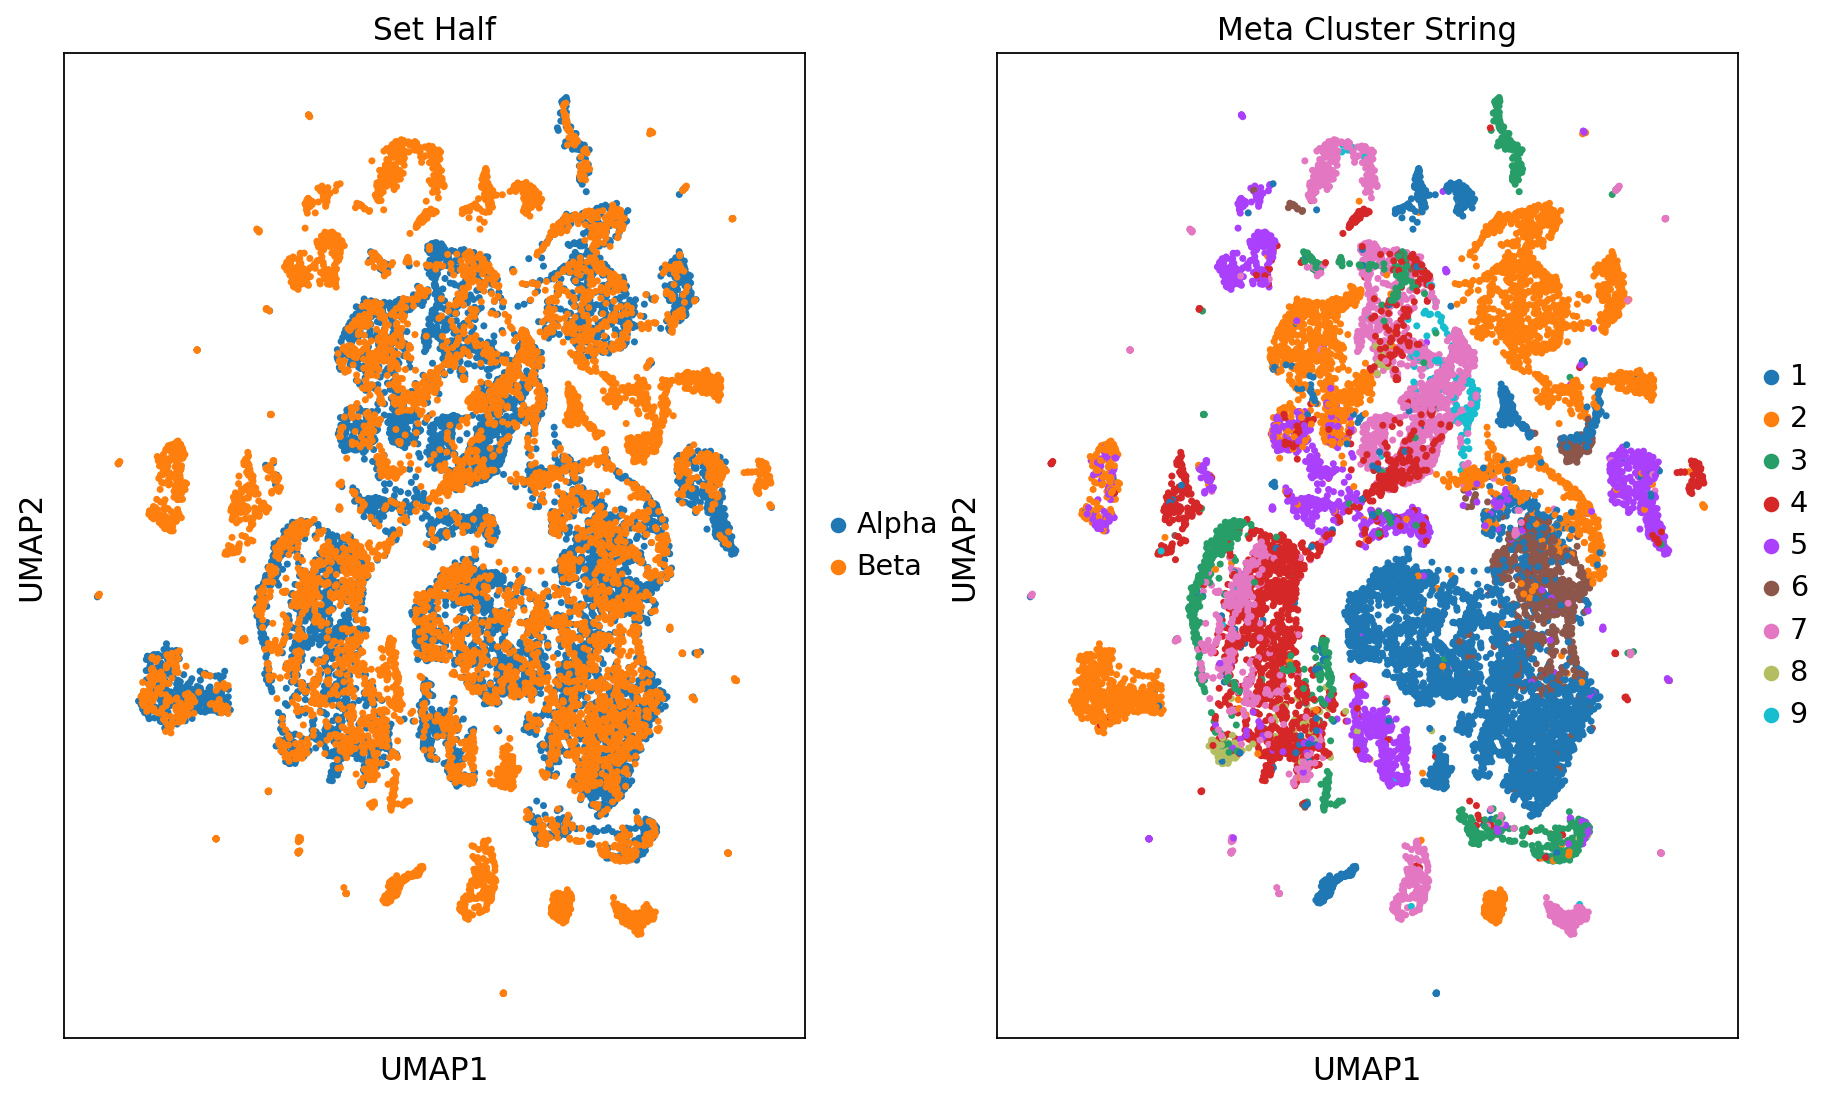

In [205]:
## Scanorama Just Integrate, kinda works but not all clusters well integrated
import scanorama
concatenated_alpha_beta_database = alpha_half_of_cells_without_genes.concatenate(beta_half_of_cells_without_genes)
#sc.tl.pca(concatenated_alpha_beta_database, svd_solver='arpack', )

sc.external.pp.scanorama_integrate(concatenated_alpha_beta_database,'Set Half')
sc.pp.neighbors(concatenated_alpha_beta_database, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
sc.tl.umap(concatenated_alpha_beta_database, random_state= 243)
sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s = 40,)


In [206]:
concatenated_alpha_beta_database.obs['Meta Cluster ID'] = concatenated_alpha_beta_database.obs['Meta Cluster String'].map(meta_cluster_ID)


In [207]:
concatenated_alpha_beta_database.obs

Cell Type  Study Number  Batch Cluster  \
AAACCTGAGAGTGACC-1-0               14             1             23   
AAACCTGAGCGATTCT-1-0               15             1             25   
AAACCTGAGGCTCATT-1-0               15             1             25   
AAACCTGCAAGTAGTA-1-0                3             1              4   
AAACCTGGTTATTCTC-1-0               14             1             23   
...                               ...           ...            ...   
WT3_WT3_TTTCCTCTCTGGTATG-1          8             3             43   
WT3_WT3_TTTGCGCAGTGTTTGC-1         10             3             45   
WT3_WT3_TTTGGTTAGAACTGTA-1          1             3             41   
WT3_WT3_TTTGGTTCACGCATCG-1          1             3             41   
WT3_WT3_TTTGTCACACCGAAAG-1          8             3             43   

                            Meta Cluster Meta Cluster String leiden Set Half  \
AAACCTGAGAGTGACC-1-0                   1                   1      2    Alpha   
AAACCTGAGCGATTCT-1-0                   2                   2      1    Alpha   
AAACCTGAGGCTCATT-1-0                   2                   2      1    Alpha   
AAACCTGCAAGTAGTA-1-0                   5                   5      3    Alpha   
AAACCTGGTTATTCTC-1-0                   1                   1      1    Alpha   
...                                  ...                 ...    ...      ...   
WT3_WT3_TTTCCTCTCTGGTATG-1             7                   7      6     Beta   
WT3_WT3_TTTGCGCAGTGTTTGC-1             2                   2      8     Beta   
WT3_WT3_TTTGGTTAGAACTGTA-1             4                   4      0     Beta   
WT3_WT3_TTTGGTTCACGCATCG-1             4                   4      0     Beta   
WT3_WT3_TTTGTCACACCGAAAG-1             7                   7      6     Beta   

                           batch          Meta Cluster ID  
AAACCTGAGAGTGACC-1-0           0  Atrichoblasts/Columella  
AAACCTGAGCGATTCT-1-0           0             Trichoblasts  
AAACCTGAGGCTCATT-1-0           0             Trichoblasts  
AAACCTGCAAGTAGTA-1-0           0                   Cortex  
AAACCTGGTTATTCTC-1-0           0  Atrichoblasts/Columella  
...                          ...                      ...  
WT3_WT3_TTTCCTCTCTGGTATG-1     1               Endodermis  
WT3_WT3_TTTGCGCAGTGTTTGC-1     1             Trichoblasts  
WT3_WT3_TTTGGTTAGAACTGTA-1     1                 Phloem 1  
WT3_WT3_TTTGGTTCACGCATCG-1     1                 Phloem 1  
WT3_WT3_TTTGTCACACCGAAAG-1     1               Endodermis  

[16635 rows x 9 columns]

In [208]:
sc.settings.figdir = '/data/passala/Plots_for_projects/Coexpressolog_paper_plots'

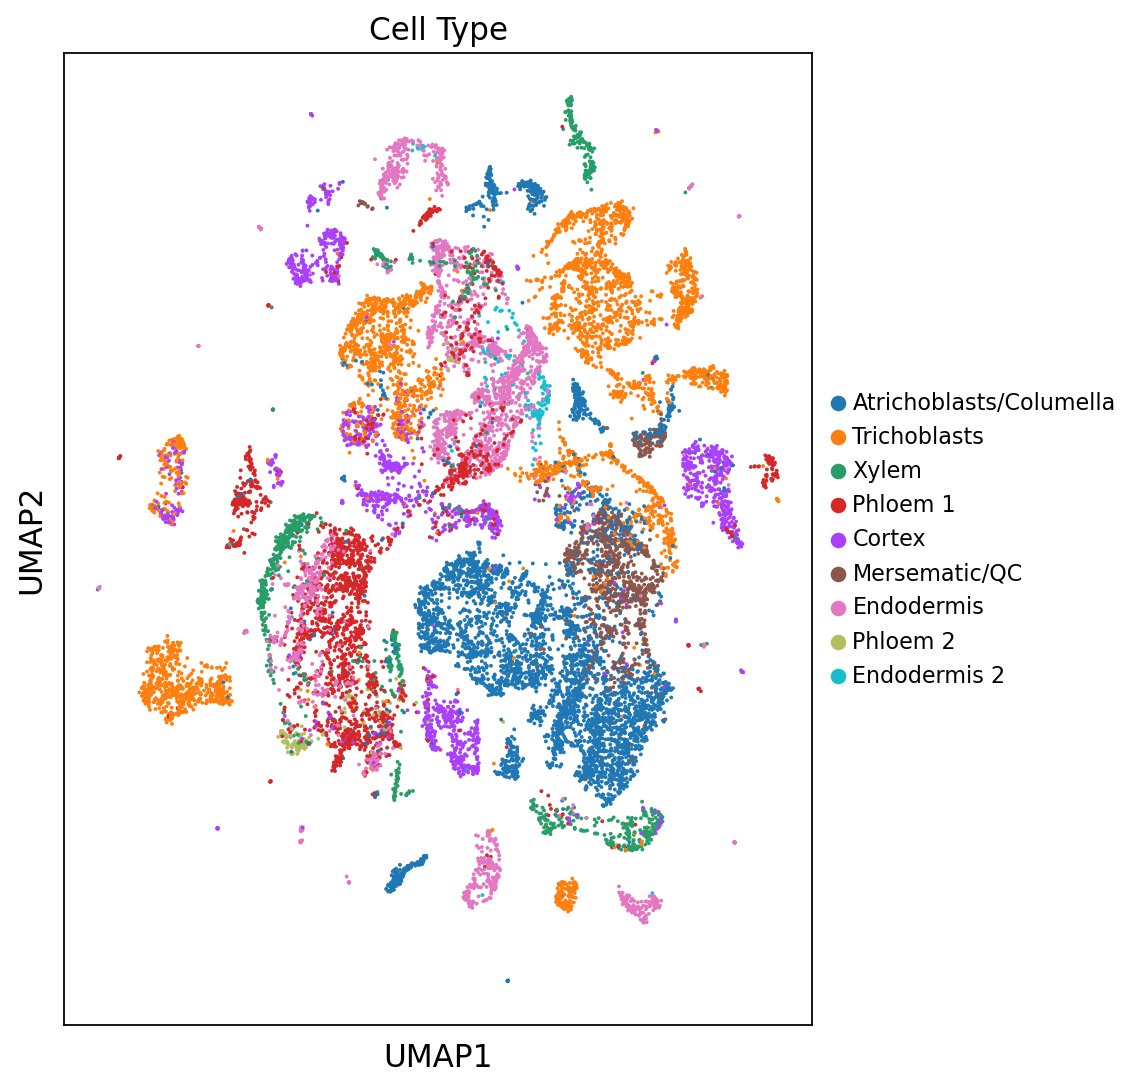

In [209]:
sc.set_figure_params(dpi_save = 500, figsize = (6,8))
sc.pl.umap(concatenated_alpha_beta_database, color= ['Meta Cluster ID'], s=12, legend_fontsize = 10, title = "Cell Type")
#sc.pl.umap(concatenated_alpha_beta_database, color= ['Meta Cluster ID'], s=12, legend_fontsize = 10, title = "Cell Type", save = 'correctly_integrated_arabi.svg')

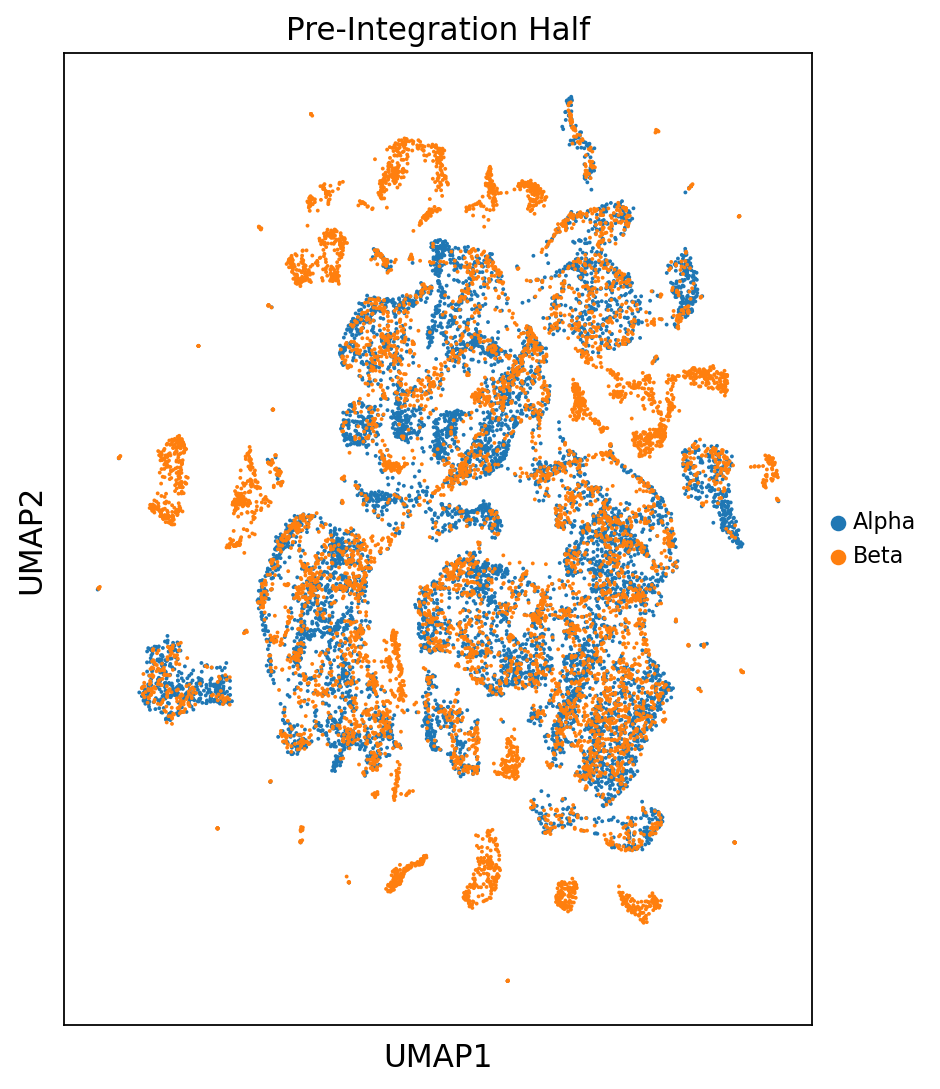

In [210]:
sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half'], s=12, legend_fontsize = 10, title = "Pre-Integration Half", )
#sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half'], s=12, legend_fontsize = 10, title = "Pre-Integration Half", save = 'correctly_integrated_arabi_Dataset.svg')

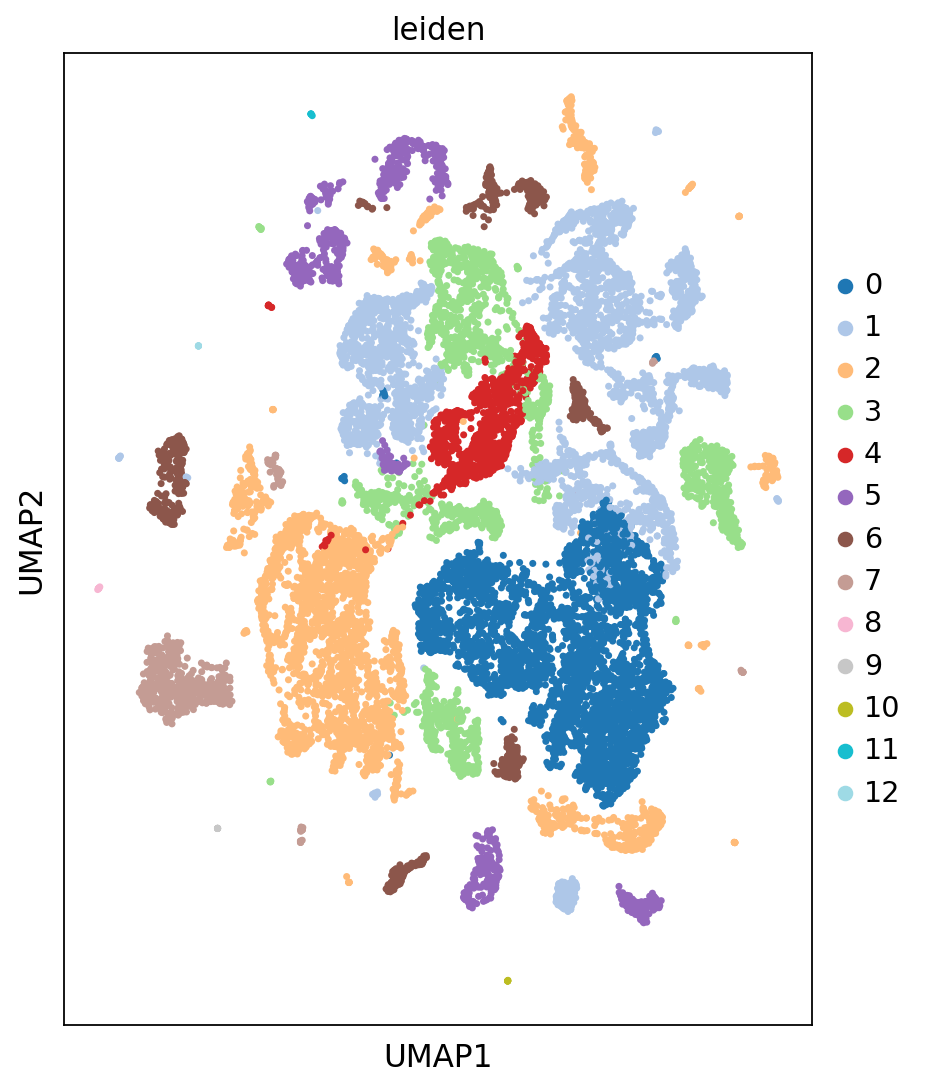

In [216]:
sc.tl.leiden(concatenated_alpha_beta_database, random_state= 456, resolution = .04)

sc.pl.umap(concatenated_alpha_beta_database, color= 'leiden', s = 40, palette = 'tab20')

In [217]:
concatenated_alpha_beta_database.obs['leiden'].value_counts()

0     4218
1     3516
2     3335
3     2068
4     1069
5      913
6      863
7      620
8        9
9        8
10       6
11       5
12       5
Name: leiden, dtype: int64

In [218]:
real_clusters = concatenated_alpha_beta_database.obs['leiden'].value_counts()[concatenated_alpha_beta_database.obs['leiden'].value_counts() > 15].index.to_list()

In [219]:
real_clusters

['0', '1', '2', '3', '4', '5', '6', '7']

In [220]:
trimmed_alpha_beta = concatenated_alpha_beta_database[concatenated_alpha_beta_database.obs['leiden'].isin(real_clusters),:]
trimmed_alpha_beta

View of AnnData object with n_obs × n_vars = 16602 × 891
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster', 'Meta Cluster String', 'leiden', 'Set Half', 'batch', 'Meta Cluster ID'
    var: 'Beta Gene', 'Alpha Gene', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'neighbors', 'umap', 'Set Half_colors', 'Meta Cluster String_colors', 'Meta Cluster ID_colors', 'leiden', 'leiden_colors'
    obsm: 'X_umap', 'X_pca', 'X_scanorama'
    obsp: 'distances', 'connectivities'

In [221]:
number_cells_in_cluster_with_majority_one_cell_type = 0
number_cells_in_cluster_with_multiple_Cell_types = 0
number_cells_in_mixed_dataset = 0
number_cells_in_single_dataset = 0
for leiden_cluster in real_clusters:
    current_cell_group = trimmed_alpha_beta.obs.loc[trimmed_alpha_beta.obs['leiden'] == leiden_cluster]
    if current_cell_group['Meta Cluster ID'].value_counts(normalize = True).max() > .6:
        number_cells_in_cluster_with_majority_one_cell_type+= len(current_cell_group)
    else:
        number_cells_in_cluster_with_multiple_Cell_types += len(current_cell_group)
    if current_cell_group['batch'].value_counts(normalize = True).max() < .7:
        number_cells_in_mixed_dataset += len(current_cell_group)
    else: 
        number_cells_in_single_dataset+= len(current_cell_group)

In [222]:
total_cells = len(trimmed_alpha_beta.obs)
percent_cells_in_majority_one_cell_type = number_cells_in_cluster_with_majority_one_cell_type/total_cells
print(percent_cells_in_majority_one_cell_type)

0.6195639079628961


In [223]:
percent_cells_in_mixed = number_cells_in_mixed_dataset/total_cells
print(percent_cells_in_mixed)

0.8930249367546079


In [169]:
current_cell_group

Cell Type  Study Number  Batch Cluster  \
AAAGTAGTCCACTCCA.1-0                6             2              9   
CCGTTCAGTACAGTTC.1-0                6             2              9   
CGTCCATGTCAATACC.1-0                6             2              9   
CTCGAAAGTGCAGGTA.1-0                6             2              9   
GGGCATCCAAGTCTAC.1-0                6             2              9   
...                               ...           ...            ...   
WT3_WT3_TGGTTCCTCGCTGATA-1          1             3             41   
WT3_WT3_TTCGGTCTCTGCTTGC-1          1             3             41   
WT3_WT3_TTCTCAATCGATAGAA-1          8             3             43   
WT3_WT3_TTGCGTCAGTTTGCGT-1          8             3             43   
WT3_WT3_TTTACTGCAACACCTA-1          8             3             43   

                            Meta Cluster Meta Cluster String leiden Set Half  \
AAAGTAGTCCACTCCA.1-0                   9                   9      5    Alpha   
CCGTTCAGTACAGTTC.1-0                   9                   9      5    Alpha   
CGTCCATGTCAATACC.1-0                   9                   9      5    Alpha   
CTCGAAAGTGCAGGTA.1-0                   9                   9      5    Alpha   
GGGCATCCAAGTCTAC.1-0                   9                   9      5    Alpha   
...                                  ...                 ...    ...      ...   
WT3_WT3_TGGTTCCTCGCTGATA-1             4                   4      5     Beta   
WT3_WT3_TTCGGTCTCTGCTTGC-1             4                   4      5     Beta   
WT3_WT3_TTCTCAATCGATAGAA-1             7                   7      5     Beta   
WT3_WT3_TTGCGTCAGTTTGCGT-1             7                   7      5     Beta   
WT3_WT3_TTTACTGCAACACCTA-1             7                   7      5     Beta   

                           batch Meta Cluster ID  
AAAGTAGTCCACTCCA.1-0           0    Endodermis 2  
CCGTTCAGTACAGTTC.1-0           0    Endodermis 2  
CGTCCATGTCAATACC.1-0           0    Endodermis 2  
CTCGAAAGTGCAGGTA.1-0           0    Endodermis 2  
GGGCATCCAAGTCTAC.1-0           0    Endodermis 2  
...                          ...             ...  
WT3_WT3_TGGTTCCTCGCTGATA-1     1        Phloem 1  
WT3_WT3_TTCGGTCTCTGCTTGC-1     1        Phloem 1  
WT3_WT3_TTCTCAATCGATAGAA-1     1      Endodermis  
WT3_WT3_TTGCGTCAGTTTGCGT-1     1      Endodermis  
WT3_WT3_TTTACTGCAACACCTA-1     1      Endodermis  

[1082 rows x 9 columns]

In [171]:
current_cell_group['Meta Cluster ID'].value_counts(normalize = True).max()

0.8197781885397413

In [146]:
# Scanorama Integrate and Correct,Doesn't Work at all
# import scanorama
# corrected = scanorama.correct_scanpy([alpha_half_of_cells_without_genes,beta_half_of_cells_without_genes], return_dimred=True)
# corrected_scanorama = corrected[0].concatenate(corrected[1])
# sc.pp.neighbors(corrected_scanorama, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
# sc.tl.umap(corrected_scanorama, random_state= 243)
# sc.pl.umap(corrected_scanorama, color= ['Set Half', 'Meta Cluster String'], s = 40,)

#sc.pl.umap(corrected_scanorama, color= 'Meta Cluster String', s = 30,)

In [ ]:
### MNN Method- Doens't Work
# import mnnpy
# order_of_vars = alpha_half_of_cells_without_genes.var.index.to_list()
# current_order_beta_vars = beta_half_of_cells_without_genes.var_names
# panda_version_of_beta_x_data = pd.DataFrame(columns = current_order_beta_vars, data = beta_half_of_cells_without_genes.X)

# re_ordered_version = panda_version_of_beta_x_data.reindex(columns = order_of_vars)
# beta_half_of_cells_without_genes.X = re_ordered_version
# beta_half_of_cells_without_genes.var = beta_half_of_cells_without_genes.var.reindex(order_of_vars)

# hvgs = list(set(beta_half_of_cells_without_genes.var.loc[beta_half_of_cells_without_genes.var['highly_variable']==True].index.to_list()+alpha_half_of_cells_without_genes.var.loc[alpha_half_of_cells_without_genes.var['highly_variable']==True].index.to_list()))


# mnn_corrected_database = mnnpy.mnn_correct(alpha_half_of_cells_without_genes,beta_half_of_cells_without_genes,do_concatenate= True, batch_categories= ['Alpha','Beta'], var_subset= hvgs)
# # mnn_corrected_database
# mnn_anndata_corrected = mnn_corrected_database[0]
# mnn_anndata_corrected = mnn_anndata_corrected[:,hvgs]

# sc.tl.pca(mnn_anndata_corrected, svd_solver='arpack', random_state= 219, use_highly_variable= False)
# sc.pp.neighbors(mnn_anndata_corrected, n_neighbors=10, n_pcs=50, random_state= 45)
# sc.tl.umap(mnn_anndata_corrected, random_state= 912)
# sc.pl.umap(mnn_anndata_corrected, color= ['Set Half', 'Meta Cluster String'], s = 40,)


In [ ]:
## Scanpy Ingest 
order_of_vars = alpha_half_of_cells_without_genes.var.index.to_list()
current_order_beta_vars = beta_half_of_cells_without_genes.var_names
panda_version_of_beta_x_data = pd.DataFrame(columns = current_order_beta_vars, data = beta_half_of_cells_without_genes.X)

re_ordered_version = panda_version_of_beta_x_data.reindex(columns = order_of_vars)
beta_half_of_cells_without_genes.X = re_ordered_version
beta_half_of_cells_without_genes.var = beta_half_of_cells_without_genes.var.reindex(order_of_vars)

sc.tl.ingest(adata = beta_half_of_cells_without_genes, adata_ref = alpha_half_of_cells_without_genes, obs = 'leiden')
beta_half_of_cells_without_genes.uns['leiden_colors'] = alpha_half_of_cells_without_genes.uns['leiden_colors']  # fix colors

In [ ]:
sc.pl.umap(beta_half_of_cells_without_genes, color='leiden', wspace=0.5, s = 40, palette= 'tab10')

In [ ]:
sc.pl.umap(alpha_half_of_cells_without_genes, color = 'leiden', palette = 'tab10')

In [ ]:
concatenated_alpha_beta_database = alpha_half_of_cells_without_genes.concatenate(beta_half_of_cells_without_genes)


In [ ]:
sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s= 20,)


In [ ]:

sc.tl.ingest(adata = alpha_half_of_cells_without_genes, adata_ref = beta_half_of_cells_without_genes, obs = 'leiden')
alpha_half_of_cells_without_genes.uns['leiden_colors'] = beta_half_of_cells_without_genes.uns['leiden_colors']  # fix colors

In [ ]:
sc.pl.umap(alpha_half_of_cells_without_genes, color='leiden', wspace=0.5, s = 40, palette= 'tab10')